# Authored by Amirul Uzair

# Load Dependencies

In [258]:
#load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from pandas import read_csv
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

print("All dependencies imported successfully")

All dependencies imported successfully


# Read Dataset

In [259]:
df = pd.read_csv(r"C:\Users\amiru\Desktop\Data Scientist Final Project\Dataset Acquisitions\loan application\credit_features_subset_merged.csv")
df

UID  ALL_AgeOfOldestAccount  ALL_AgeOfYoungestAccount  ALL_Count  \
0      216009                     227                        12         14   
1      217537                      49                        10          7   
2      221803                     134                         0         12   
3      222260                     227                         2         39   
4      222848                     132                         2         99   
...       ...                     ...                       ...        ...   
8842  9679857                     399                        13         23   
8843  9680193                     217                        23          5   
8844  9681405                       3                         1          2   
8845  9684198                     178                        15         23   
8846  9684478                      81                         3         12   

      ALL_CountActive  ALL_CountClosedLast12Months  ALL_CountDefaultAccounts  \
0                  11                            0                         3   
1                   6                            1                         3   
2                  11                            0                         3   
3                  12                            0                         2   
4                  11                            8                         0   
...               ...                          ...                       ...   
8842               16                            0                         0   
8843                4                            0                         0   
8844                2                            0                         0   
8845               17                            0                         1   
8846               11                            1                         0   

      ALL_CountOpenedLast12Months  ALL_CountSettled  ALL_MeanAccountAge  \
0                               0                 3               71.36   
1                               1                 1               29.33   
2                               5                 1               32.33   
3                               2                27               41.56   
4                               9                88               43.34   
...                           ...               ...                 ...   
8842                            0                 7              118.09   
8843                            0                 1               85.40   
8844                            2                 0                2.00   
8845                            0                 6               66.91   
8846                            5                 1               20.50   

      ALL_SumCurrentOutstandingBal  ALL_SumCurrentOutstandingBalExcMtg  \
0                             9292                                9292   
1                             4592                                4592   
2                             2737                                2737   
3                             9229                                9229   
4                            15443                               15443   
...                            ...                                 ...   
8842                        187302                               23018   
8843                           264                                 264   
8844                             0                                   0   
8845                         10071                               10071   
8846                         18862                               18862   

      ALL_TimeSinceMostRecentDefault  ALL_WorstPaymentStatusActiveAccounts  \
0                                 -1                                     7   
1                                 -1                                     7   
2                                 -1                                     7   
3         

# Glimspse of Dataset

In [260]:
df.head()

UID  ALL_AgeOfOldestAccount  ALL_AgeOfYoungestAccount  ALL_Count  \
0  216009                     227                        12         14   
1  217537                      49                        10          7   
2  221803                     134                         0         12   
3  222260                     227                         2         39   
4  222848                     132                         2         99   

   ALL_CountActive  ALL_CountClosedLast12Months  ALL_CountDefaultAccounts  \
0               11                            0                         3   
1                6                            1                         3   
2               11                            0                         3   
3               12                            0                         2   
4               11                            8                         0   

   ALL_CountOpenedLast12Months  ALL_CountSettled  ALL_MeanAccountAge  \
0                            0                 3               71.36   
1                            1                 1               29.33   
2                            5                 1               32.33   
3                            2                27               41.56   
4                            9                88               43.34   

   ALL_SumCurrentOutstandingBal  ALL_SumCurrentOutstandingBalExcMtg  \
0                          9292                                9292   
1                          4592                                4592   
2                          2737                                2737   
3                          9229                                9229   
4                         15443                               15443   

   ALL_TimeSinceMostRecentDefault  ALL_WorstPaymentStatusActiveAccounts  \
0                              -1                                     7   
1                              -1                                     7   
2                              -1                                     7   
3                              -1                                     7   
4                              -1                                     0   

   Amount  Term        EmploymentType  Success  
0    7000    36  Employed - full time        0  
1    1000    60  Employed - full time        0  
2    2000    24  Employed - part time        0  
3    4000    48  Employed - full time        0  
4    7000    60  Employed - full time        0

In [261]:
df.tail()

UID  ALL_AgeOfOldestAccount  ALL_AgeOfYoungestAccount  ALL_Count  \
8842  9679857                     399                        13         23   
8843  9680193                     217                        23          5   
8844  9681405                       3                         1          2   
8845  9684198                     178                        15         23   
8846  9684478                      81                         3         12   

      ALL_CountActive  ALL_CountClosedLast12Months  ALL_CountDefaultAccounts  \
8842               16                            0                         0   
8843                4                            0                         0   
8844                2                            0                         0   
8845               17                            0                         1   
8846               11                            1                         0   

      ALL_CountOpenedLast12Months  ALL_CountSettled  ALL_MeanAccountAge  \
8842                            0                 7              118.09   
8843                            0                 1               85.40   
8844                            2                 0                2.00   
8845                            0                 6               66.91   
8846                            5                 1               20.50   

      ALL_SumCurrentOutstandingBal  ALL_SumCurrentOutstandingBalExcMtg  \
8842                        187302                               23018   
8843                           264                                 264   
8844                             0                                   0   
8845                         10071                               10071   
8846                         18862                               18862   

      ALL_TimeSinceMostRecentDefault  ALL_WorstPaymentStatusActiveAccounts  \
8842                              -1                                     0   
8843                              -1                                     0   
8844                              -1                                     0   
8845                              -1                                     7   
8846                              -1                                     0   

      Amount  Term        EmploymentType  Success  
8842   10000    60  Employed - full time        0  
8843    3000    48  Employed - full time        0  
8844   20000    36  Employed - full time        0  
8845    2500    24  Employed - full time        0  
8846    2000    12  Employed - full time        0

In [262]:
df = df.drop(["ALL_TimeSinceMostRecentDefault", "UID"], axis = 1)
df

ALL_AgeOfOldestAccount  ALL_AgeOfYoungestAccount  ALL_Count  \
0                        227                        12         14   
1                         49                        10          7   
2                        134                         0         12   
3                        227                         2         39   
4                        132                         2         99   
...                      ...                       ...        ...   
8842                     399                        13         23   
8843                     217                        23          5   
8844                       3                         1          2   
8845                     178                        15         23   
8846                      81                         3         12   

      ALL_CountActive  ALL_CountClosedLast12Months  ALL_CountDefaultAccounts  \
0                  11                            0                         3   
1                   6                            1                         3   
2                  11                            0                         3   
3                  12                            0                         2   
4                  11                            8                         0   
...               ...                          ...                       ...   
8842               16                            0                         0   
8843                4                            0                         0   
8844                2                            0                         0   
8845               17                            0                         1   
8846               11                            1                         0   

      ALL_CountOpenedLast12Months  ALL_CountSettled  ALL_MeanAccountAge  \
0                               0                 3               71.36   
1                               1                 1               29.33   
2                               5                 1               32.33   
3                               2                27               41.56   
4                               9                88               43.34   
...                           ...               ...                 ...   
8842                            0                 7              118.09   
8843                            0                 1               85.40   
8844                            2                 0                2.00   
8845                            0                 6               66.91   
8846                            5                 1               20.50   

      ALL_SumCurrentOutstandingBal  ALL_SumCurrentOutstandingBalExcMtg  \
0                             9292                                9292   
1                             4592                                4592   
2                             2737                                2737   
3                             9229                                9229   
4                            15443                               15443   
...                            ...                                 ...   
8842                        187302                               23018   
8843                           264                                 264   
8844                             0                                   0   
8845                         10071                               10071   
8846                         18862                               18862   

      ALL_WorstPaymentStatusActiveAccounts  Amount  Term  \
0                                        7    7000    36   
1                                        7    1000    60   
2                                        7    2000    24   
3                                        7    4000    48   
4                                        0    7000    60   
...                                    ...     ...   ...   
8842  

# Checking Missing Values

In [263]:
df.isnull()

ALL_AgeOfOldestAccount  ALL_AgeOfYoungestAccount  ALL_Count  \
0                      False                     False      False   
1                      False                     False      False   
2                      False                     False      False   
3                      False                     False      False   
4                      False                     False      False   
...                      ...                       ...        ...   
8842                   False                     False      False   
8843                   False                     False      False   
8844                   False                     False      False   
8845                   False                     False      False   
8846                   False                     False      False   

      ALL_CountActive  ALL_CountClosedLast12Months  ALL_CountDefaultAccounts  \
0               False                        False                     False   
1               False                        False                     False   
2               False                        False                     False   
3               False                        False                     False   
4               False                        False                     False   
...               ...                          ...                       ...   
8842            False                        False                     False   
8843            False                        False                     False   
8844            False                        False                     False   
8845            False                        False                     False   
8846            False                        False                     False   

      ALL_CountOpenedLast12Months  ALL_CountSettled  ALL_MeanAccountAge  \
0                           False             False               False   
1                           False             False               False   
2                           False             False               False   
3                           False             False               False   
4                           False             False               False   
...                           ...               ...                 ...   
8842                        False             False               False   
8843                        False             False               False   
8844                        False             False               False   
8845                        False             False               False   
8846                        False             False               False   

      ALL_SumCurrentOutstandingBal  ALL_SumCurrentOutstandingBalExcMtg  \
0                            False                               False   
1                            False                               False   
2                            False                               False   
3                            False                               False   
4                            False                               False   
...                            ...                                 ...   
8842                         False                               False   
8843                         False                               False   
8844                         False                               False   
8845                         False                               False   
8846                         False                               False   

      ALL_WorstPaymentStatusActiveAccounts  Amount   Term  EmploymentType  \
0                                    False   False  False           False   
1                                    False   False  False           False   
2                                    False   False  False           False   
3                                    False   False  False           False   
4                                    Fals

In [264]:
# Extract rows and columns where data is missing
missing_values = df[df.isnull().any(axis=1)][df.columns[df.isnull().any(axis=0)]]
print("\nRows and columns with missing values:")
print(missing_values)


Rows and columns with missing values:
Empty DataFrame
Columns: []
Index: []


# Checking Duplicated Values

In [265]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df[df.duplicated()]

print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
print()
if duplicate_rows.shape[0] > 0:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Number of duplicate rows: 47

Duplicate Rows:
      ALL_AgeOfOldestAccount  ALL_AgeOfYoungestAccount  ALL_Count  \
576                       -1                        -1          0   
1751                      -1                        -1          0   
2333                      -1                        -1          0   
2444                      -1                        -1          0   
2584                      -1                        -1          0   
2905                      -1                        -1          0   
2960                      -1                        -1          0   
3092                      -1                        -1          0   
3584                      -1                        -1          0   
3678                      -1                        -1          0   
3694                      -1                        -1          0   
3905                      -1                        -1          0   
4096                      -1                        -1   

In [266]:
# Drop duplicated rows where any value is -1
df = df[df != -1].dropna()

# Display the cleaned dataframe
df

ALL_AgeOfOldestAccount  ALL_AgeOfYoungestAccount  ALL_Count  \
0                      227.0                      12.0         14   
1                       49.0                      10.0          7   
2                      134.0                       0.0         12   
3                      227.0                       2.0         39   
4                      132.0                       2.0         99   
...                      ...                       ...        ...   
8842                   399.0                      13.0         23   
8843                   217.0                      23.0          5   
8844                     3.0                       1.0          2   
8845                   178.0                      15.0         23   
8846                    81.0                       3.0         12   

      ALL_CountActive  ALL_CountClosedLast12Months  ALL_CountDefaultAccounts  \
0                11.0                          0.0                       3.0   
1                 6.0                          1.0                       3.0   
2                11.0                          0.0                       3.0   
3                12.0                          0.0                       2.0   
4                11.0                          8.0                       0.0   
...               ...                          ...                       ...   
8842             16.0                          0.0                       0.0   
8843              4.0                          0.0                       0.0   
8844              2.0                          0.0                       0.0   
8845             17.0                          0.0                       1.0   
8846             11.0                          1.0                       0.0   

      ALL_CountOpenedLast12Months  ALL_CountSettled  ALL_MeanAccountAge  \
0                             0.0               3.0               71.36   
1                             1.0               1.0               29.33   
2                             5.0               1.0               32.33   
3                             2.0              27.0               41.56   
4                             9.0              88.0               43.34   
...                           ...               ...                 ...   
8842                          0.0               7.0              118.09   
8843                          0.0               1.0               85.40   
8844                          2.0               0.0                2.00   
8845                          0.0               6.0               66.91   
8846                          5.0               1.0               20.50   

      ALL_SumCurrentOutstandingBal  ALL_SumCurrentOutstandingBalExcMtg  \
0                           9292.0                              9292.0   
1                           4592.0                              4592.0   
2                           2737.0                              2737.0   
3                           9229.0                              9229.0   
4                          15443.0                             15443.0   
...                            ...                                 ...   
8842                      187302.0                             23018.0   
8843                         264.0                               264.0   
8844                           0.0                                 0.0   
8845                       10071.0                             10071.0   
8846                       18862.0                             18862.0   

      ALL_WorstPaymentStatusActiveAccounts  Amount  Term  \
0                                      7.0    7000    36   
1                                      7.0    1000    60   
2                                      7.0    2000    24   
3                                      7.0    4000    48   
4                                      0.0    7000    60   
...                                    ...     ...   ...   
8842  

# Distribution of Features 

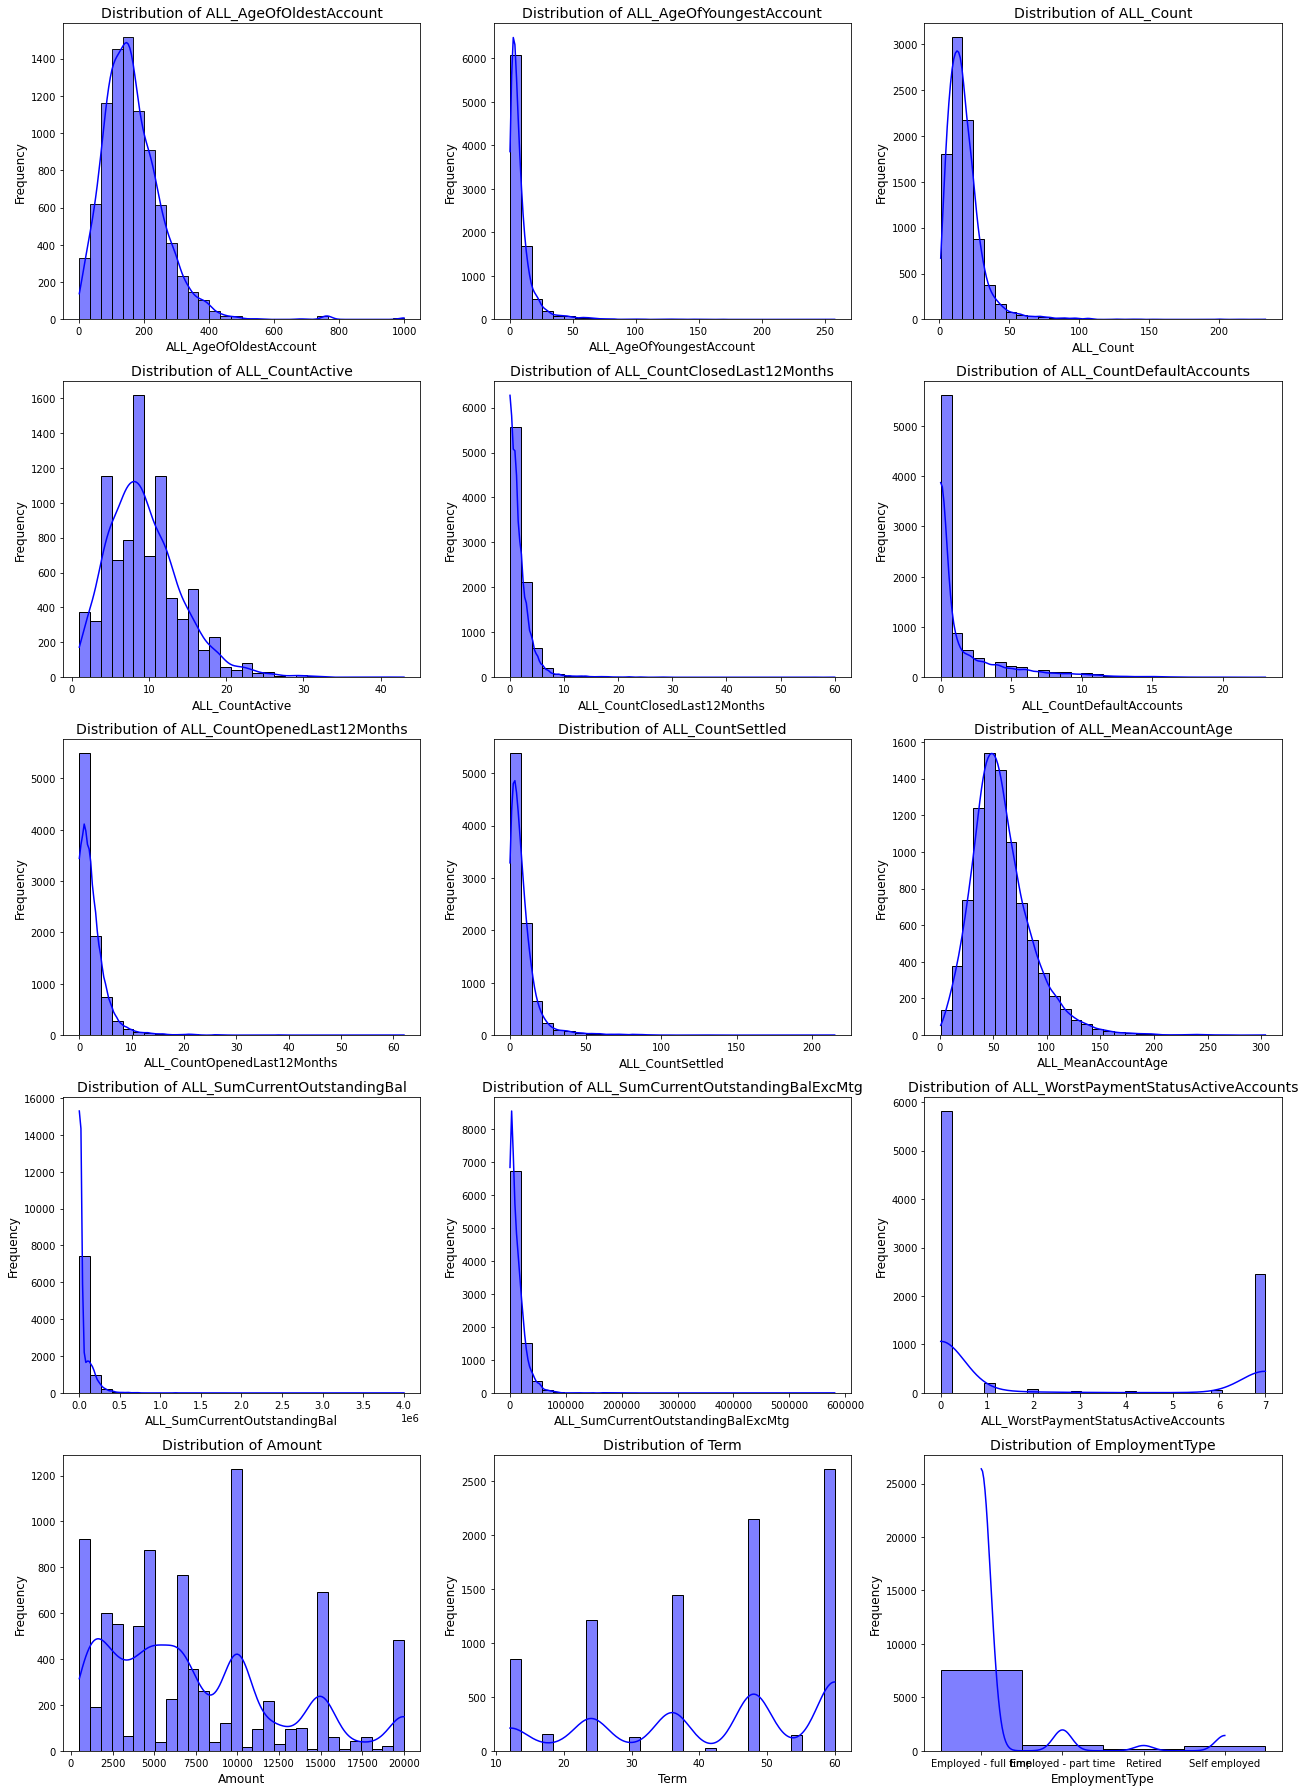

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns

df_features = df.drop(columns=[df.columns[15]])  

# Visualize the distribution of all features except the target
def plot_distributions(df, cols_per_row=3):
    num_cols = len(df.columns)
    num_rows = (num_cols // cols_per_row) + int(num_cols % cols_per_row > 0)
    
    plt.figure(figsize=(cols_per_row * 6, num_rows * 5)) 
    for i, column in enumerate(df.columns, 1):
        plt.subplot(num_rows, cols_per_row, i)
        sns.histplot(df[column], kde=True, bins=30, color='blue', edgecolor='black')
        plt.title(f"Distribution of {column}", fontsize=14)  # Increased title font size
        plt.xlabel(column, fontsize=12)  # Increased x-label font size
        plt.ylabel("Frequency", fontsize=12)  # Increased y-label font size
        plt.tight_layout()
    plt.show()

# Call the function to plot distributions
plot_distributions(df_features, cols_per_row=3)


## Normality Test

In [271]:
from scipy.stats import kstest
import pandas as pd

alpha = 0.05  # significance level

# Loop through each column from index 0 to 15
for column in df.columns[0:16]:  # Loop through columns 0 to 15
    stat, p = kstest(df[column], cdf="norm")
    
    print(f"Column: {column}")
    print(f"Statistics=%.3f, p=%.3f" % (stat, p))
    
    # Check if p-value is greater than alpha to determine if data is Gaussian
    if p > alpha:
        print("Sample does not look Gaussian (fail to reject H0)")
        print("Data is normal\n")
    else:
        print("Sample looks Gaussian (reject H0)")
        print("Data is not normal\n")

Column: ALL_AgeOfOldestAccount
Statistics=0.999, p=0.000
Sample looks Gaussian (reject H0)
Data is not normal

Column: ALL_AgeOfYoungestAccount
Statistics=0.826, p=0.000
Sample looks Gaussian (reject H0)
Data is not normal

Column: ALL_Count
Statistics=0.976, p=0.000
Sample looks Gaussian (reject H0)
Data is not normal

Column: ALL_CountActive
Statistics=0.964, p=0.000
Sample looks Gaussian (reject H0)
Data is not normal

Column: ALL_CountClosedLast12Months
Statistics=0.500, p=0.000
Sample looks Gaussian (reject H0)
Data is not normal

Column: ALL_CountDefaultAccounts
Statistics=0.500, p=0.000
Sample looks Gaussian (reject H0)
Data is not normal

Column: ALL_CountOpenedLast12Months
Statistics=0.638, p=0.000
Sample looks Gaussian (reject H0)
Data is not normal

Column: ALL_CountSettled
Statistics=0.803, p=0.000
Sample looks Gaussian (reject H0)
Data is not normal

Column: ALL_MeanAccountAge
Statistics=0.998, p=0.000
Sample looks Gaussian (reject H0)
Data is not normal

Column: ALL_SumCu

TypeError: unsupported operand type(s) for -: 'str' and 'int'

# Checking for Outliers

TypeError: Vertical orientation requires numeric `y` variable.

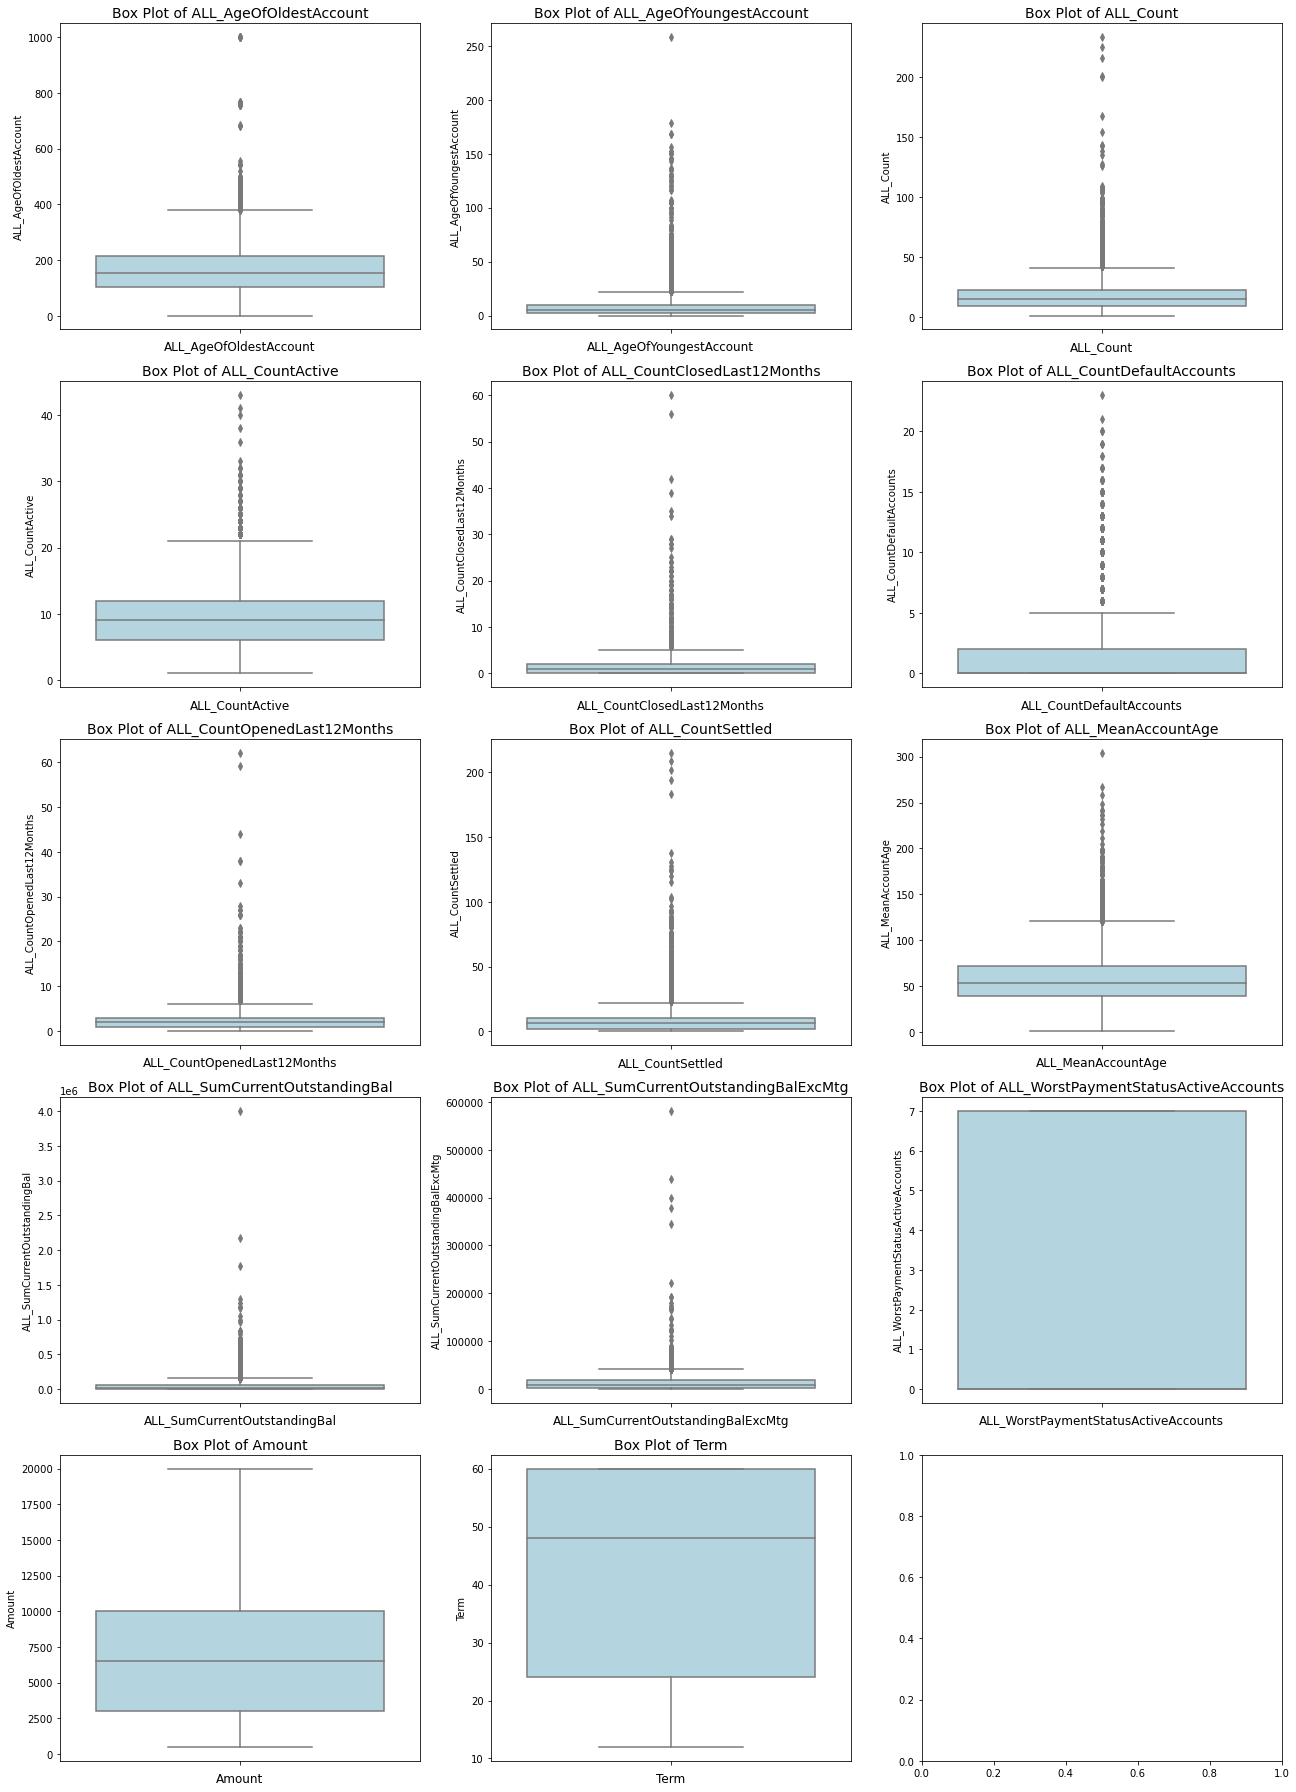

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot box plots for all features
def plot_boxplots(df, cols_per_row=3):
    num_cols = len(df.columns)
    num_rows = (num_cols // cols_per_row) + int(num_cols % cols_per_row > 0)
    
    plt.figure(figsize=(cols_per_row * 6, num_rows * 5))
    for i, column in enumerate(df.columns, 1):
        plt.subplot(num_rows, cols_per_row, i)
        sns.boxplot(y=df[column], color='lightblue')
        plt.title(f"Box Plot of {column}", fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.tight_layout()
    plt.show()

# Call the function
plot_boxplots(df_features, cols_per_row=3)


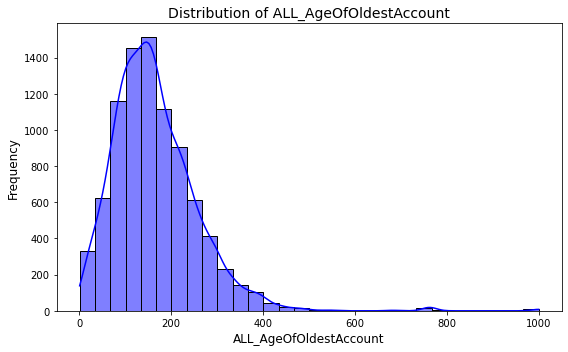

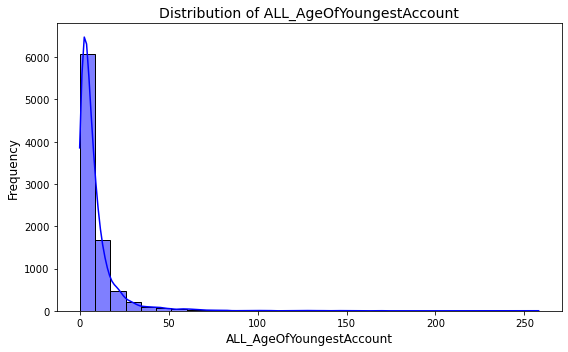

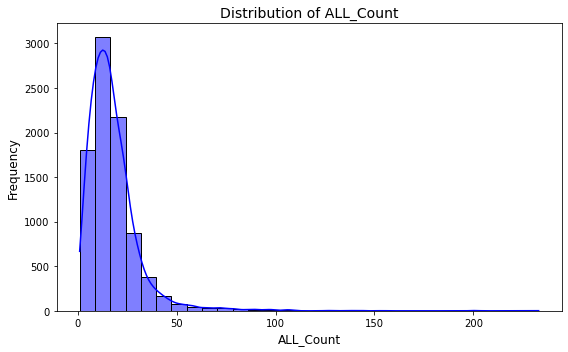

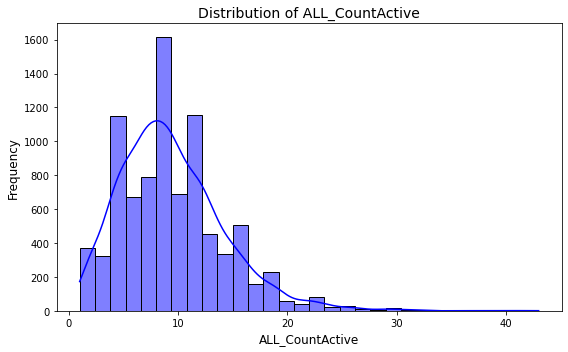

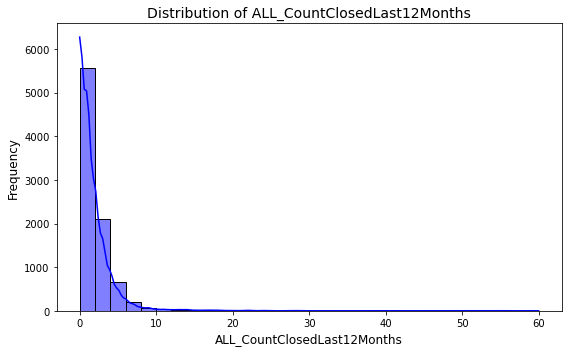

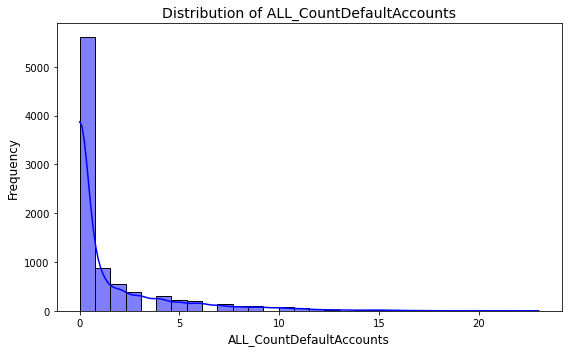

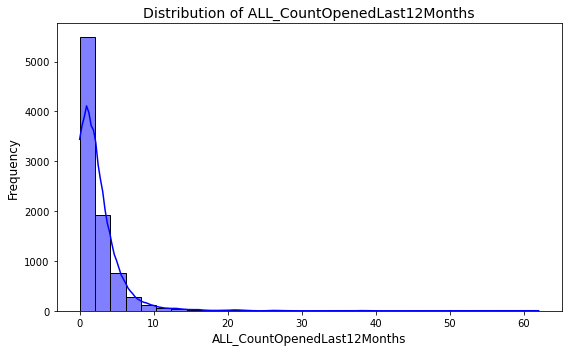

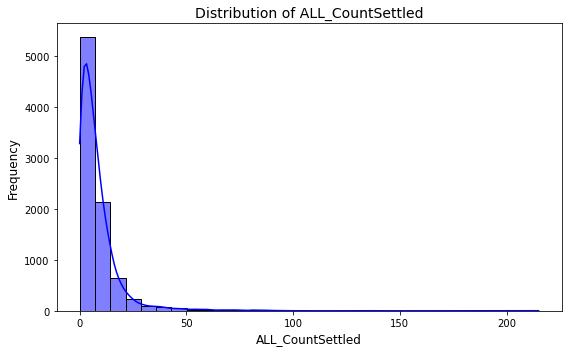

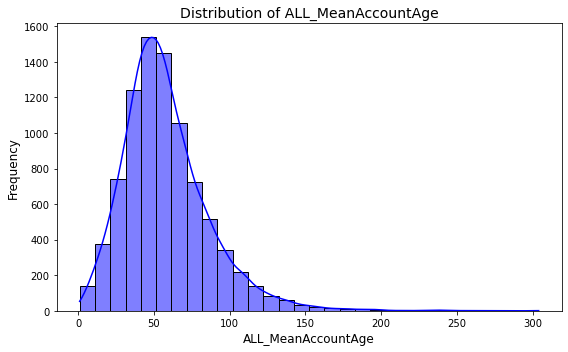

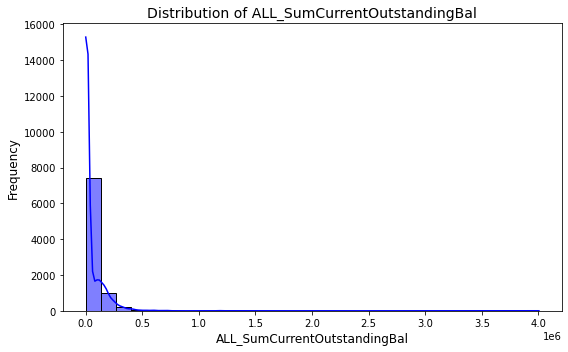

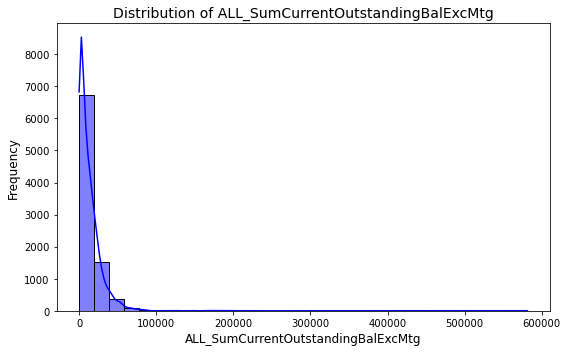

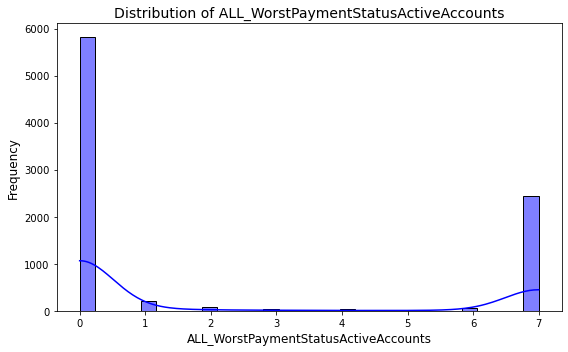

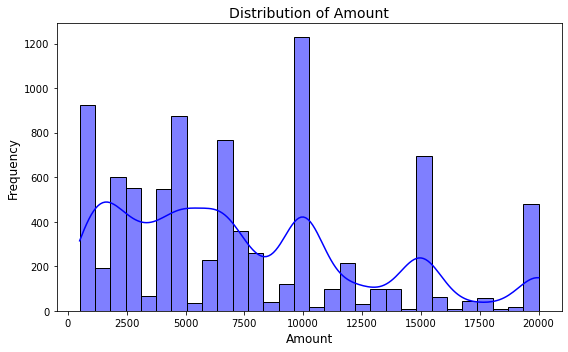

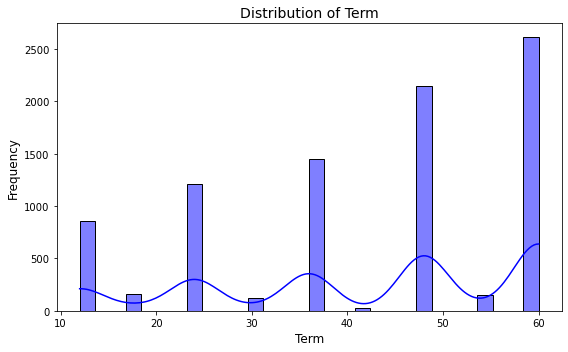

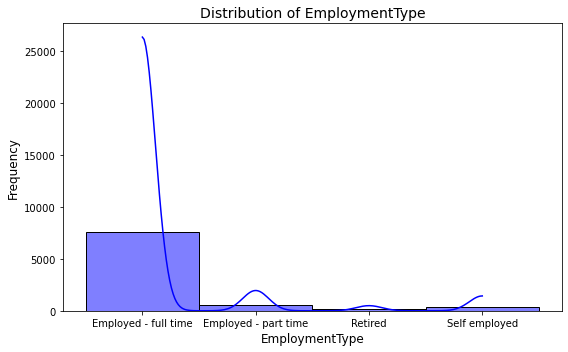

In [88]:
#Distribution Plot
for column in df_features.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_features[column], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {column}", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()

# Correlation 

## Correlation Matrix

In [251]:
correlation_matrix = df.corr("pearson")
correlation_matrix

ALL_AgeOfOldestAccount  \
ALL_AgeOfOldestAccount                              1.000000   
ALL_AgeOfYoungestAccount                            0.061565   
ALL_Count                                           0.164521   
ALL_CountActive                                     0.229371   
ALL_CountClosedLast12Months                         0.017012   
ALL_CountDefaultAccounts                           -0.056536   
ALL_CountOpenedLast12Months                        -0.077841   
ALL_CountSettled                                    0.103163   
ALL_MeanAccountAge                                  0.743556   
ALL_SumCurrentOutstandingBal                        0.235503   
ALL_SumCurrentOutstandingBalExcMtg                  0.224328   
ALL_WorstPaymentStatusActiveAccounts               -0.076106   
Amount                                              0.185981   
Term                                                0.163290   
Success                                             0.068529   

                                      ALL_AgeOfYoungestAccount  ALL_Count  \
ALL_AgeOfOldestAccount                                0.061565   0.164521   
ALL_AgeOfYoungestAccount                              1.000000  -0.224871   
ALL_Count                                            -0.224871   1.000000   
ALL_CountActive                                      -0.298044   0.630438   
ALL_CountClosedLast12Months                          -0.182028   0.637103   
ALL_CountDefaultAccounts                             -0.021357   0.277068   
ALL_CountOpenedLast12Months                          -0.346433   0.543078   
ALL_CountSettled                                     -0.147465   0.946000   
ALL_MeanAccountAge                                    0.426460  -0.055320   
ALL_SumCurrentOutstandingBal                         -0.056675   0.110840   
ALL_SumCurrentOutstandingBalExcMtg                   -0.116927   0.229255   
ALL_WorstPaymentStatusActiveAccounts                  0.008889   0.131032   
Amount                                                0.011402  -0.039694   
Term                                                 -0.001773  -0.030254   
Success                                               0.000056  -0.051265   

                                      ALL_CountActive  \
ALL_AgeOfOldestAccount                       0.229371   
ALL_AgeOfYoungestAccount                    -0.298044   
ALL_Count                                    0.630438   
ALL_CountActive                              1.000000   
ALL_CountClosedLast12Months                  0.255351   
ALL_CountDefaultAccounts                     0.314194   
ALL_CountOpenedLast12Months                  0.416299   
ALL_CountSettled                             0.344764   
ALL_MeanAccountAge                          -0.002782   
ALL_SumCurrentOutstandingBal                 0.197661   
ALL_SumCurrentOutstandingBalExcMtg           0.376209   
ALL_WorstPaymentStatusActiveAccounts         0.164103   
Amount                                       0.012025   
Term                                         0.044490   
Success                                     -0.076612   

                                      ALL_CountClosedLast12Months  \
ALL_AgeOfOldestAccount                                   0.017012   
ALL_AgeOfYoungestAccount                                -0.182028   
ALL_Count                                                0.637103   
ALL_CountActive                                          0.255351   
ALL_CountClosedLast12Months                              1.000000   
ALL_CountDefaultAccounts                                 0.075904   
ALL_CountOpenedLast12Months                              0.709356   
ALL_CountSettled                                         0.663797   
ALL_MeanAccountAge                                      -0.170086   
ALL_SumCurrentOutstandingBal                             0.016634   
ALL_SumCurrentOutstandingBalExcMtg                       0.067485   
ALL_WorstPaymentStatusActiveAccounts   

## Correlation by Ranking

In [252]:
# Extract the correlation of all features with 'Success' column
correlation_with_success = correlation_matrix['Success']

# Print the correlation values
print(correlation_with_success)

ALL_AgeOfOldestAccount                  0.068529
ALL_AgeOfYoungestAccount                0.000056
ALL_Count                              -0.051265
ALL_CountActive                        -0.076612
ALL_CountClosedLast12Months            -0.041918
ALL_CountDefaultAccounts               -0.144045
ALL_CountOpenedLast12Months            -0.080219
ALL_CountSettled                       -0.030000
ALL_MeanAccountAge                      0.098224
ALL_SumCurrentOutstandingBal            0.041008
ALL_SumCurrentOutstandingBalExcMtg     -0.062381
ALL_WorstPaymentStatusActiveAccounts   -0.184965
Amount                                 -0.110044
Term                                   -0.011396
Success                                 1.000000
Name: Success, dtype: float64


## Correlation Heatmap

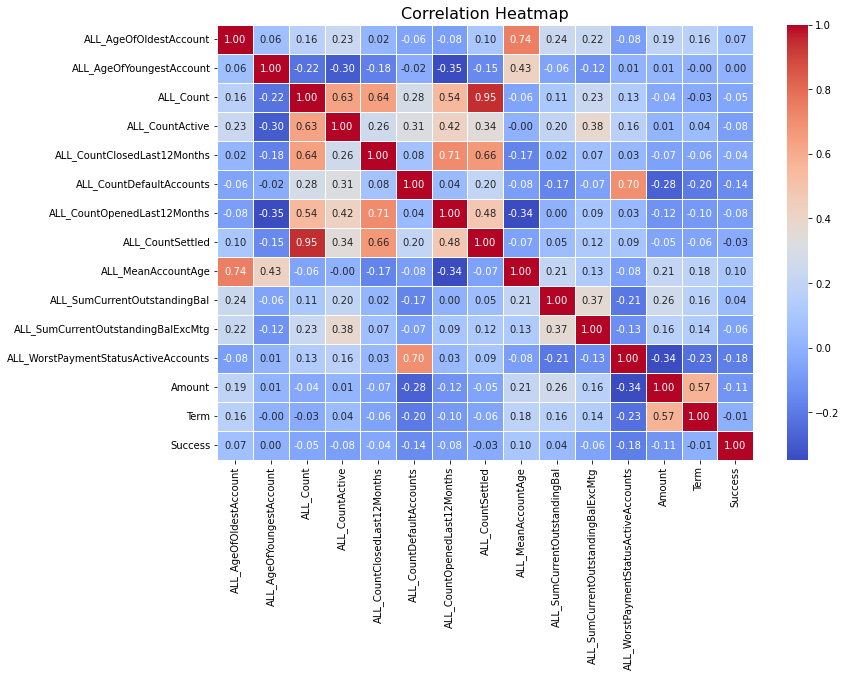

In [253]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Customize the plot
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## Correlation of All Features by Success (Target Label)

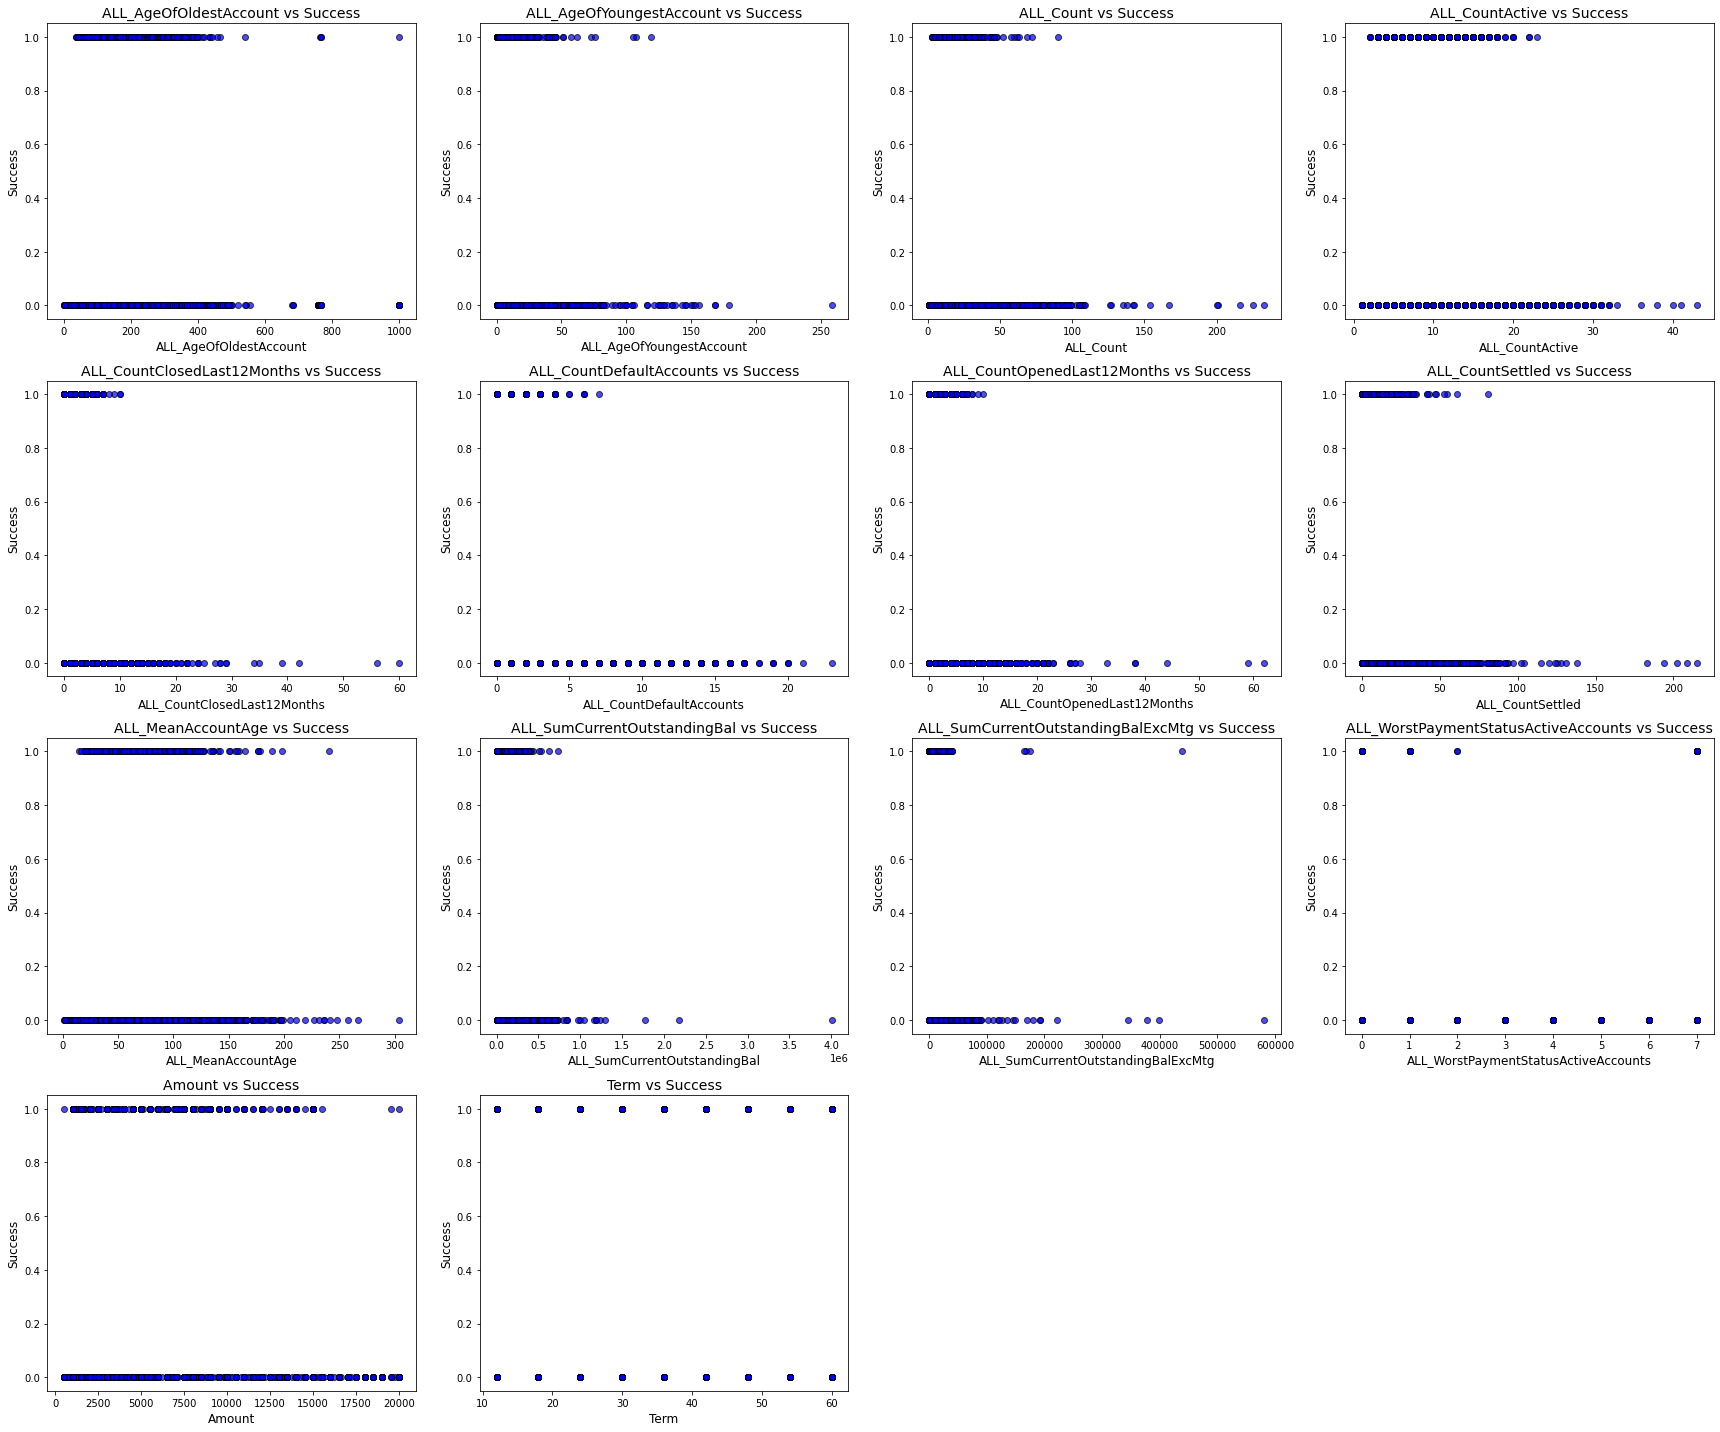

In [92]:
# Define features and target
features = df.columns[:14]  
target = df.columns[15]     

# Function to plot scatter plots for each feature against the target
def plot_scatter_features_vs_target(df, features, target, cols_per_row=4):
    num_features = len(features)
    num_rows = (num_features // cols_per_row) + int(num_features % cols_per_row > 0)
    
    plt.figure(figsize=(cols_per_row * 6, num_rows * 5))  # Adjust figure size for better readability
    for i, feature in enumerate(features, 1):
        plt.subplot(num_rows, cols_per_row, i)
        plt.scatter(df[feature], df[target], alpha=0.7, c='blue', edgecolor='k')
        plt.title(f'{feature} vs {target}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel(target, fontsize=12)
        plt.tight_layout()
    plt.show()

# Call the function to plot scatter plots
plot_scatter_features_vs_target(df, features, target, cols_per_row=4)

In [254]:
# Rank the features by their absolute correlation value with the target
ranked_features = target_corr.abs().sort_values(ascending=False)

# Display the ranked features with their correlation values
print("Features ranked by correlation with target:")
print()
print(ranked_features)

Features ranked by correlation with target:

Success                                 1.000000
ALL_WorstPaymentStatusActiveAccounts    0.179112
ALL_CountDefaultAccounts                0.139361
Amount                                  0.108800
ALL_MeanAccountAge                      0.103557
ALL_AgeOfOldestAccount                  0.074819
ALL_CountOpenedLast12Months             0.074136
ALL_CountActive                         0.064471
ALL_SumCurrentOutstandingBalExcMtg      0.058709
ALL_Count                               0.044824
ALL_SumCurrentOutstandingBal            0.043025
UID                                     0.042425
ALL_CountClosedLast12Months             0.037209
ALL_CountSettled                        0.026158
Term                                    0.010138
ALL_AgeOfYoungestAccount                0.001227
Name: Success, dtype: float64


## Correlation > 0.50

In [94]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Filter the correlation matrix to keep only values greater than 0.50 (excluding diagonal)
filtered_corr = correlation_matrix[correlation_matrix > 0.50]

# Remove the diagonal (correlation of each feature with itself)
filtered_corr = filtered_corr.where(~filtered_corr.isna(), 0)

# Display the filtered correlation matrix
print("Correlations greater than 0.50:")
print(filtered_corr)


Correlations greater than 0.50:
                                      ALL_AgeOfOldestAccount  \
ALL_AgeOfOldestAccount                              1.000000   
ALL_AgeOfYoungestAccount                            0.000000   
ALL_Count                                           0.000000   
ALL_CountActive                                     0.000000   
ALL_CountClosedLast12Months                         0.000000   
ALL_CountDefaultAccounts                            0.000000   
ALL_CountOpenedLast12Months                         0.000000   
ALL_CountSettled                                    0.000000   
ALL_MeanAccountAge                                  0.743556   
ALL_SumCurrentOutstandingBal                        0.000000   
ALL_SumCurrentOutstandingBalExcMtg                  0.000000   
ALL_WorstPaymentStatusActiveAccounts                0.000000   
Amount                                              0.000000   
Term                                                0.000000   
Success 

# Exploratary Data Analysis

In [95]:
df.describe()

ALL_AgeOfOldestAccount  ALL_AgeOfYoungestAccount    ALL_Count  \
count             8727.000000               8727.000000  8727.000000   
mean               164.824682                  8.632405    17.753638   
std                 93.354025                 12.789964    13.844799   
min                  1.000000                  0.000000     1.000000   
25%                102.000000                  2.000000     9.000000   
50%                152.000000                  5.000000    15.000000   
75%                213.000000                 10.000000    22.000000   
max                999.000000                258.000000   233.000000   

       ALL_CountActive  ALL_CountClosedLast12Months  ALL_CountDefaultAccounts  \
count      8727.000000                  8727.000000               8727.000000   
mean          9.398648                     1.623467                  1.411596   
std           4.781162                     2.613254                  2.754979   
min           1.000000                     0.000000                  0.000000   
25%           6.000000                     0.000000                  0.000000   
50%           9.000000                     1.000000                  0.000000   
75%          12.000000                     2.000000                  2.000000   
max          43.000000                    60.000000                 23.000000   

       ALL_CountOpenedLast12Months  ALL_CountSettled  ALL_MeanAccountAge  \
count                  8727.000000       8727.000000         8727.000000   
mean                      2.499599          8.354990           57.984832   
std                       2.958568         11.448808           28.500876   
min                       0.000000          0.000000            1.000000   
25%                       1.000000          2.000000           39.325000   
50%                       2.000000          6.000000           53.560000   
75%                       3.000000         10.000000           71.830000   
max                      62.000000        215.000000          304.000000   

       ALL_SumCurrentOutstandingBal  ALL_SumCurrentOutstandingBalExcMtg  \
count                  8.727000e+03                         8727.000000   
mean                   5.483550e+04                        13035.461671   
std                    1.079527e+05                        17813.653242   
min                    0.000000e+00                            0.000000   
25%                    3.642000e+03                         2562.000000   
50%                    1.306500e+04                         8549.000000   
75%                    6.394800e+04                        18189.500000   
max                    4.004808e+06                       581415.000000   

       ALL_WorstPaymentStatusActiveAccounts        Amount         Term  \
count                           8727.000000   8727.000000  8727.000000   
mean                               2.099232   7567.405409    42.039876   
std                                3.141153   5310.319208    16.120230   
min                                0.000000    500.000000    12.000000   
25%                                0.000000   3000.000000    24.000000   
50%                                0.000000   6500.000000    48.000000   
75%                                7.000000  10000.000000    60.000000   
max                                7.000000  20000.000000    60.000000   

           Success  
count  8727.000000  
mean      0.105649  
std       0.307406  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

## Measuring Central Tendency

In [141]:
# Select columns 0 to 15
columns_to_analyze = df.columns[0:15] 

# Calculate mean, median, and mode for each column
mean_values = df[columns_to_analyze].mean()
median_values = df[columns_to_analyze].median()
mode_values = df[columns_to_analyze].mode().iloc[0] 

# Display the results
print("Mean values for features:")
print(mean_values)
print("\nMedian values for features:")
print(median_values)
print("\nMode values for features:")
print(mode_values)

Mean values for features:
ALL_AgeOfOldestAccount                    164.824682
ALL_AgeOfYoungestAccount                    8.632405
ALL_Count                                  17.753638
ALL_CountActive                             9.398648
ALL_CountClosedLast12Months                 1.623467
ALL_CountDefaultAccounts                    1.411596
ALL_CountOpenedLast12Months                 2.499599
ALL_CountSettled                            8.354990
ALL_MeanAccountAge                         57.984832
ALL_SumCurrentOutstandingBal            54835.504182
ALL_SumCurrentOutstandingBalExcMtg      13035.461671
ALL_WorstPaymentStatusActiveAccounts        2.099232
Amount                                   7567.405409
Term                                       42.039876
dtype: float64

Median values for features:
ALL_AgeOfOldestAccount                    152.00
ALL_AgeOfYoungestAccount                    5.00
ALL_Count                                  15.00
ALL_CountActive                          

C:\Users\amiru\AppData\Local\Temp\ipykernel_19272\1185779081.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_values = df[columns_to_analyze].mean()
C:\Users\amiru\AppData\Local\Temp\ipykernel_19272\1185779081.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_values = df[columns_to_analyze].median()


## Measures of Variability

In [145]:
# Select numerical columns only (int and float types)
numerical_columns = df.select_dtypes(include=['number']).columns

# Calculate standard deviation, variance, and range for each numerical column
std_values = df[numerical_columns].std()
variance_values = df[numerical_columns].var()
range_values = df[numerical_columns].max() - df[numerical_columns].min()

# Display the results
print("Standard Deviation values for numerical features:")
print(std_values)
print("\nVariance values for numerical features:")
print(variance_values)
print("\nRange values for numerical features:")
print(range_values)


Standard Deviation values for numerical features:
ALL_AgeOfOldestAccount                      93.354025
ALL_AgeOfYoungestAccount                    12.789964
ALL_Count                                   13.844799
ALL_CountActive                              4.781162
ALL_CountClosedLast12Months                  2.613254
ALL_CountDefaultAccounts                     2.754979
ALL_CountOpenedLast12Months                  2.958568
ALL_CountSettled                            11.448808
ALL_MeanAccountAge                          28.500876
ALL_SumCurrentOutstandingBal            107952.710437
ALL_SumCurrentOutstandingBalExcMtg       17813.653242
ALL_WorstPaymentStatusActiveAccounts         3.141153
Amount                                    5310.319208
Term                                        16.120230
Success                                      0.307406
dtype: float64

Variance values for numerical features:
ALL_AgeOfOldestAccount                  8.714974e+03
ALL_AgeOfYoungestAccount       

## Visualizing Outliers

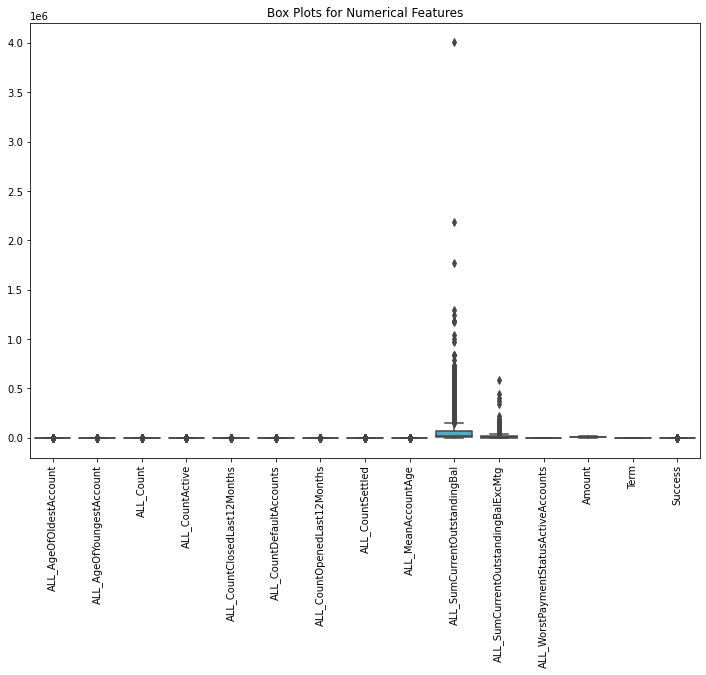

In [147]:
# Plot boxplots for numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=90)
plt.title('Box Plots for Numerical Features')
plt.show()

# Relationship Between Attributes

## ALL_AgeOfOldestAccount                    

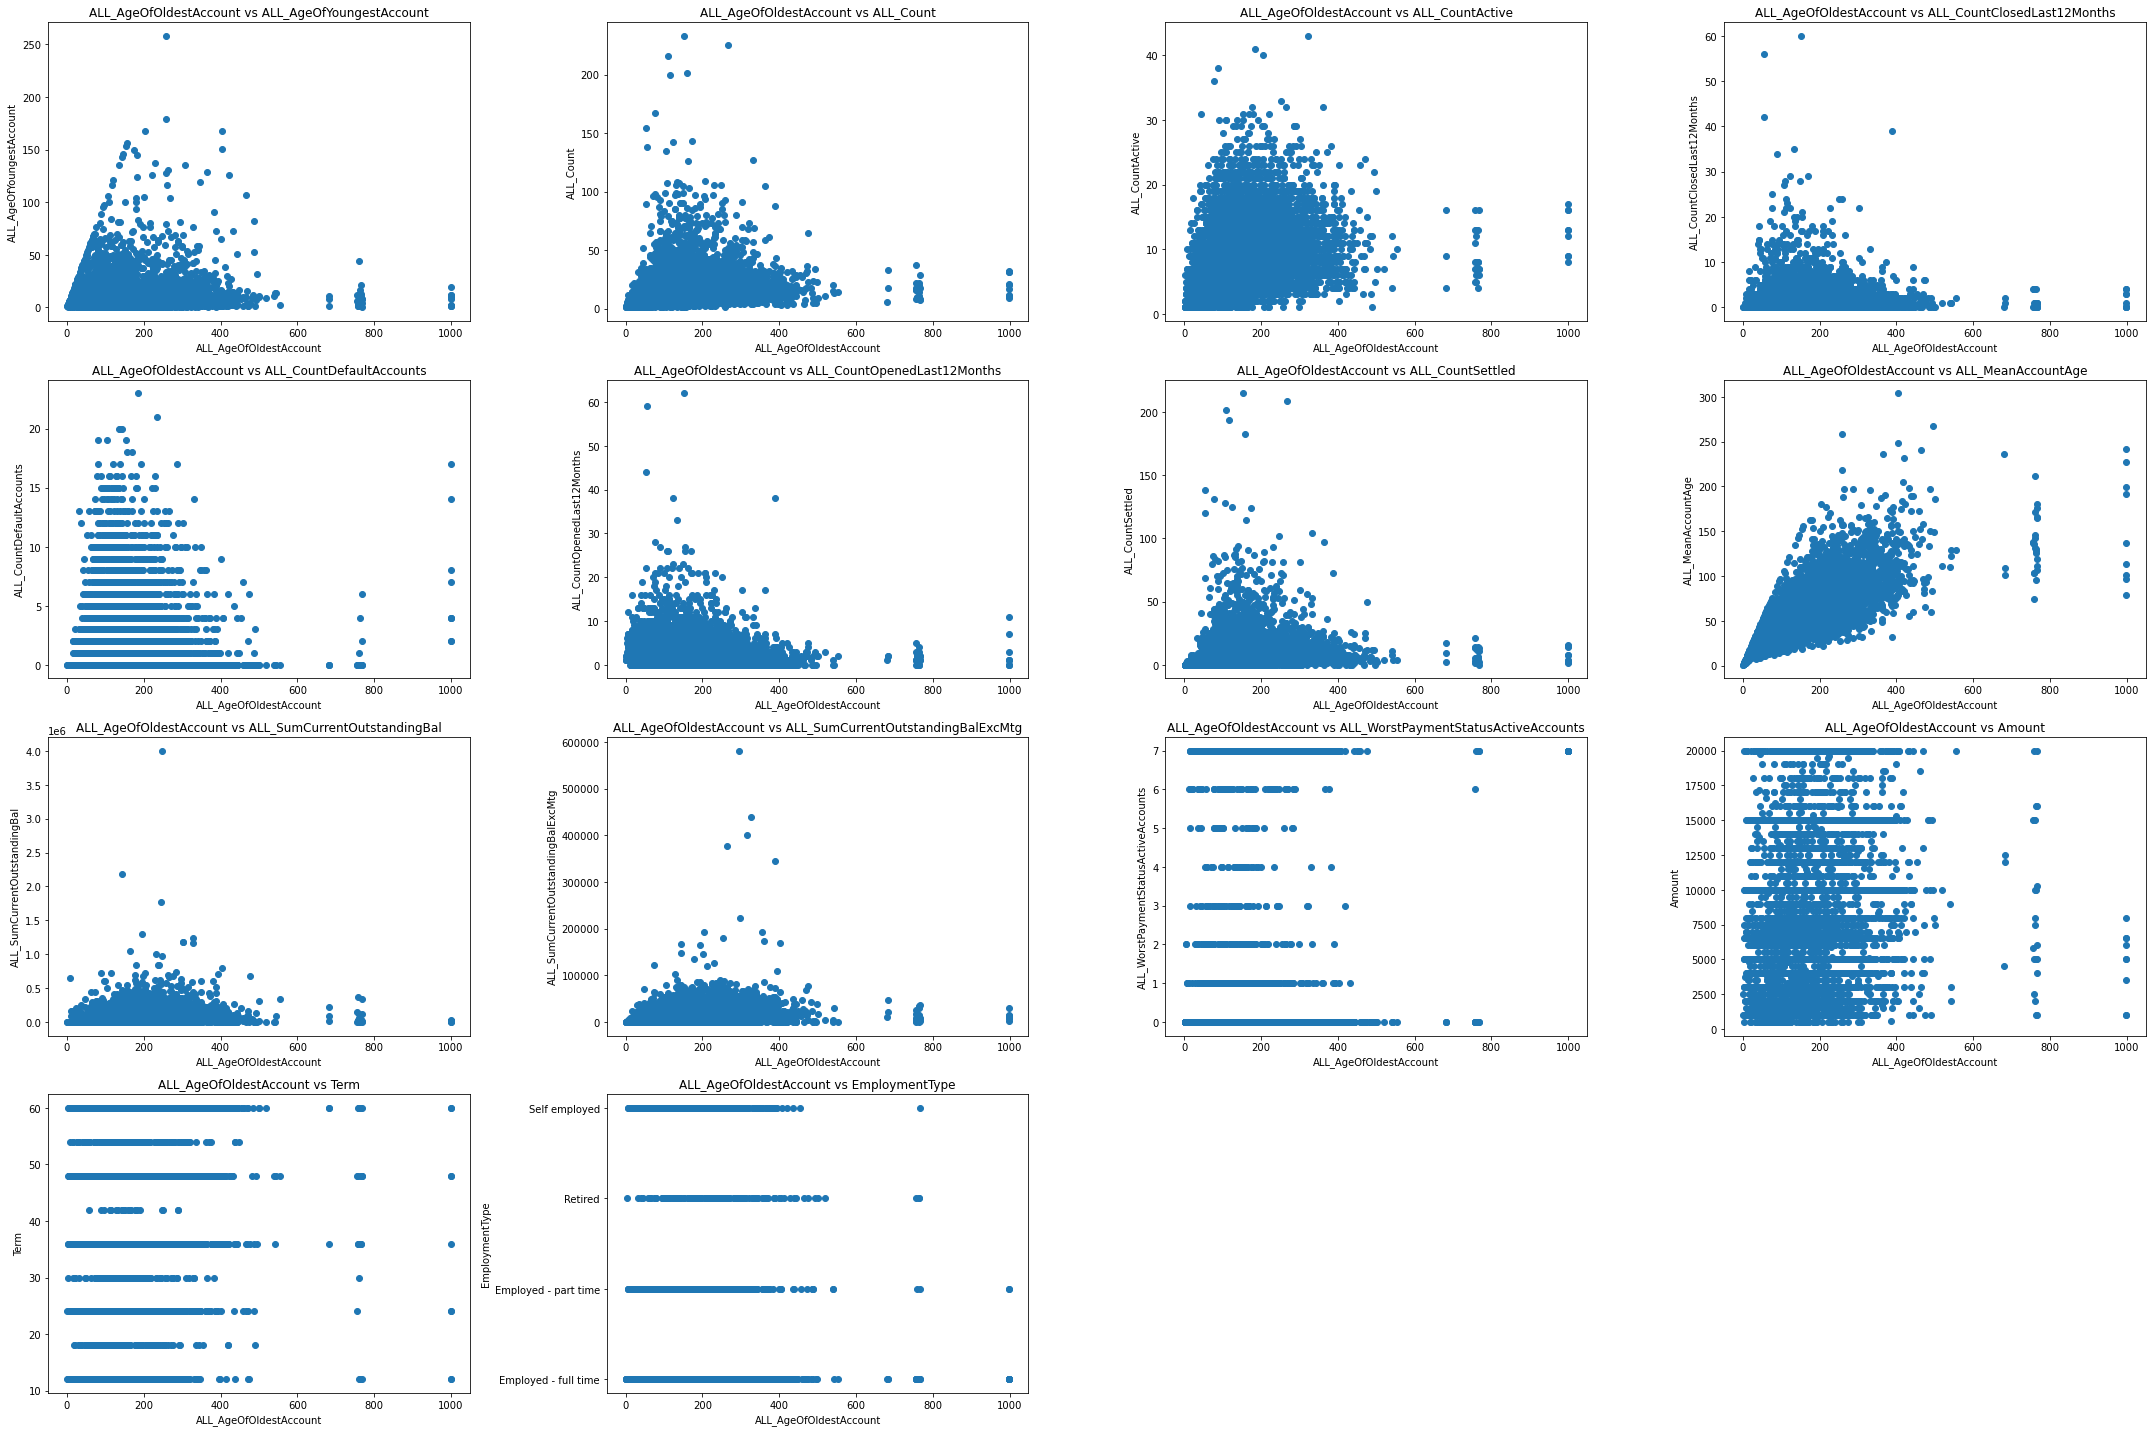

In [120]:
# Select the column
column_select = 'ALL_AgeOfOldestAccount'

# Get all columns except column_select and column 15
columns_to_plot = df.columns.drop([column_select, df.columns[15]])

# Plot scatter plots of column 0 against the other columns
plt.figure(figsize=(30, 20))  

for i, column in enumerate(columns_to_plot):
    plt.subplot(4, 4, i + 1)  # Create a grid of subplots
    plt.scatter(df[column_select], df[column])
    plt.xlabel(column_select)
    plt.ylabel(column)
    plt.title(f'{column_select} vs {column}')

plt.tight_layout()  
plt.show()

## ALL_AgeOfYoungestAccount                    

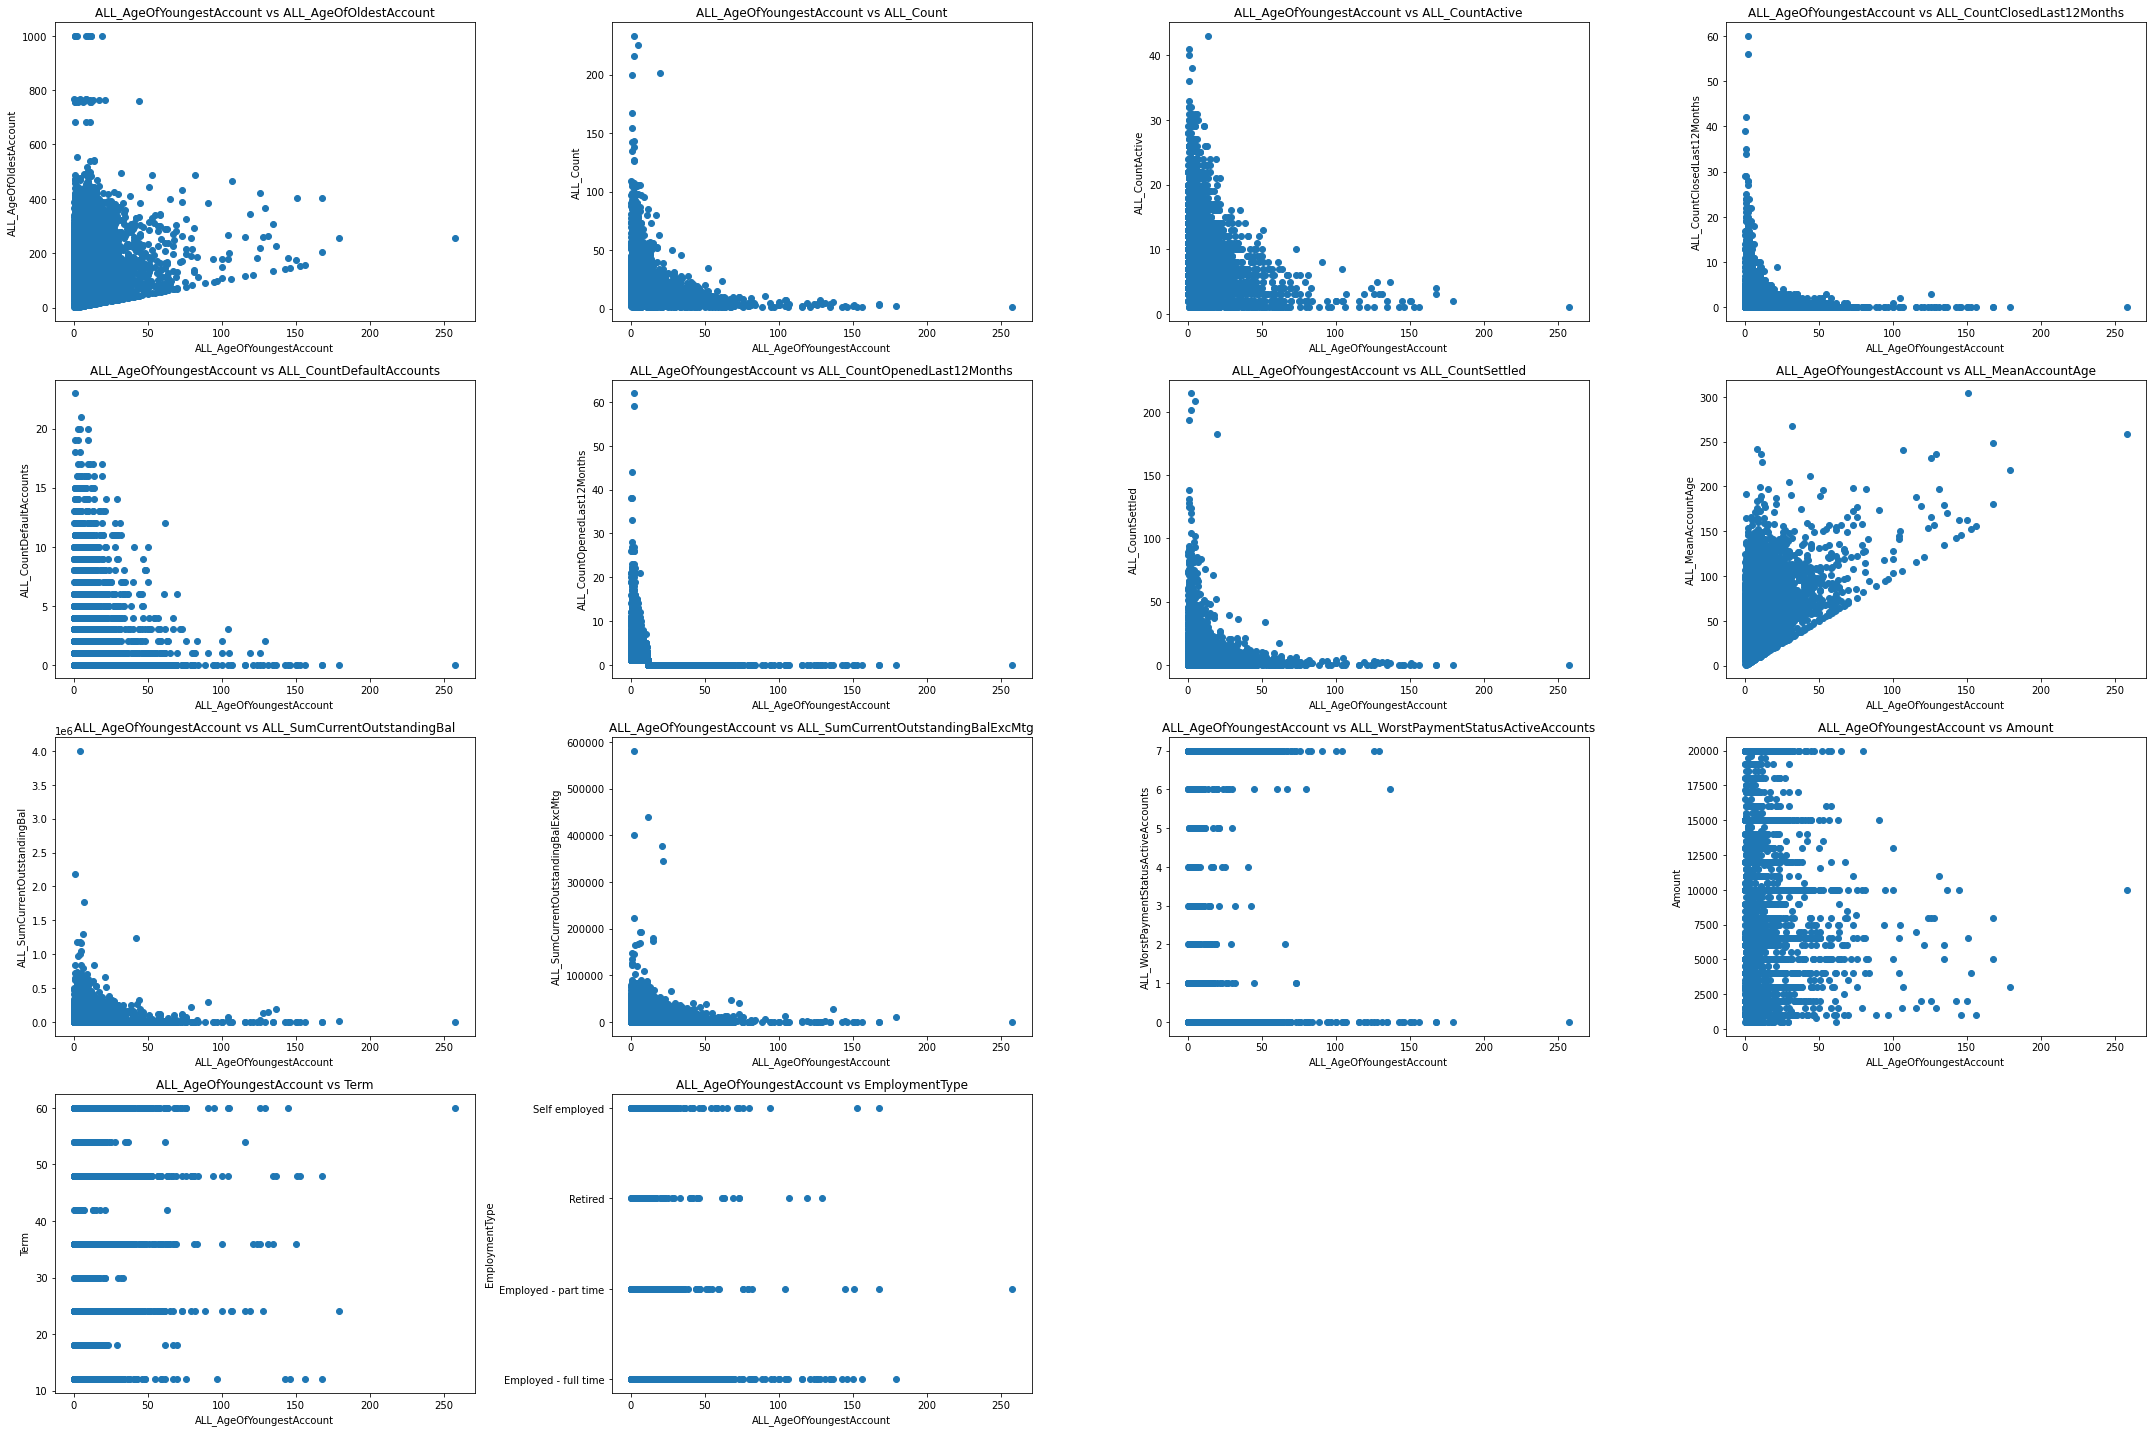

In [121]:
# Select the column 
column_select = 'ALL_AgeOfYoungestAccount'

# Get all columns except column_select and column 15
columns_to_plot = df.columns.drop([column_select, df.columns[15]])

# Plot scatter plots of column 0 against the other columns
plt.figure(figsize=(30, 20))  

for i, column in enumerate(columns_to_plot):
    plt.subplot(4, 4, i + 1)  # Create a grid of subplots
    plt.scatter(df[column_select], df[column])
    plt.xlabel(column_select)
    plt.ylabel(column)
    plt.title(f'{column_select} vs {column}')

plt.tight_layout()  
plt.show()

## ALL_Count                                  

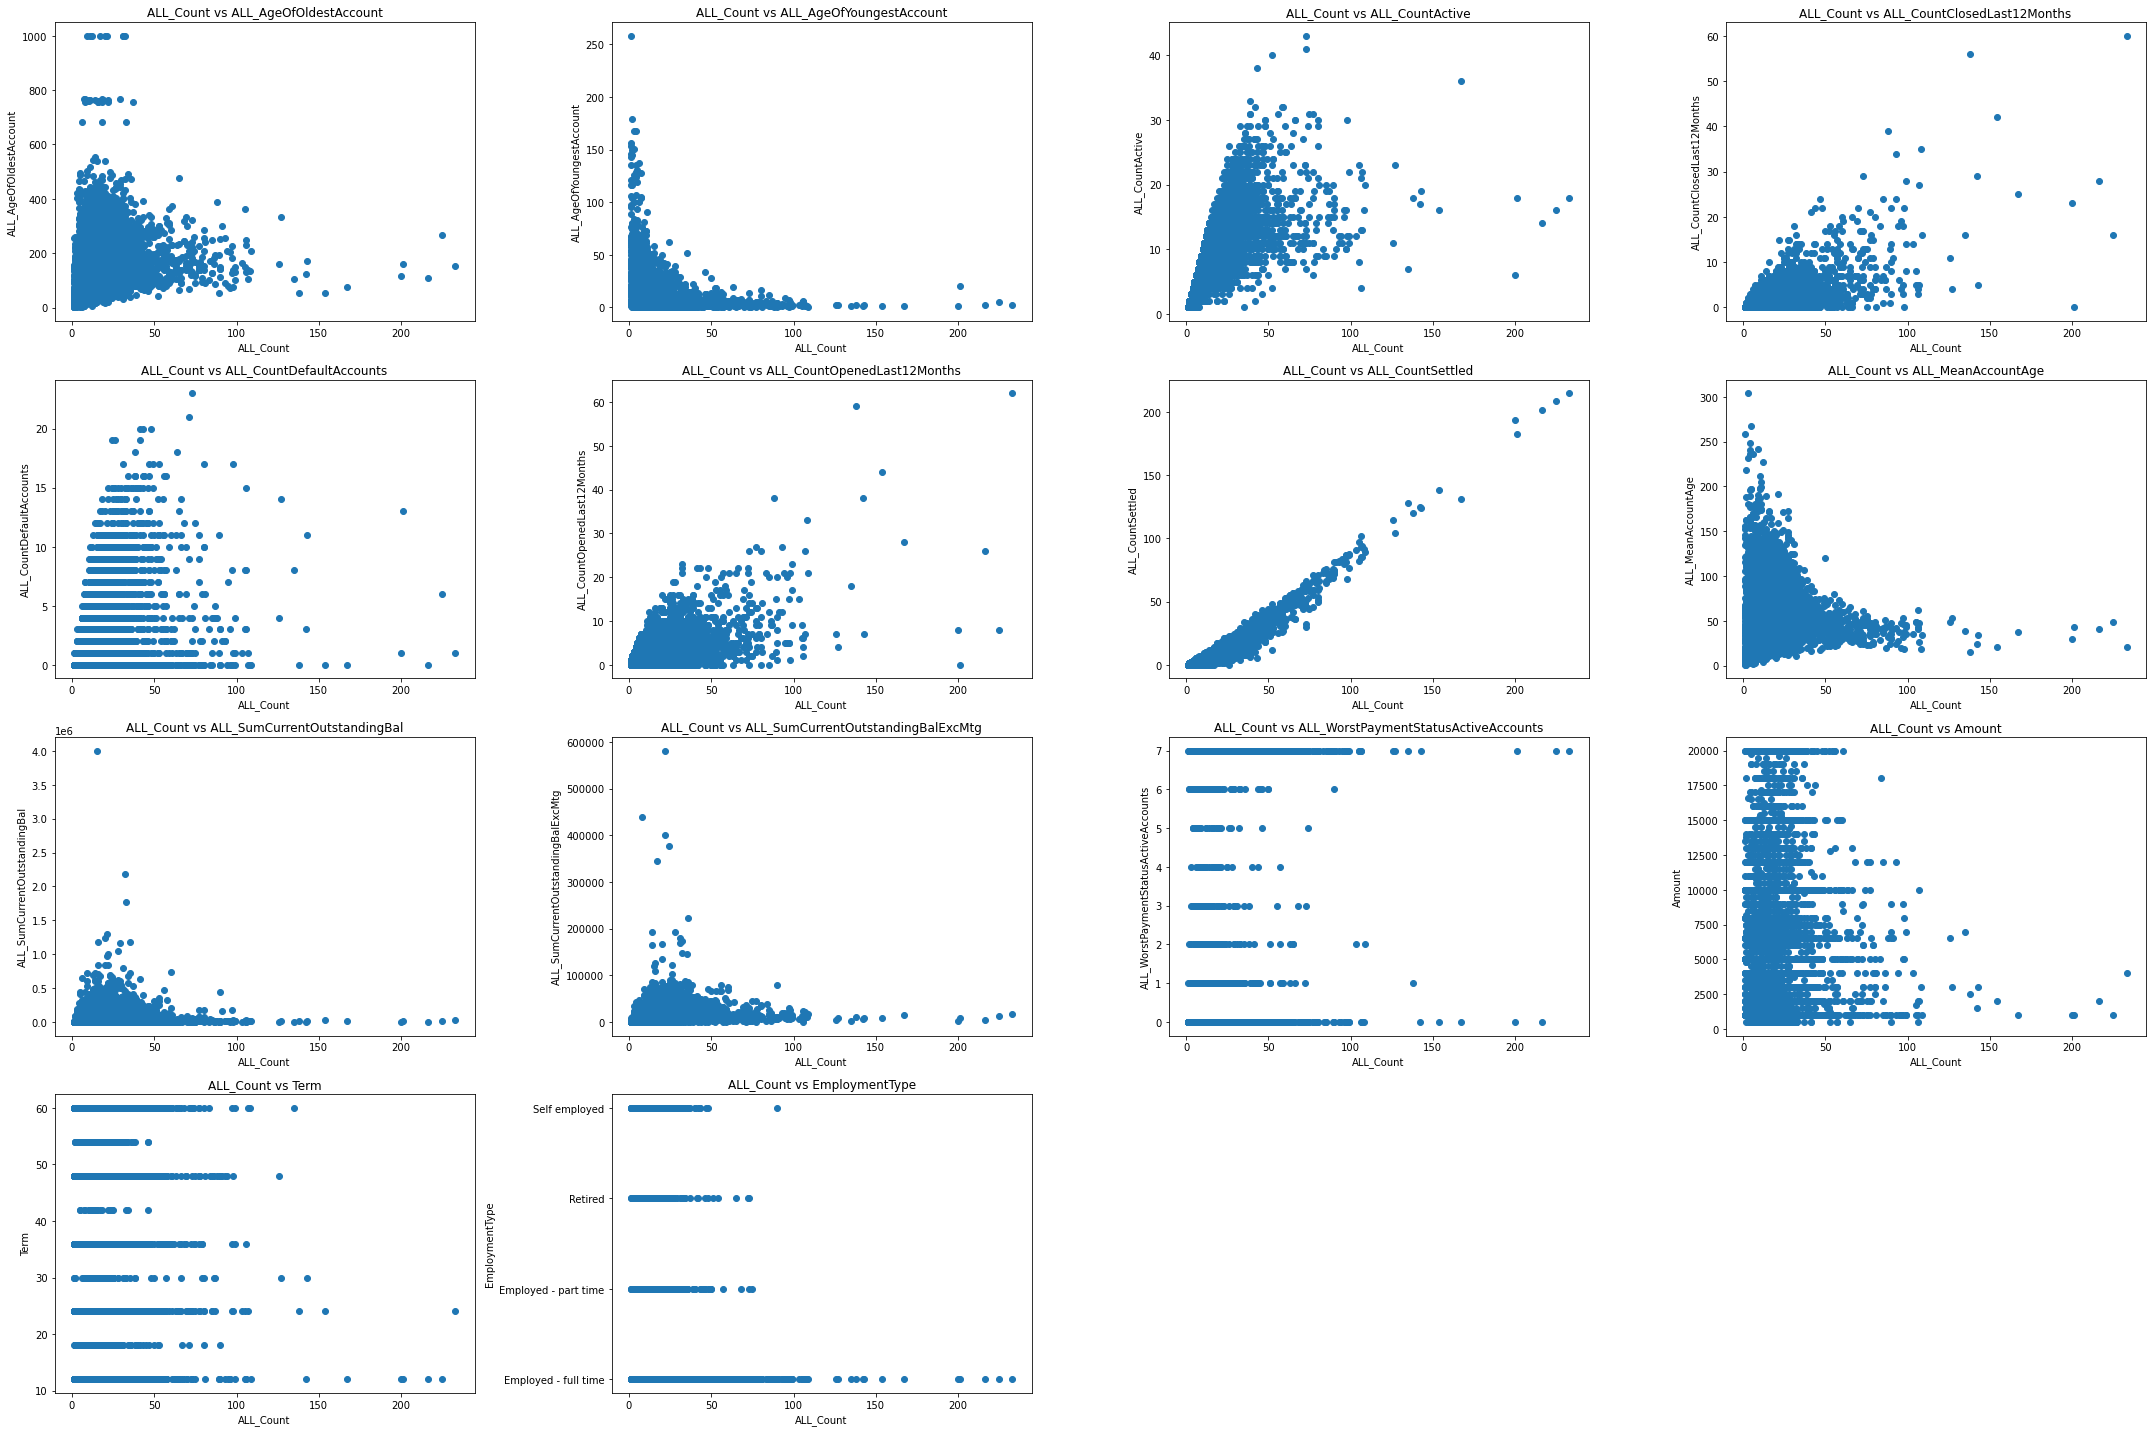

In [124]:
# Select the column 
column_select = 'ALL_Count'

# Get all columns except column_select and column 15
columns_to_plot = df.columns.drop([column_select, df.columns[15]])

# Plot scatter plots of column 0 against the other columns
plt.figure(figsize=(30, 20))  

for i, column in enumerate(columns_to_plot):
    plt.subplot(4, 4, i + 1)  # Create a grid of subplots
    plt.scatter(df[column_select], df[column])
    plt.xlabel(column_select)
    plt.ylabel(column)
    plt.title(f'{column_select} vs {column}')

plt.tight_layout()  
plt.show()

## ALL_CountActive

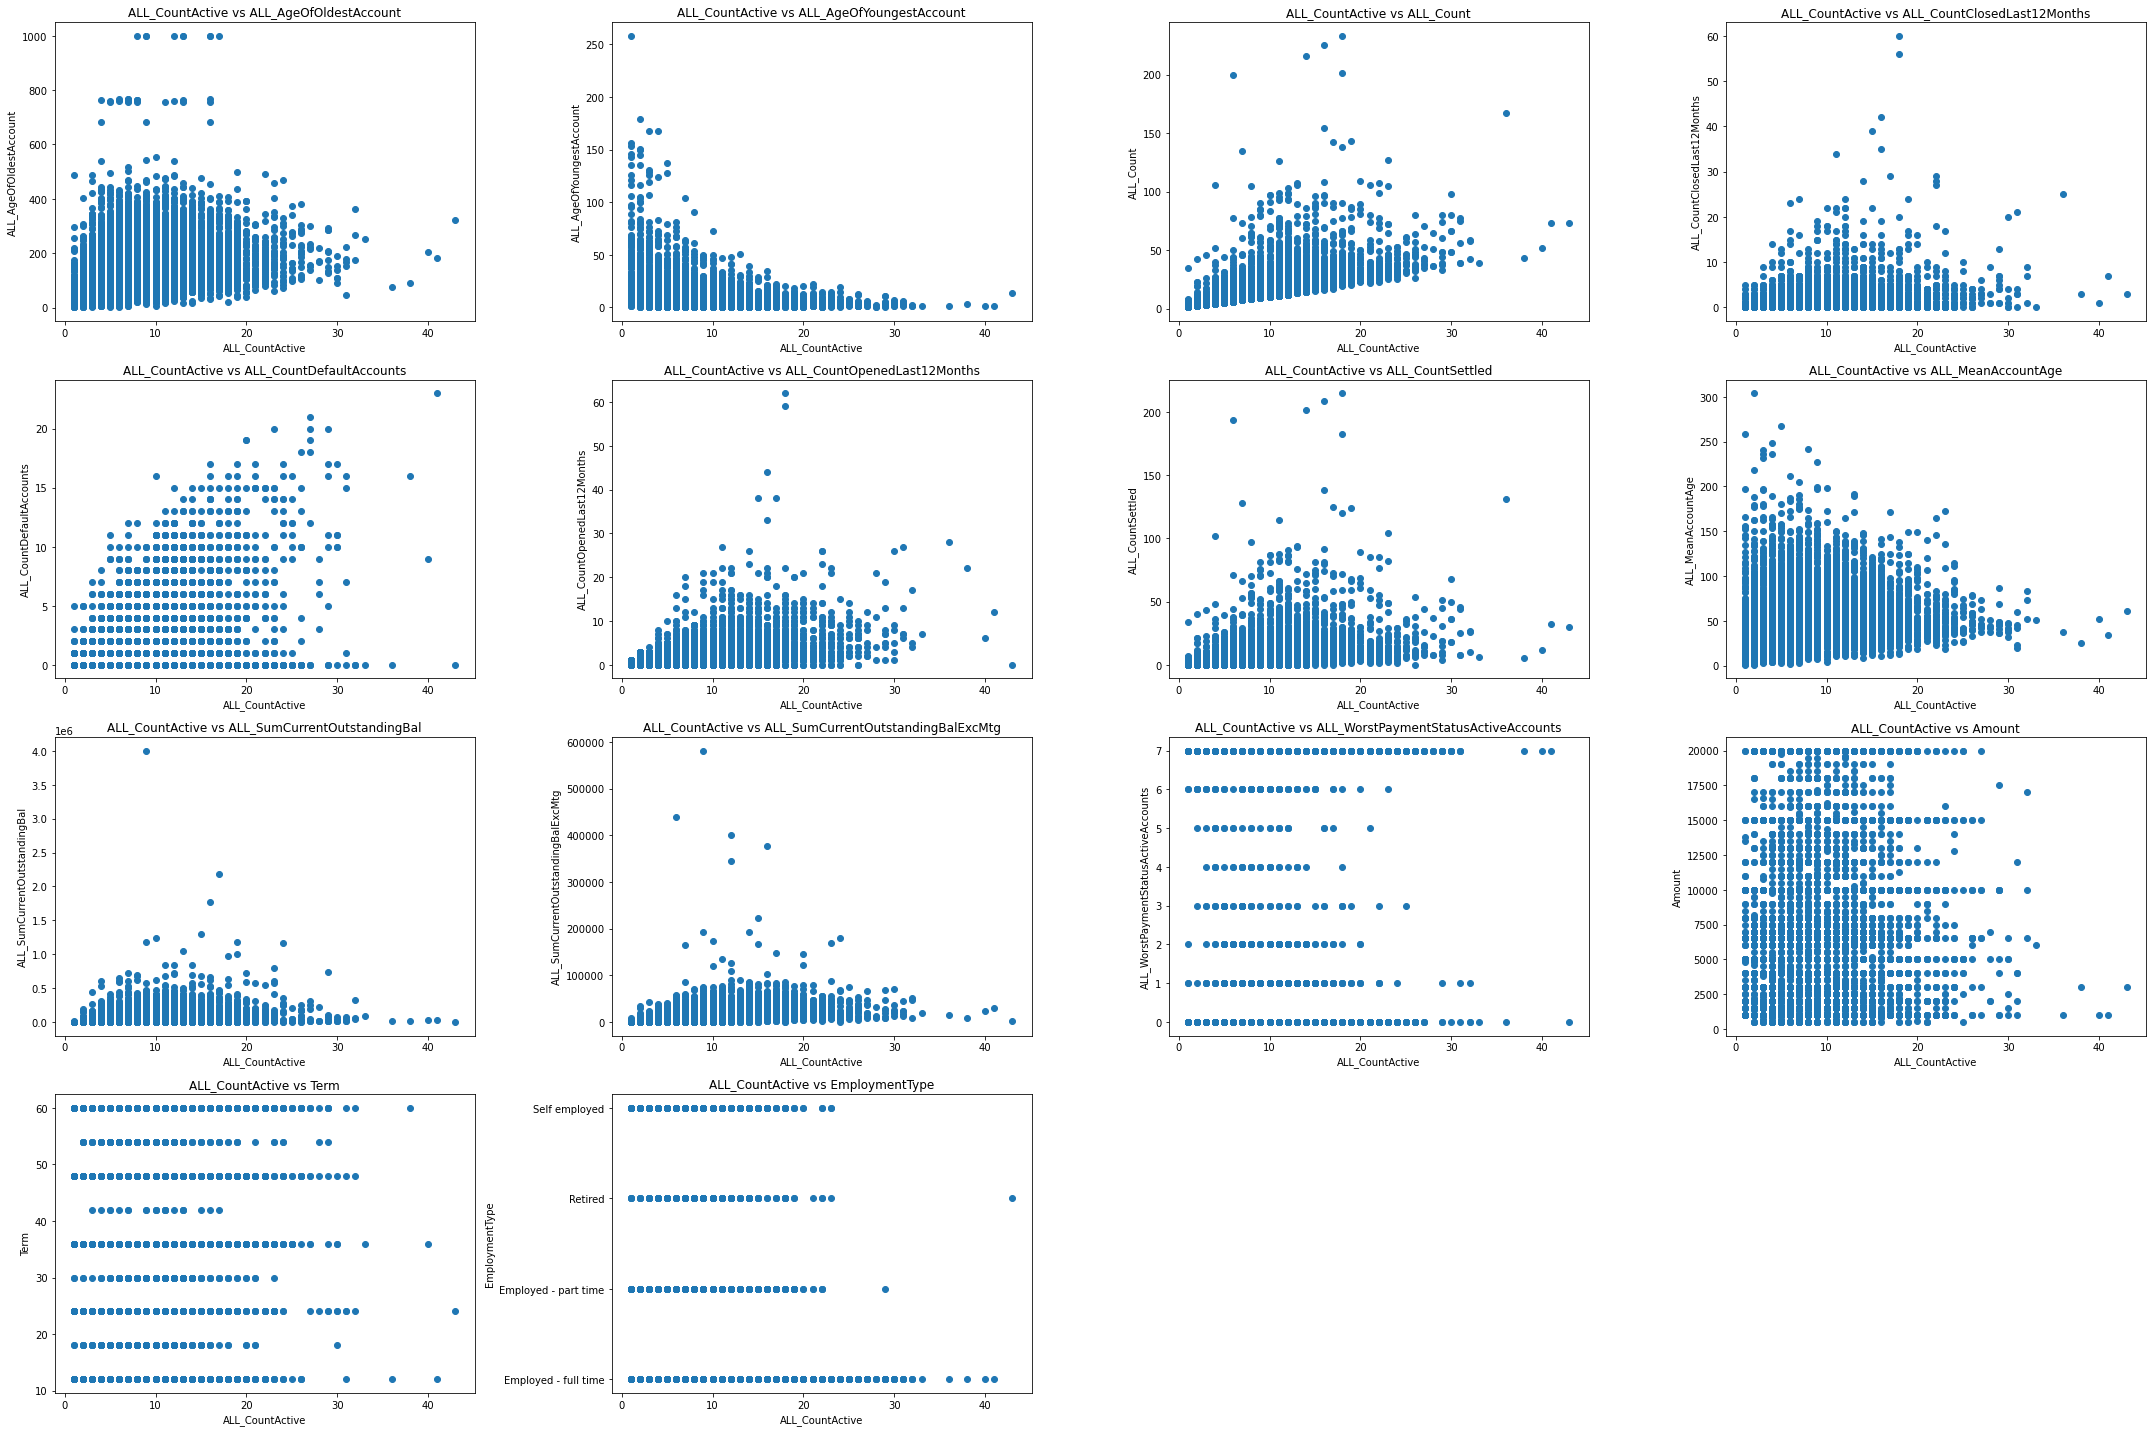

In [128]:
# Select the column 
column_select = 'ALL_CountActive'

# Get all columns except column_select and column 15
columns_to_plot = df.columns.drop([column_select, df.columns[15]])

# Plot scatter plots of column 0 against the other columns
plt.figure(figsize=(30, 20))  

for i, column in enumerate(columns_to_plot):
    plt.subplot(4, 4, i + 1)  # Create a grid of subplots
    plt.scatter(df[column_select], df[column])
    plt.xlabel(column_select)
    plt.ylabel(column)
    plt.title(f'{column_select} vs {column}')

plt.tight_layout()  
plt.show()

## ALL_CountClosedLast12Months

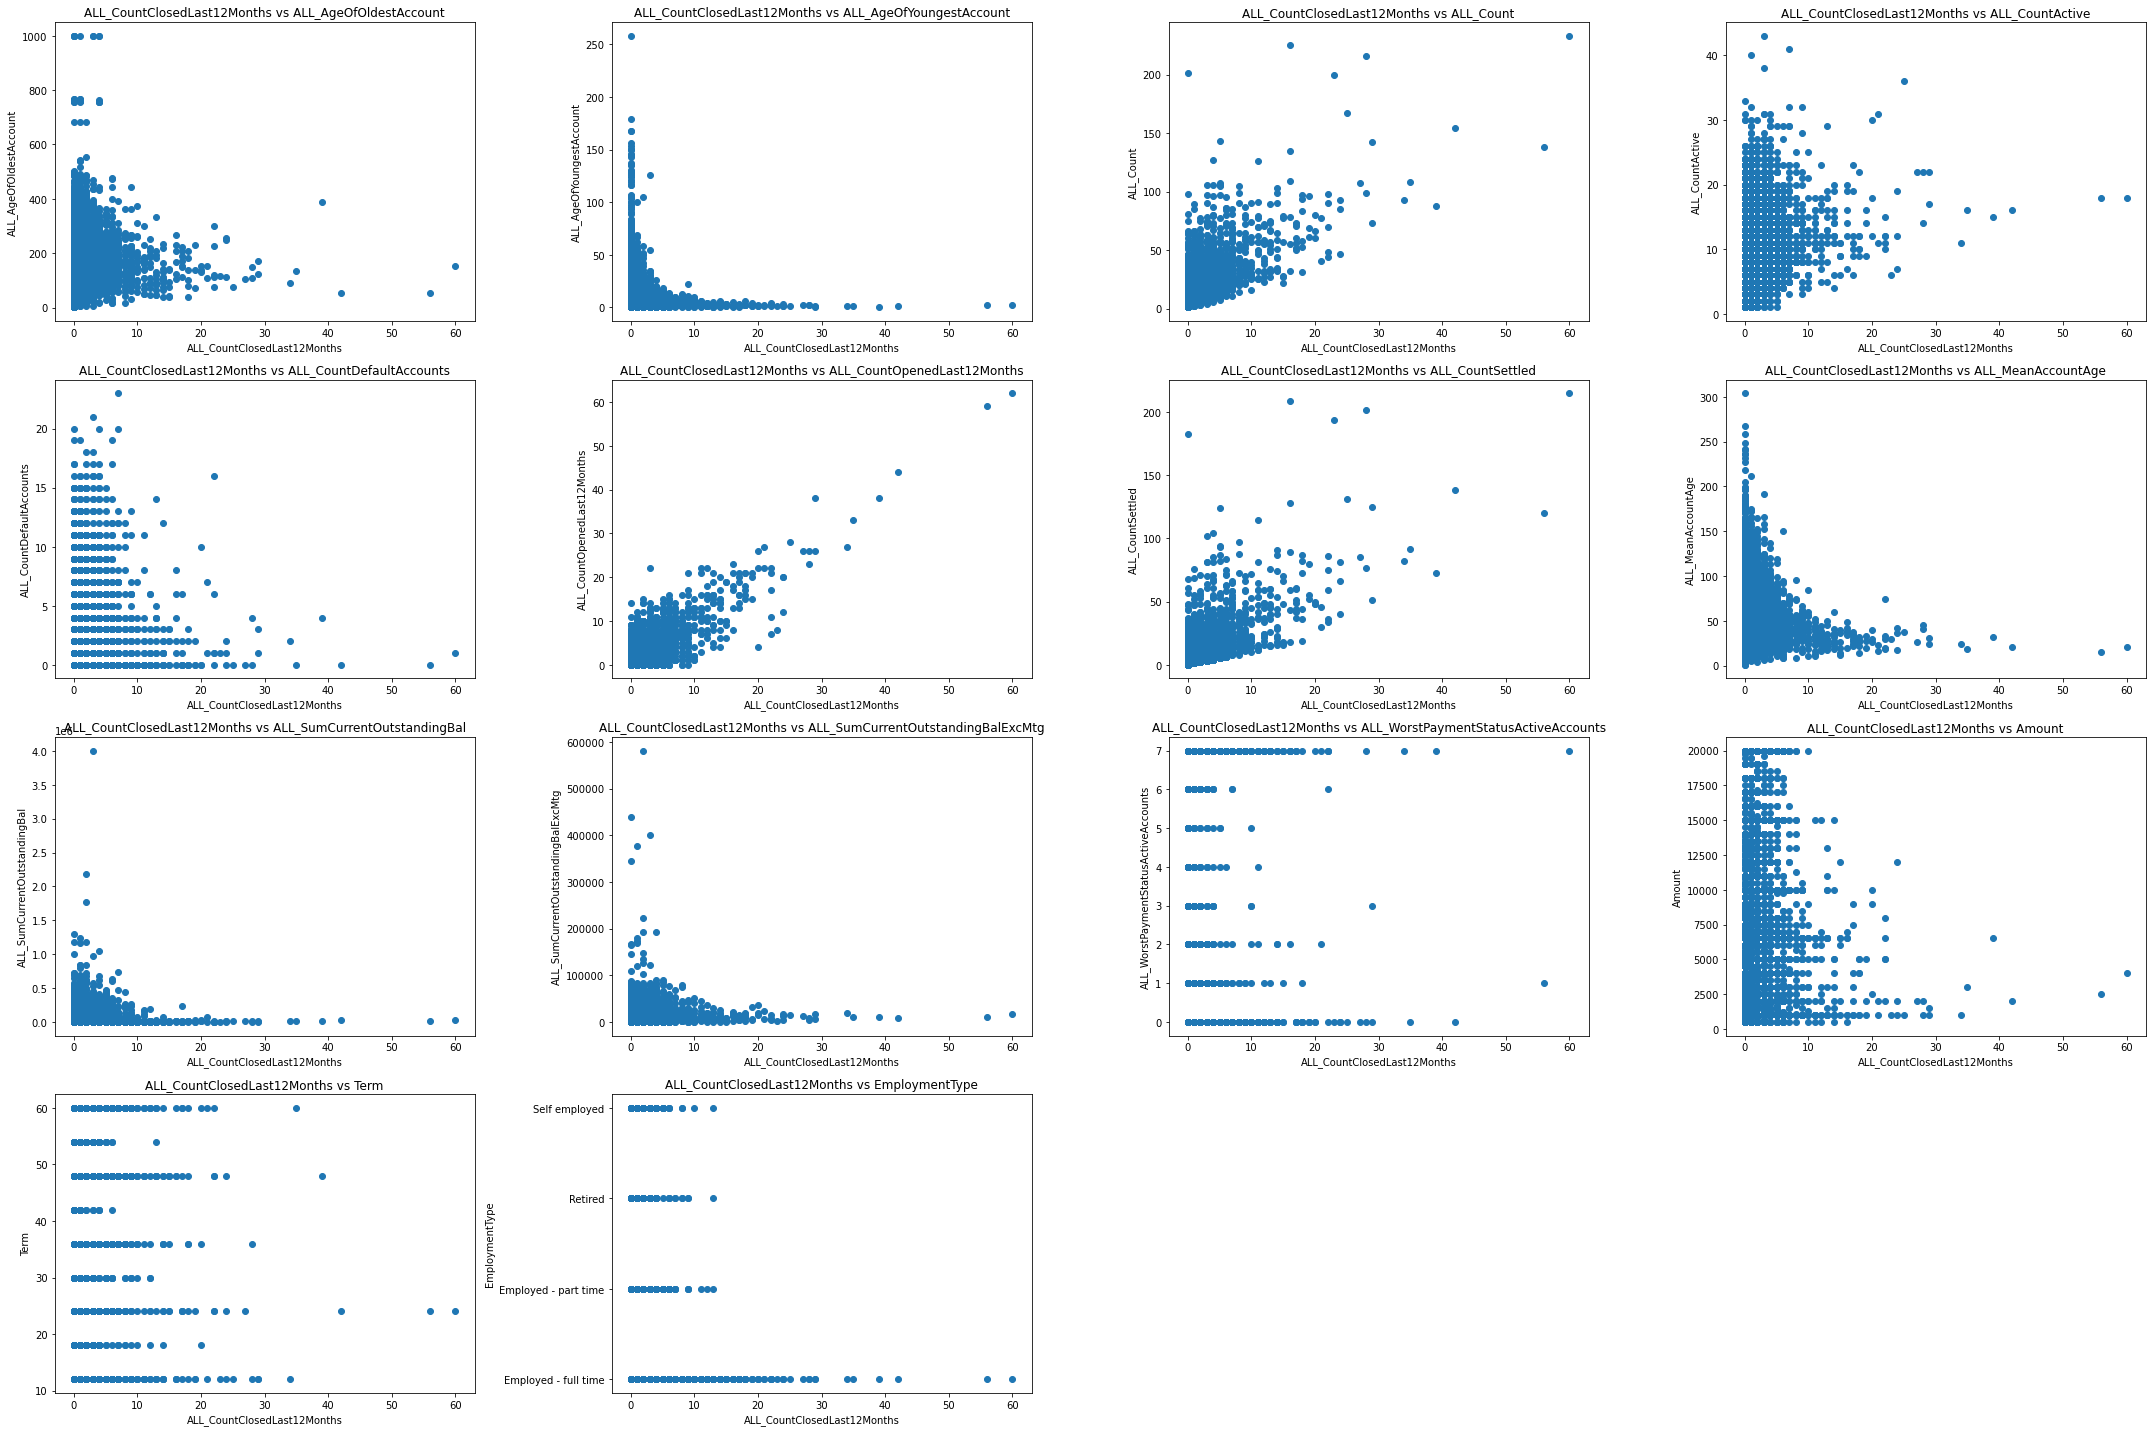

In [129]:
# Select the column 
column_select = 'ALL_CountClosedLast12Months'

# Get all columns except column_select and column 15
columns_to_plot = df.columns.drop([column_select, df.columns[15]])

# Plot scatter plots of column 0 against the other columns
plt.figure(figsize=(30, 20))  

for i, column in enumerate(columns_to_plot):
    plt.subplot(4, 4, i + 1)  # Create a grid of subplots
    plt.scatter(df[column_select], df[column])
    plt.xlabel(column_select)
    plt.ylabel(column)
    plt.title(f'{column_select} vs {column}')

plt.tight_layout()  
plt.show()

## ALL_CountDefaultAccounts 

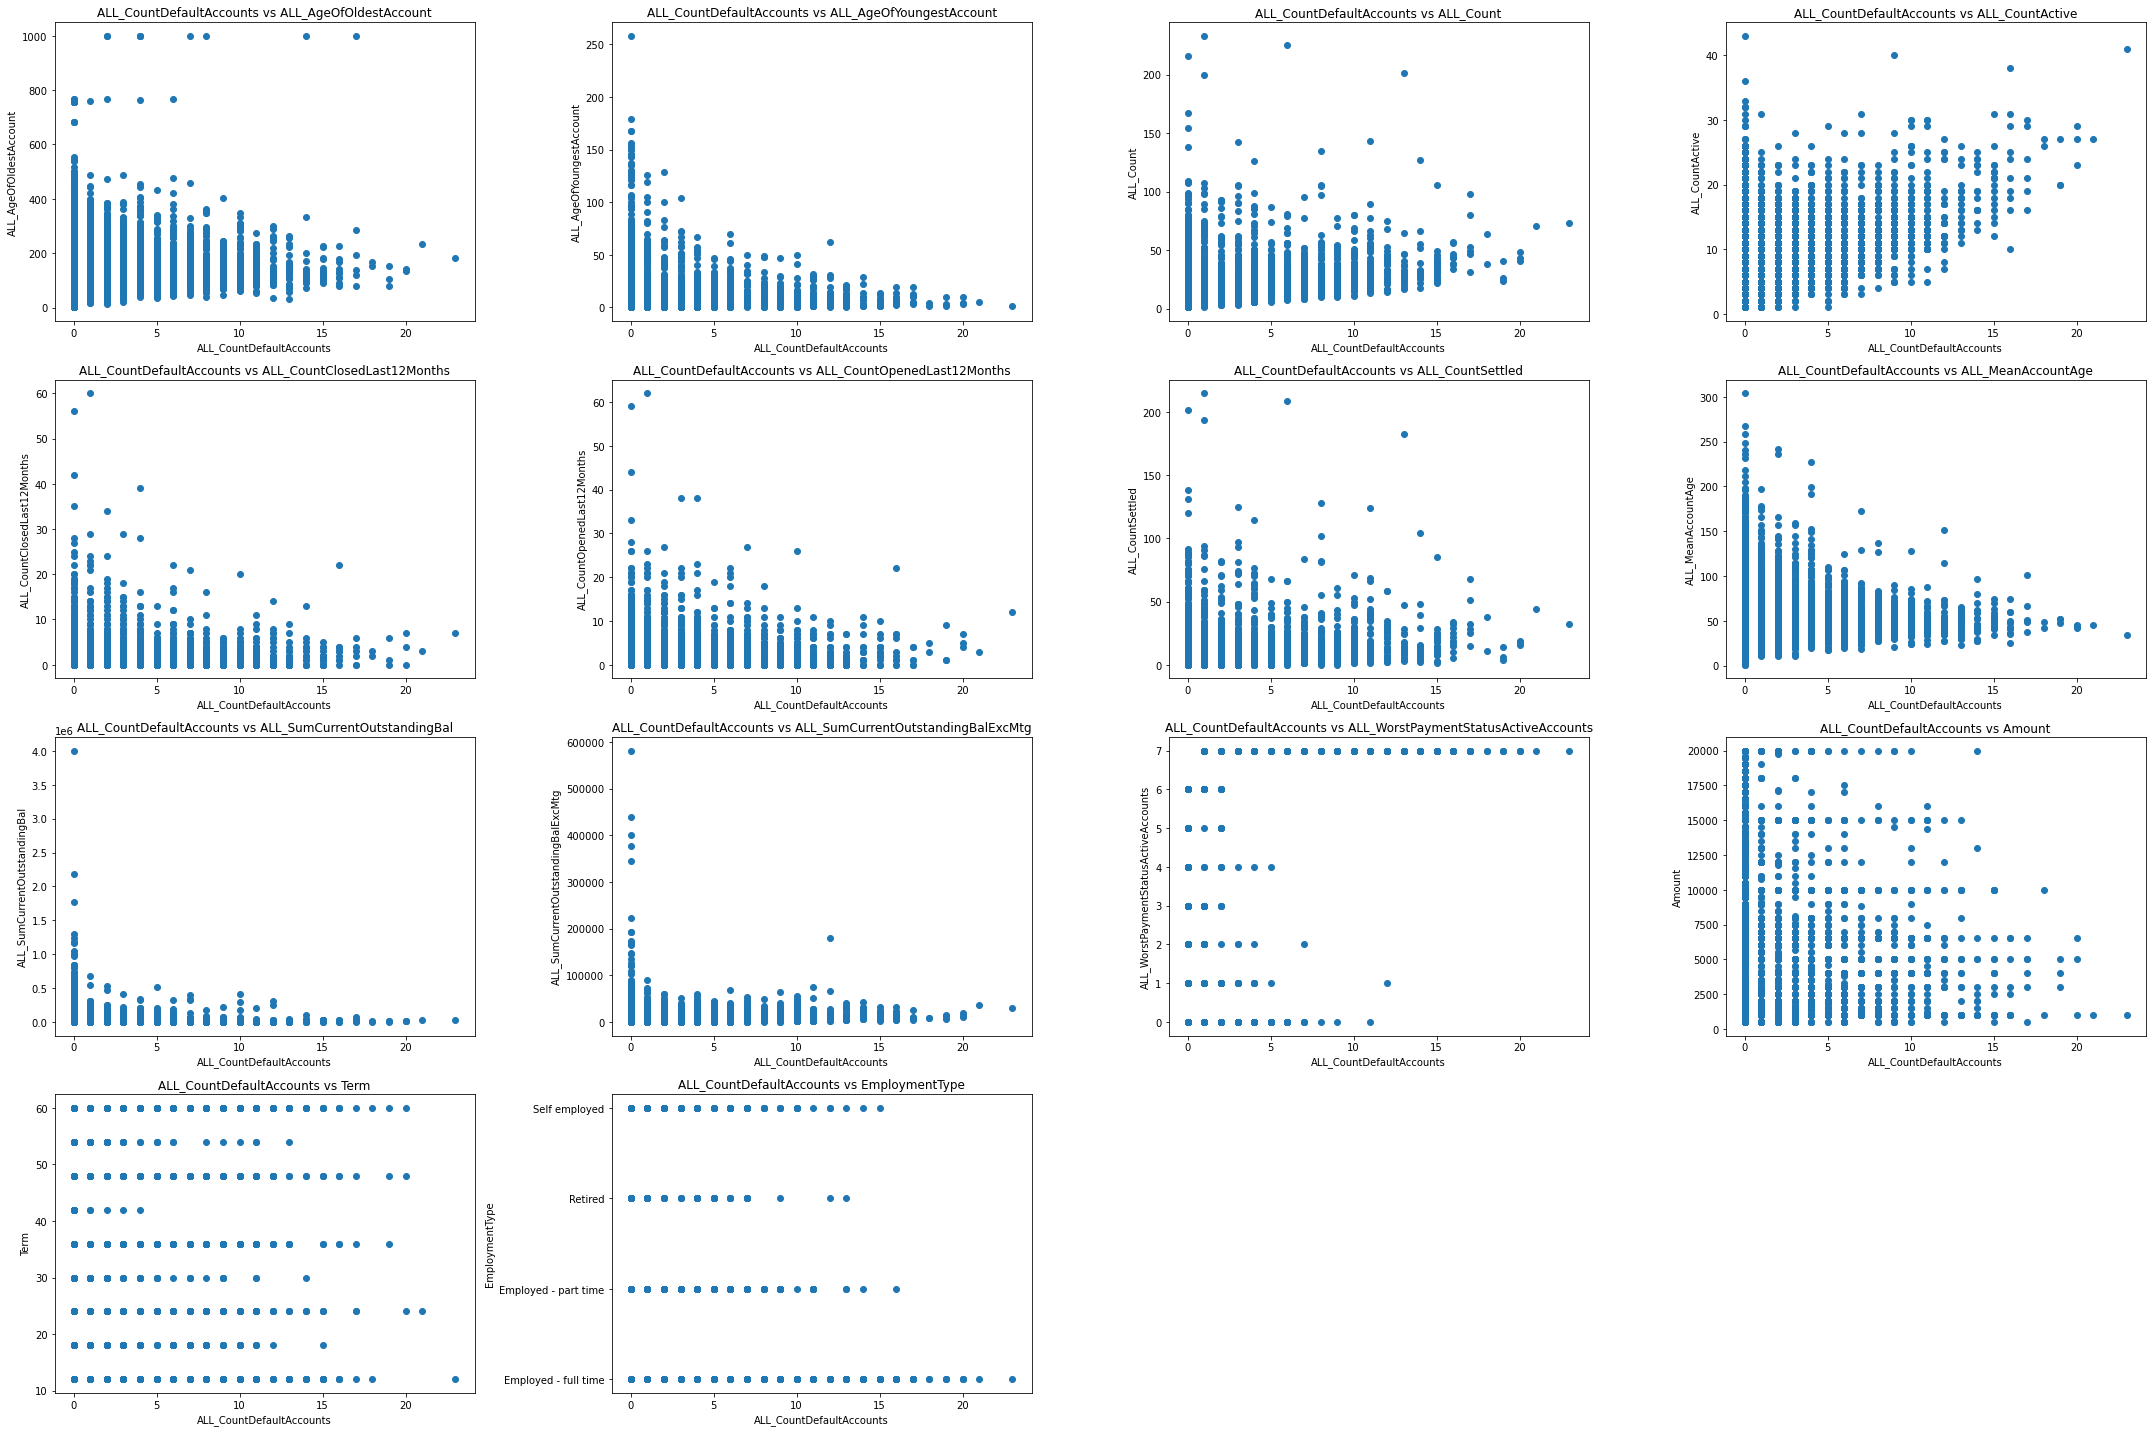

In [130]:
# Select the column 
column_select = 'ALL_CountDefaultAccounts'

# Get all columns except column_select and column 15
columns_to_plot = df.columns.drop([column_select, df.columns[15]])

# Plot scatter plots of column 0 against the other columns
plt.figure(figsize=(30, 20))  

for i, column in enumerate(columns_to_plot):
    plt.subplot(4, 4, i + 1)  # Create a grid of subplots
    plt.scatter(df[column_select], df[column])
    plt.xlabel(column_select)
    plt.ylabel(column)
    plt.title(f'{column_select} vs {column}')

plt.tight_layout()  
plt.show()

## ALL_CountOpenedLast12Months


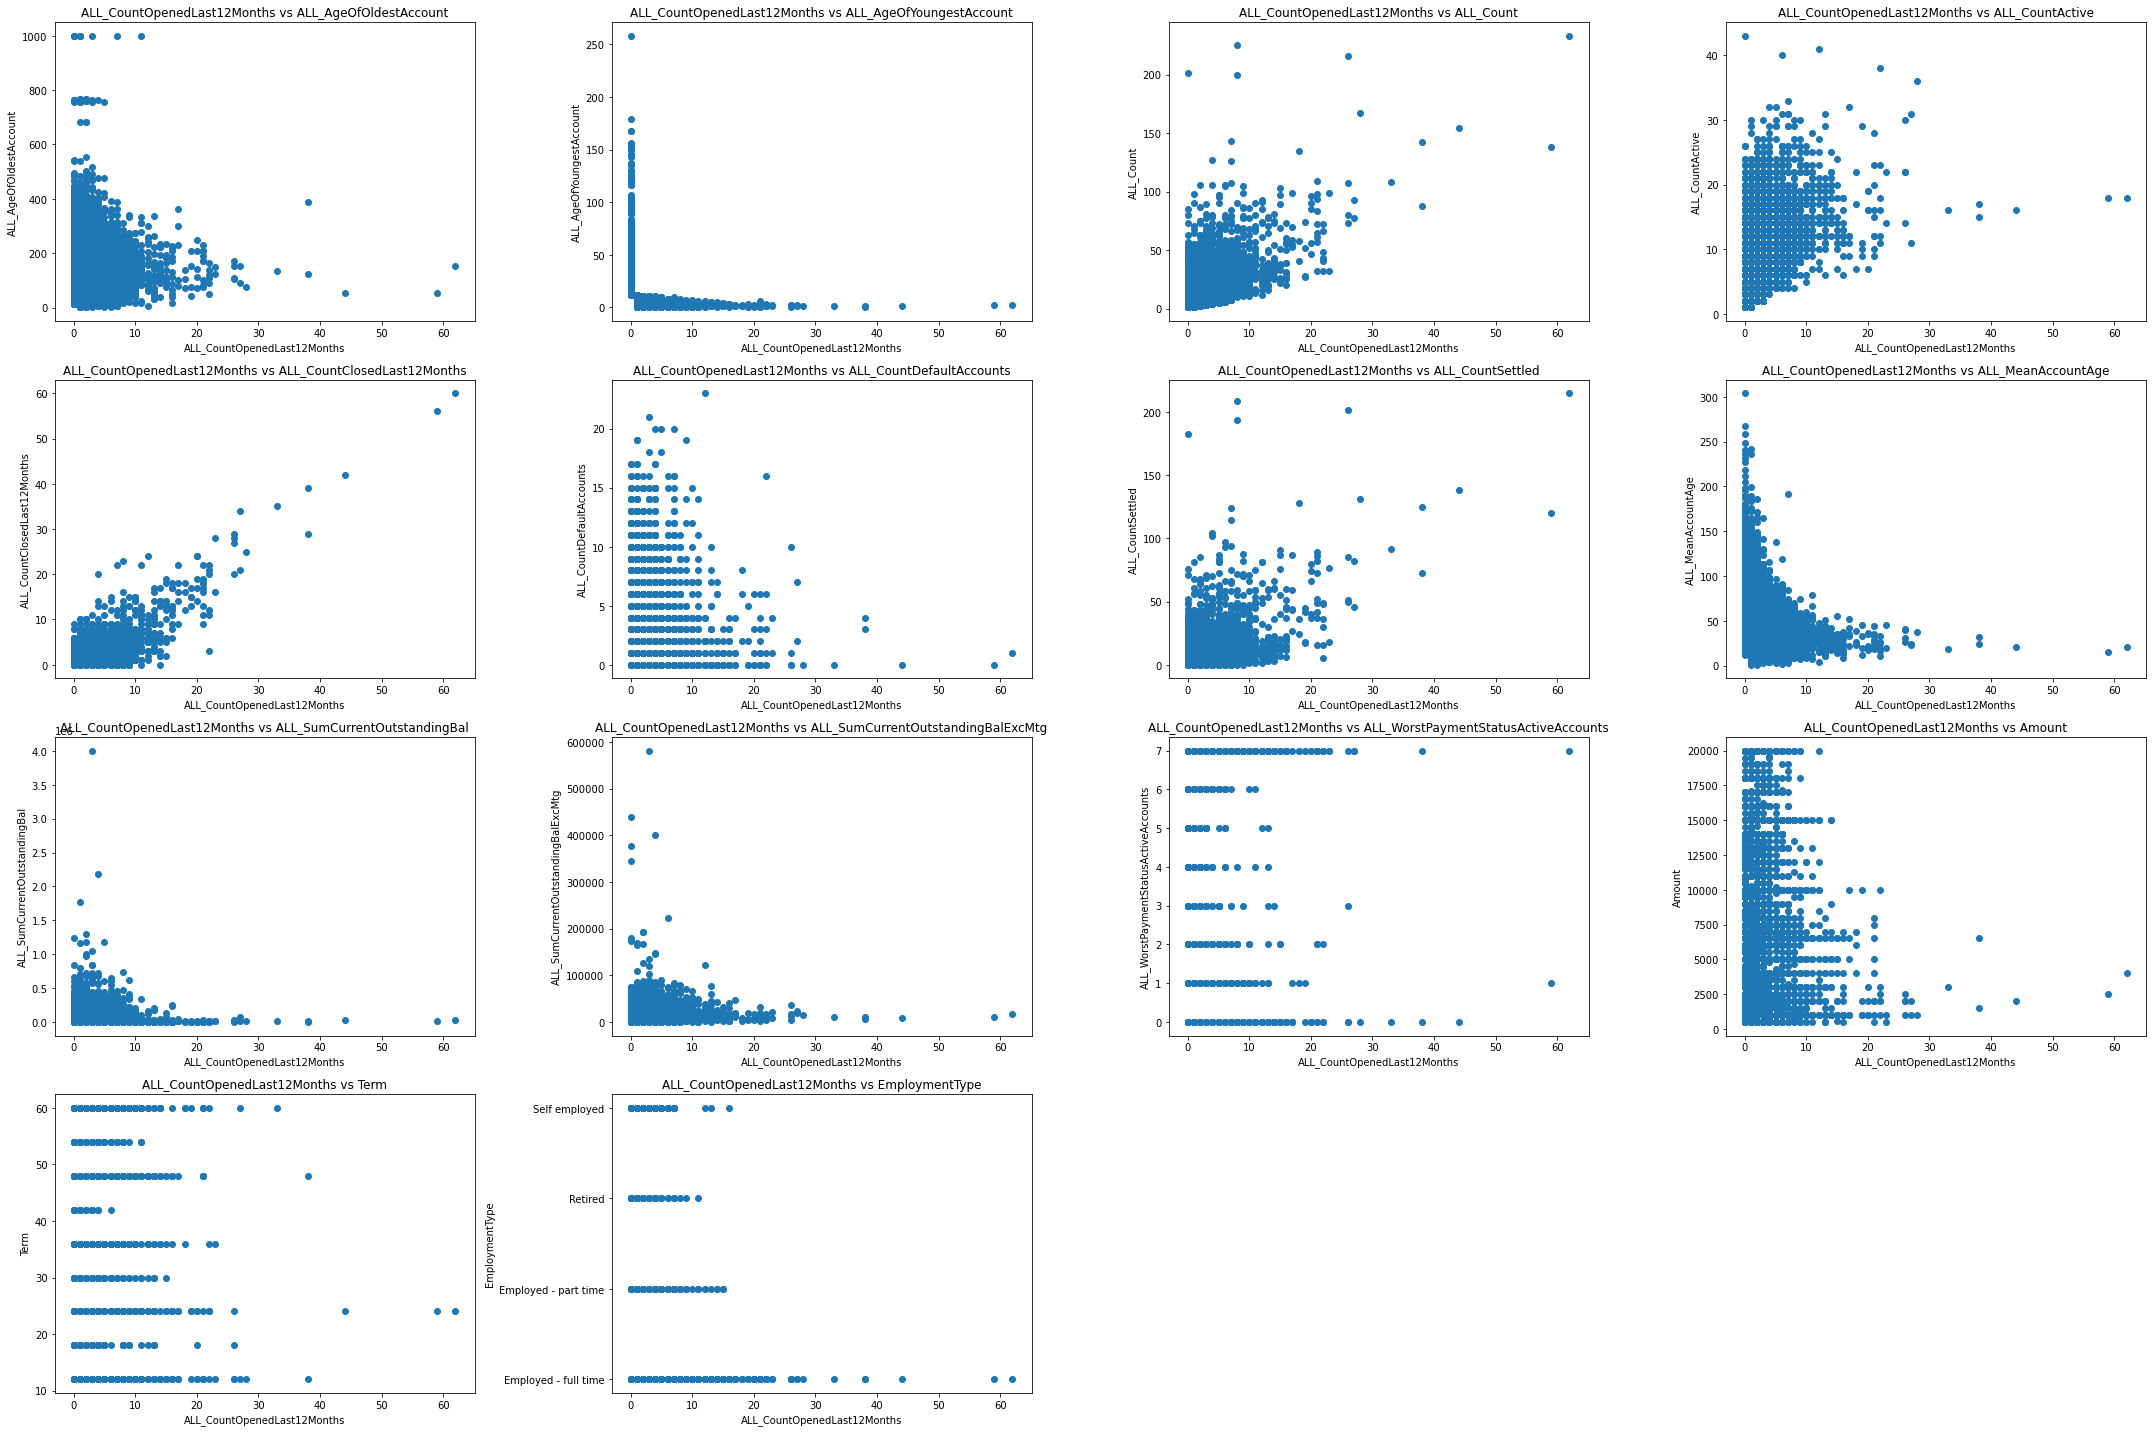

In [131]:
# Select the column 
column_select = 'ALL_CountOpenedLast12Months'

# Get all columns except column_select and column 15
columns_to_plot = df.columns.drop([column_select, df.columns[15]])

# Plot scatter plots of column 0 against the other columns
plt.figure(figsize=(30, 20))  

for i, column in enumerate(columns_to_plot):
    plt.subplot(4, 4, i + 1)  # Create a grid of subplots
    plt.scatter(df[column_select], df[column])
    plt.xlabel(column_select)
    plt.ylabel(column)
    plt.title(f'{column_select} vs {column}')

plt.tight_layout()  
plt.show()

## ALL_CountSettled  

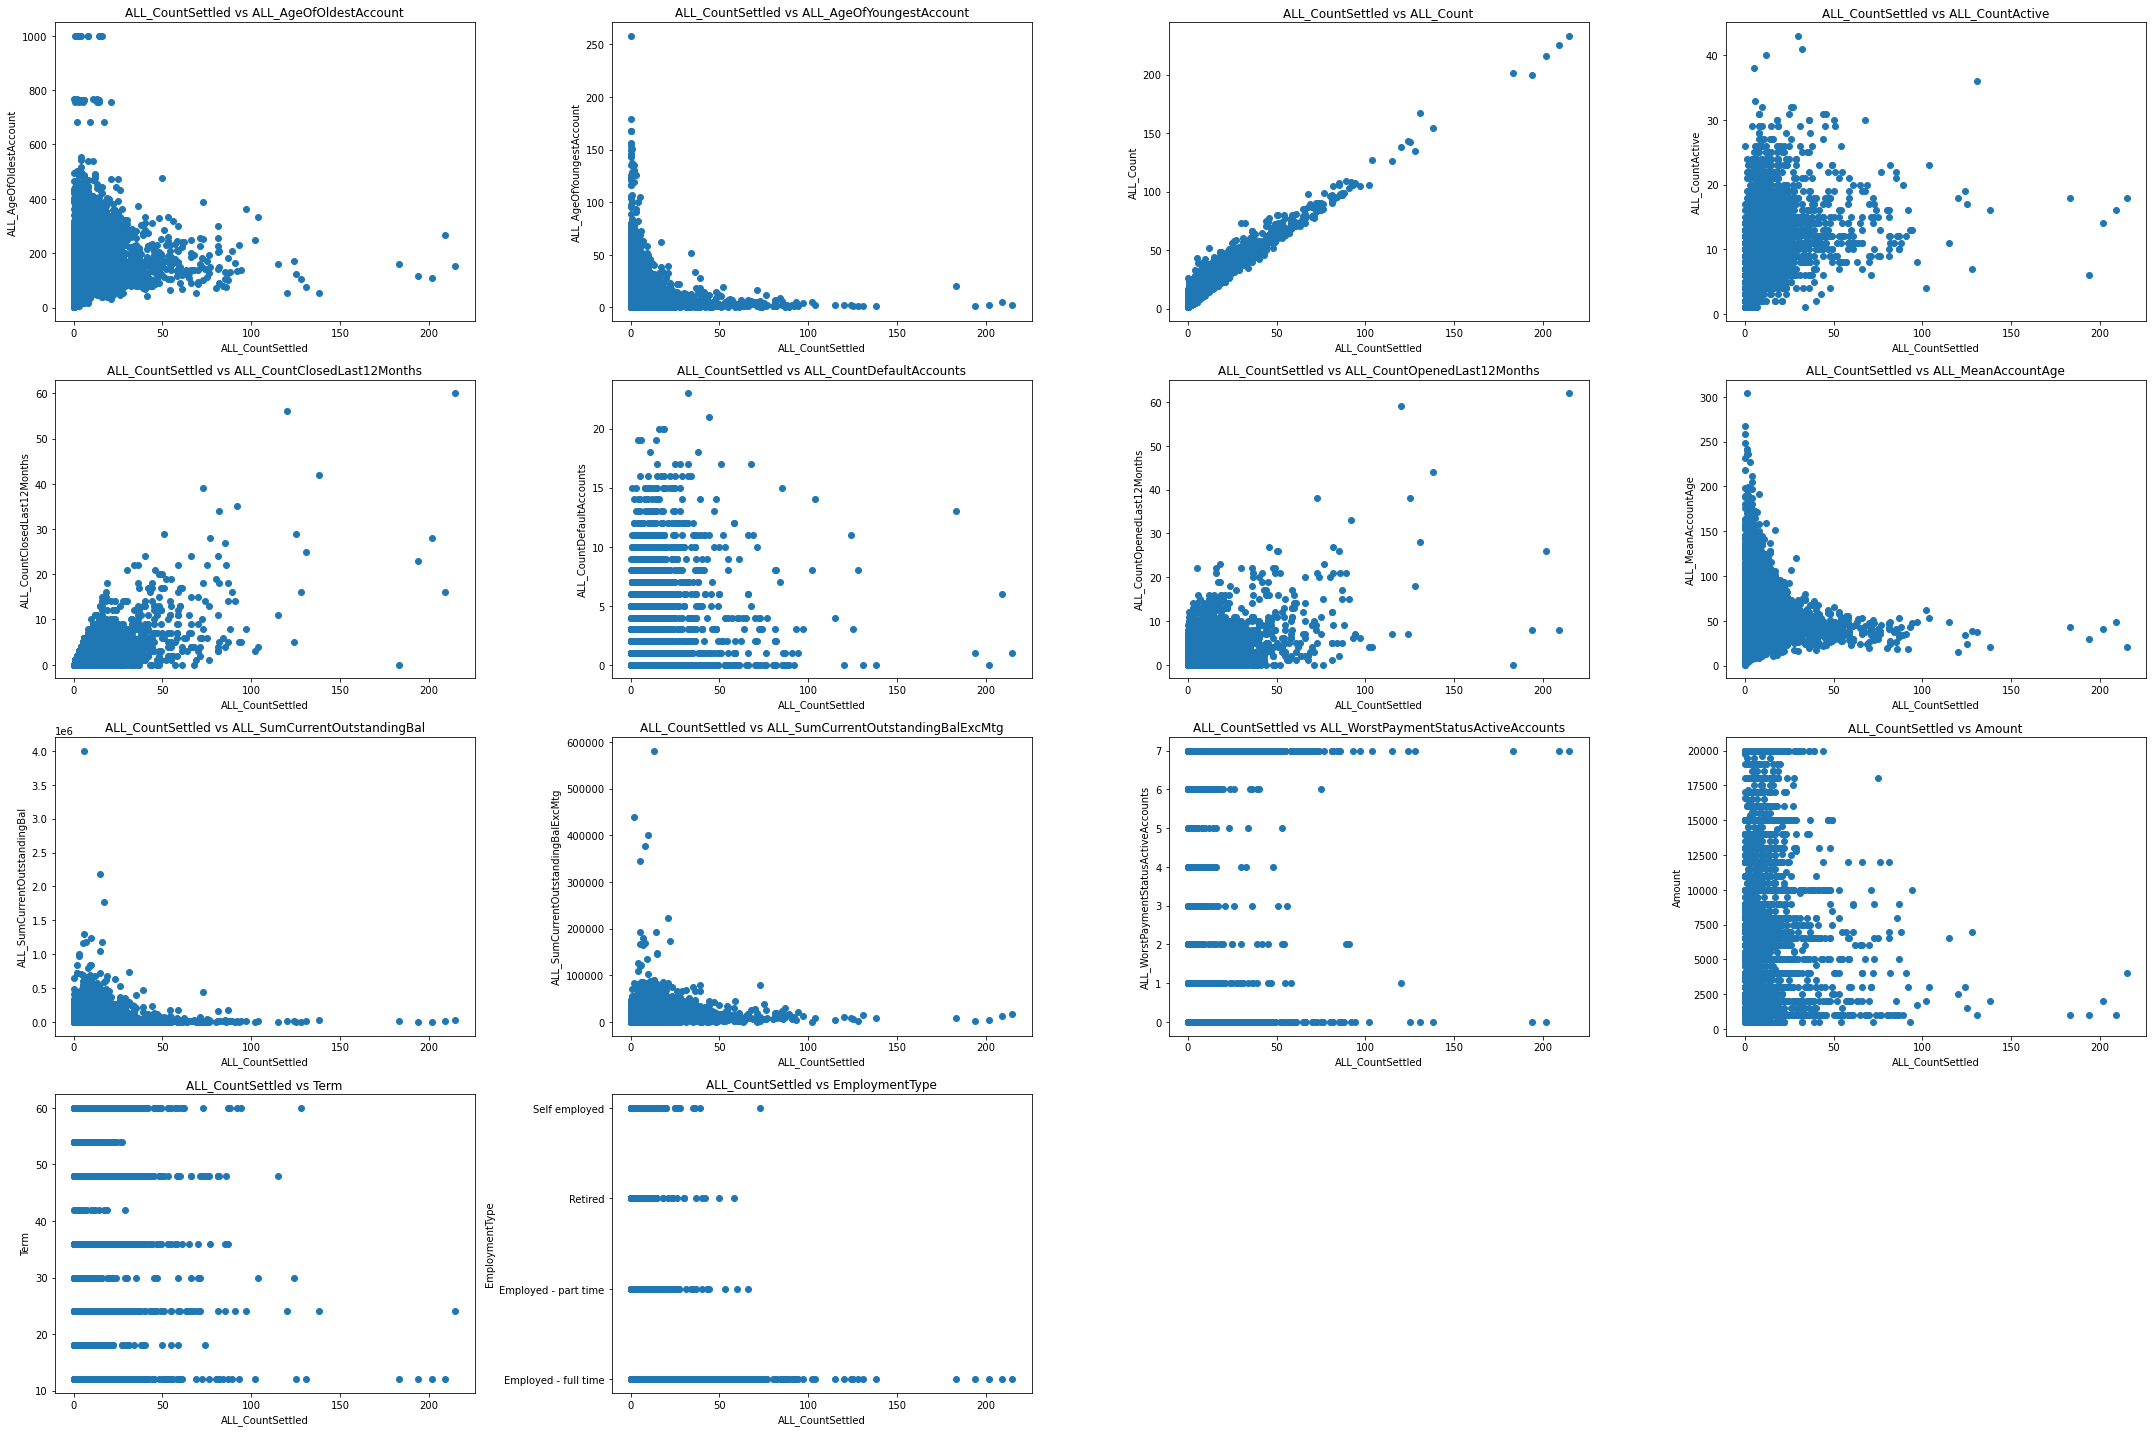

In [133]:
# Select the column 
column_select = 'ALL_CountSettled'

# Get all columns except column_select and column 15
columns_to_plot = df.columns.drop([column_select, df.columns[15]])

# Plot scatter plots of column 0 against the other columns
plt.figure(figsize=(30, 20))  

for i, column in enumerate(columns_to_plot):
    plt.subplot(4, 4, i + 1)  # Create a grid of subplots
    plt.scatter(df[column_select], df[column])
    plt.xlabel(column_select)
    plt.ylabel(column)
    plt.title(f'{column_select} vs {column}')

plt.tight_layout()  
plt.show()

## ALL_MeanAccountAge

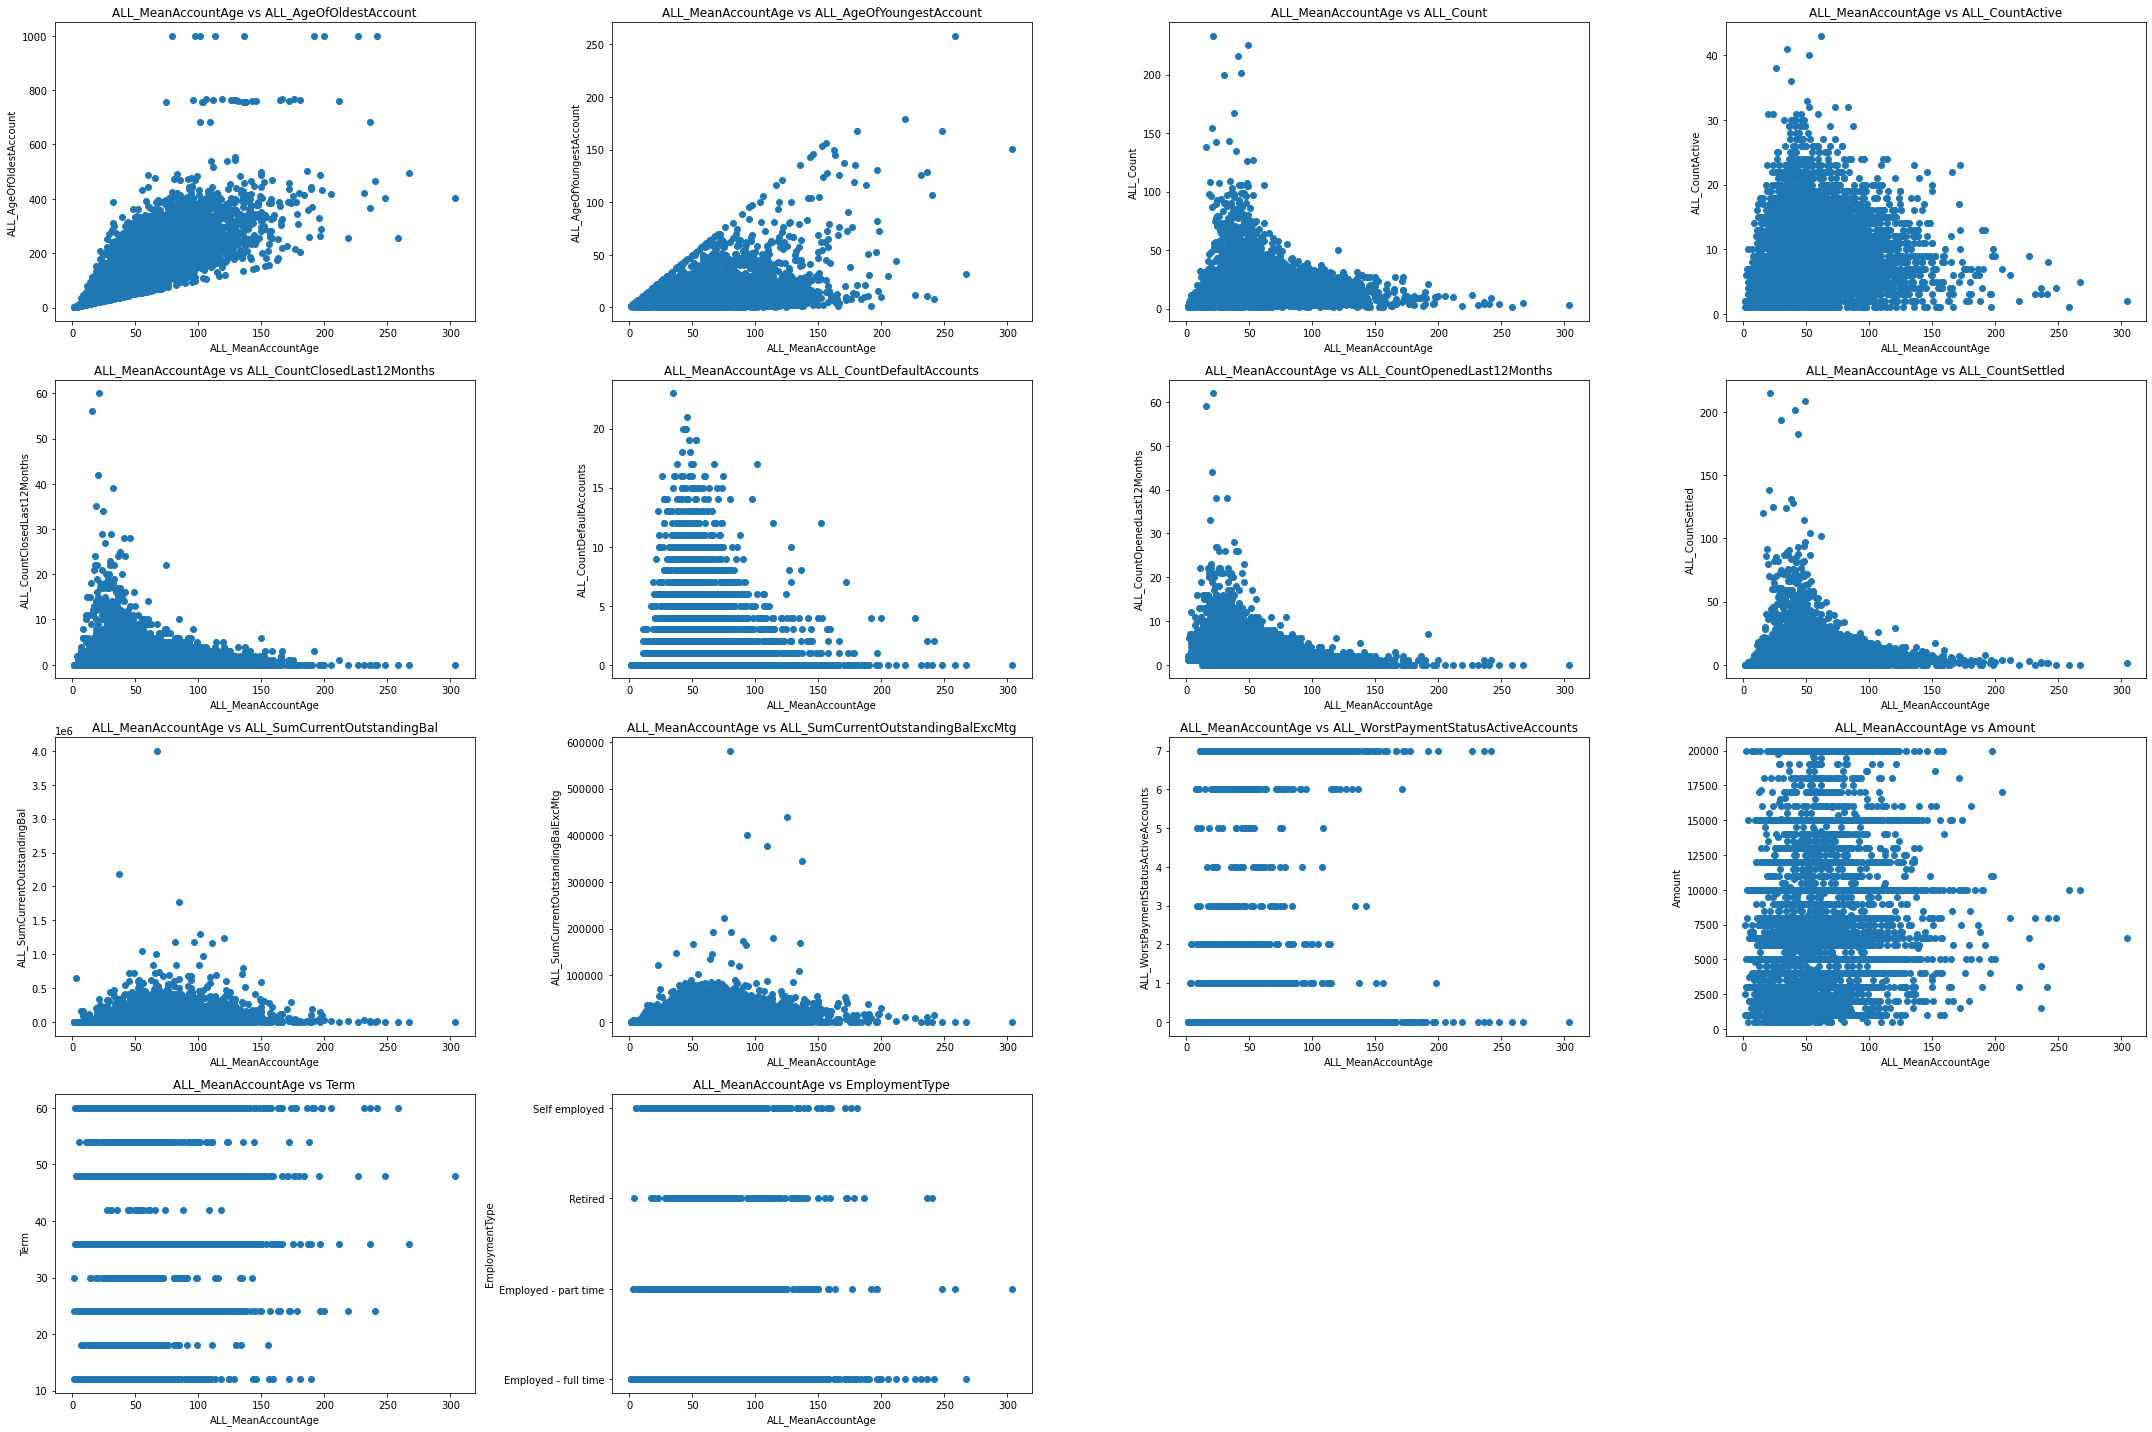

In [134]:
# Select the column 
column_select = 'ALL_MeanAccountAge'

# Get all columns except column_select and column 15
columns_to_plot = df.columns.drop([column_select, df.columns[15]])

# Plot scatter plots of column 0 against the other columns
plt.figure(figsize=(30, 20))  

for i, column in enumerate(columns_to_plot):
    plt.subplot(4, 4, i + 1)  # Create a grid of subplots
    plt.scatter(df[column_select], df[column])
    plt.xlabel(column_select)
    plt.ylabel(column)
    plt.title(f'{column_select} vs {column}')

plt.tight_layout()  
plt.show()

## ALL_SumCurrentOutstandingBal

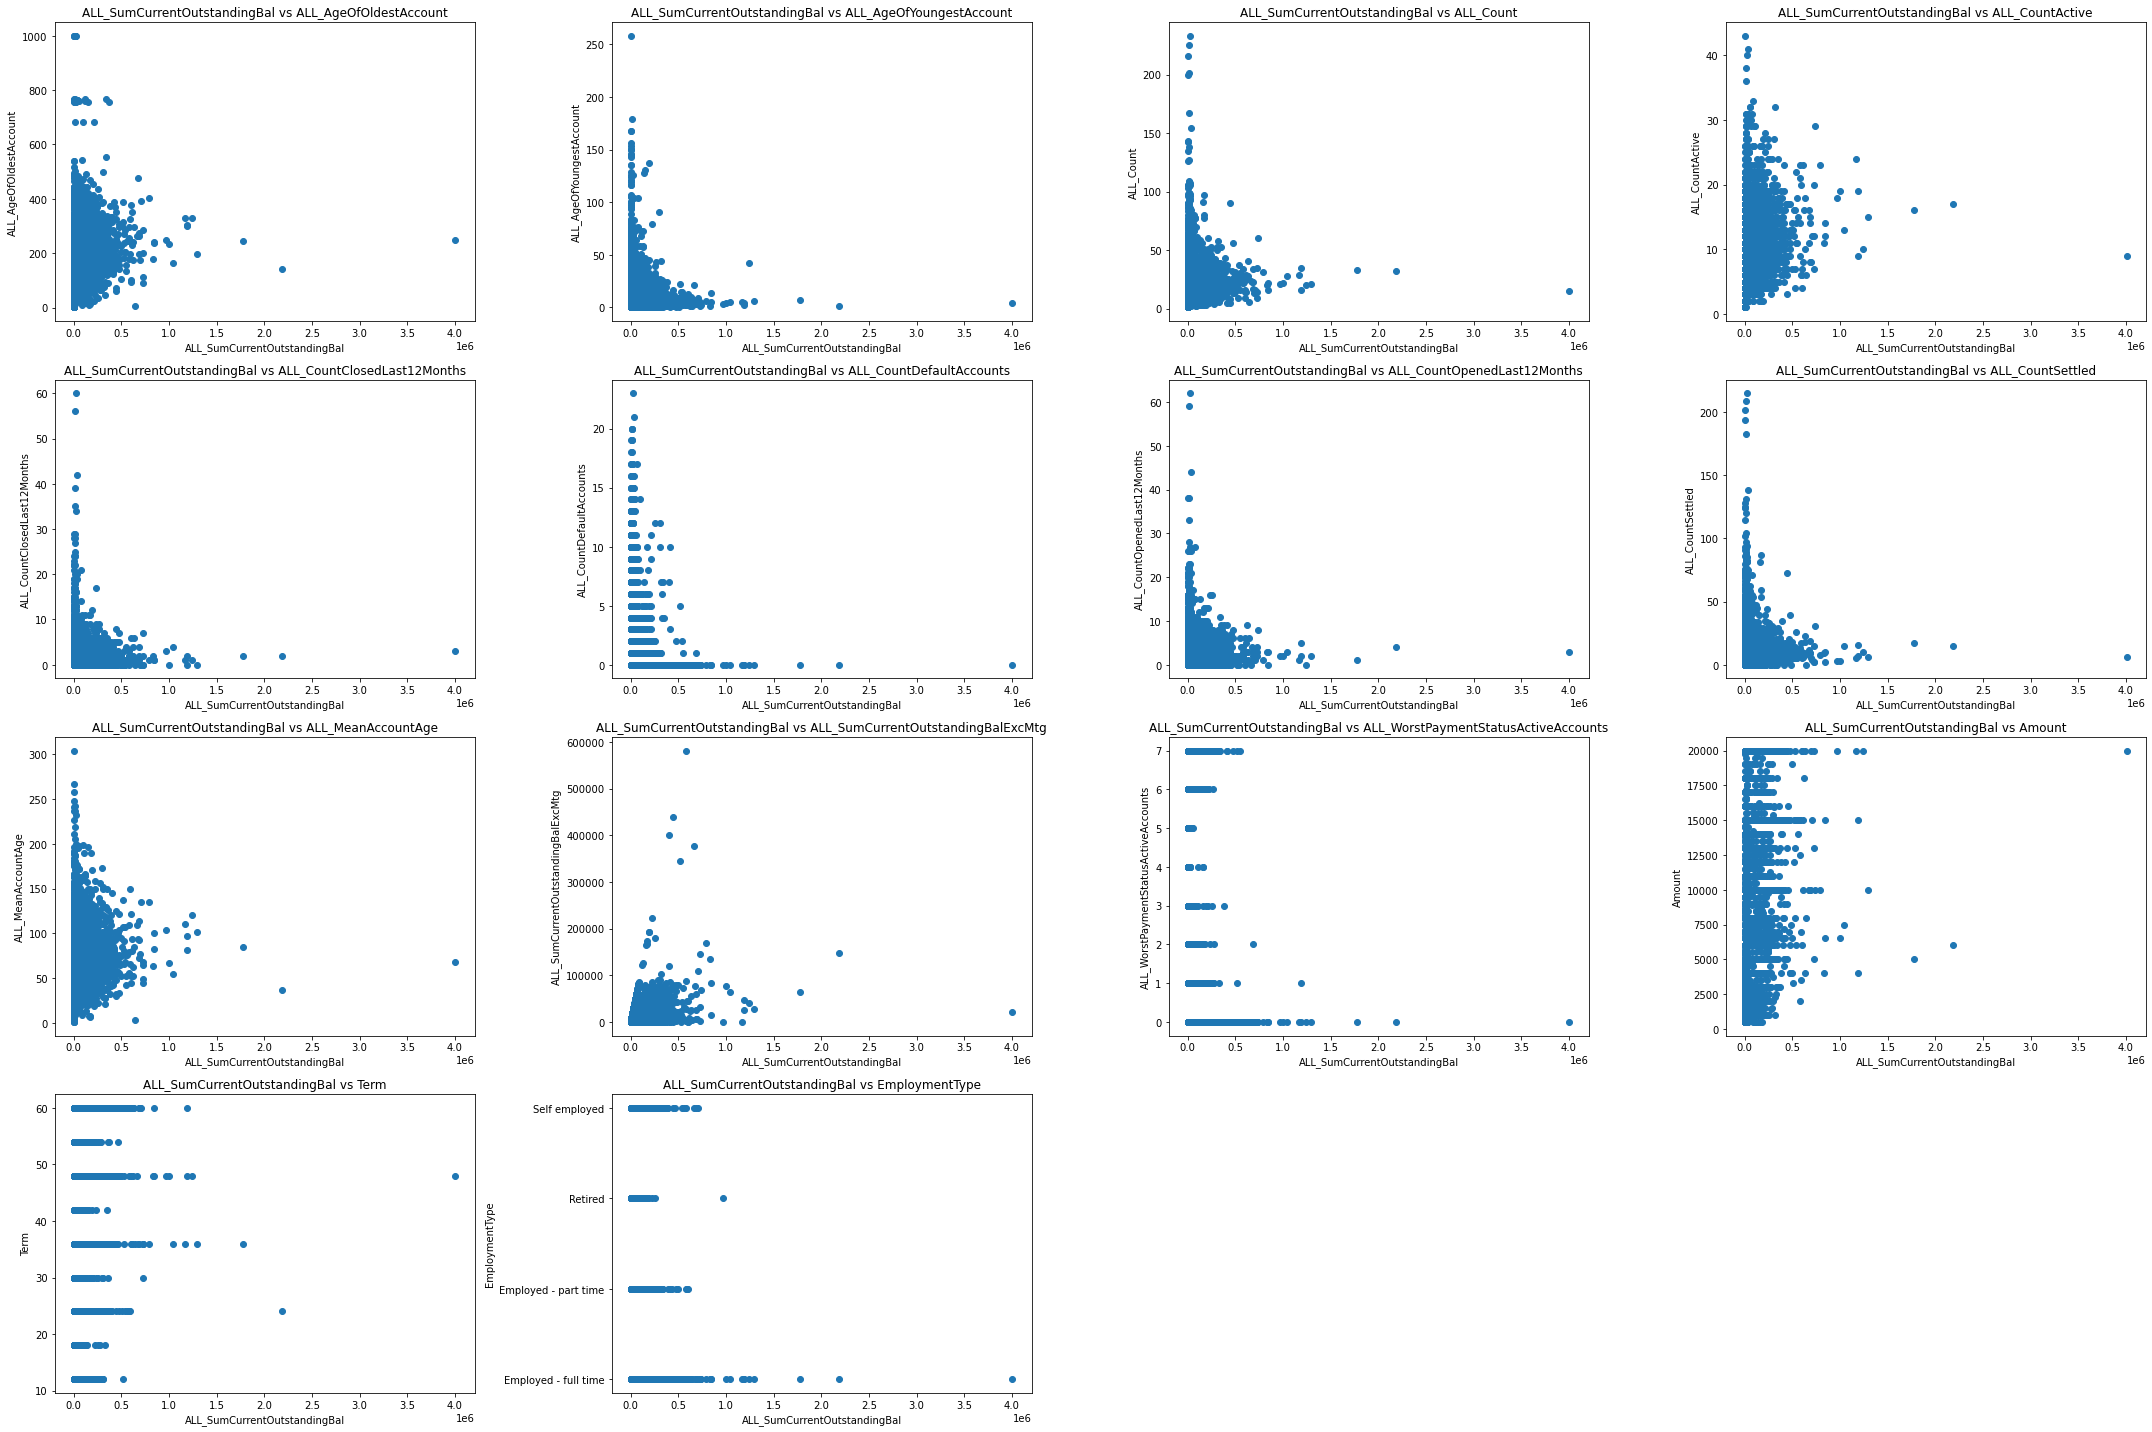

In [135]:
# Select the column 
column_select = 'ALL_SumCurrentOutstandingBal'

# Get all columns except column_select and column 15
columns_to_plot = df.columns.drop([column_select, df.columns[15]])

# Plot scatter plots of column 0 against the other columns
plt.figure(figsize=(30, 20))  

for i, column in enumerate(columns_to_plot):
    plt.subplot(4, 4, i + 1)  # Create a grid of subplots
    plt.scatter(df[column_select], df[column])
    plt.xlabel(column_select)
    plt.ylabel(column)
    plt.title(f'{column_select} vs {column}')

plt.tight_layout()  
plt.show()

## ALL_SumCurrentOutstandingBalExcMtg        

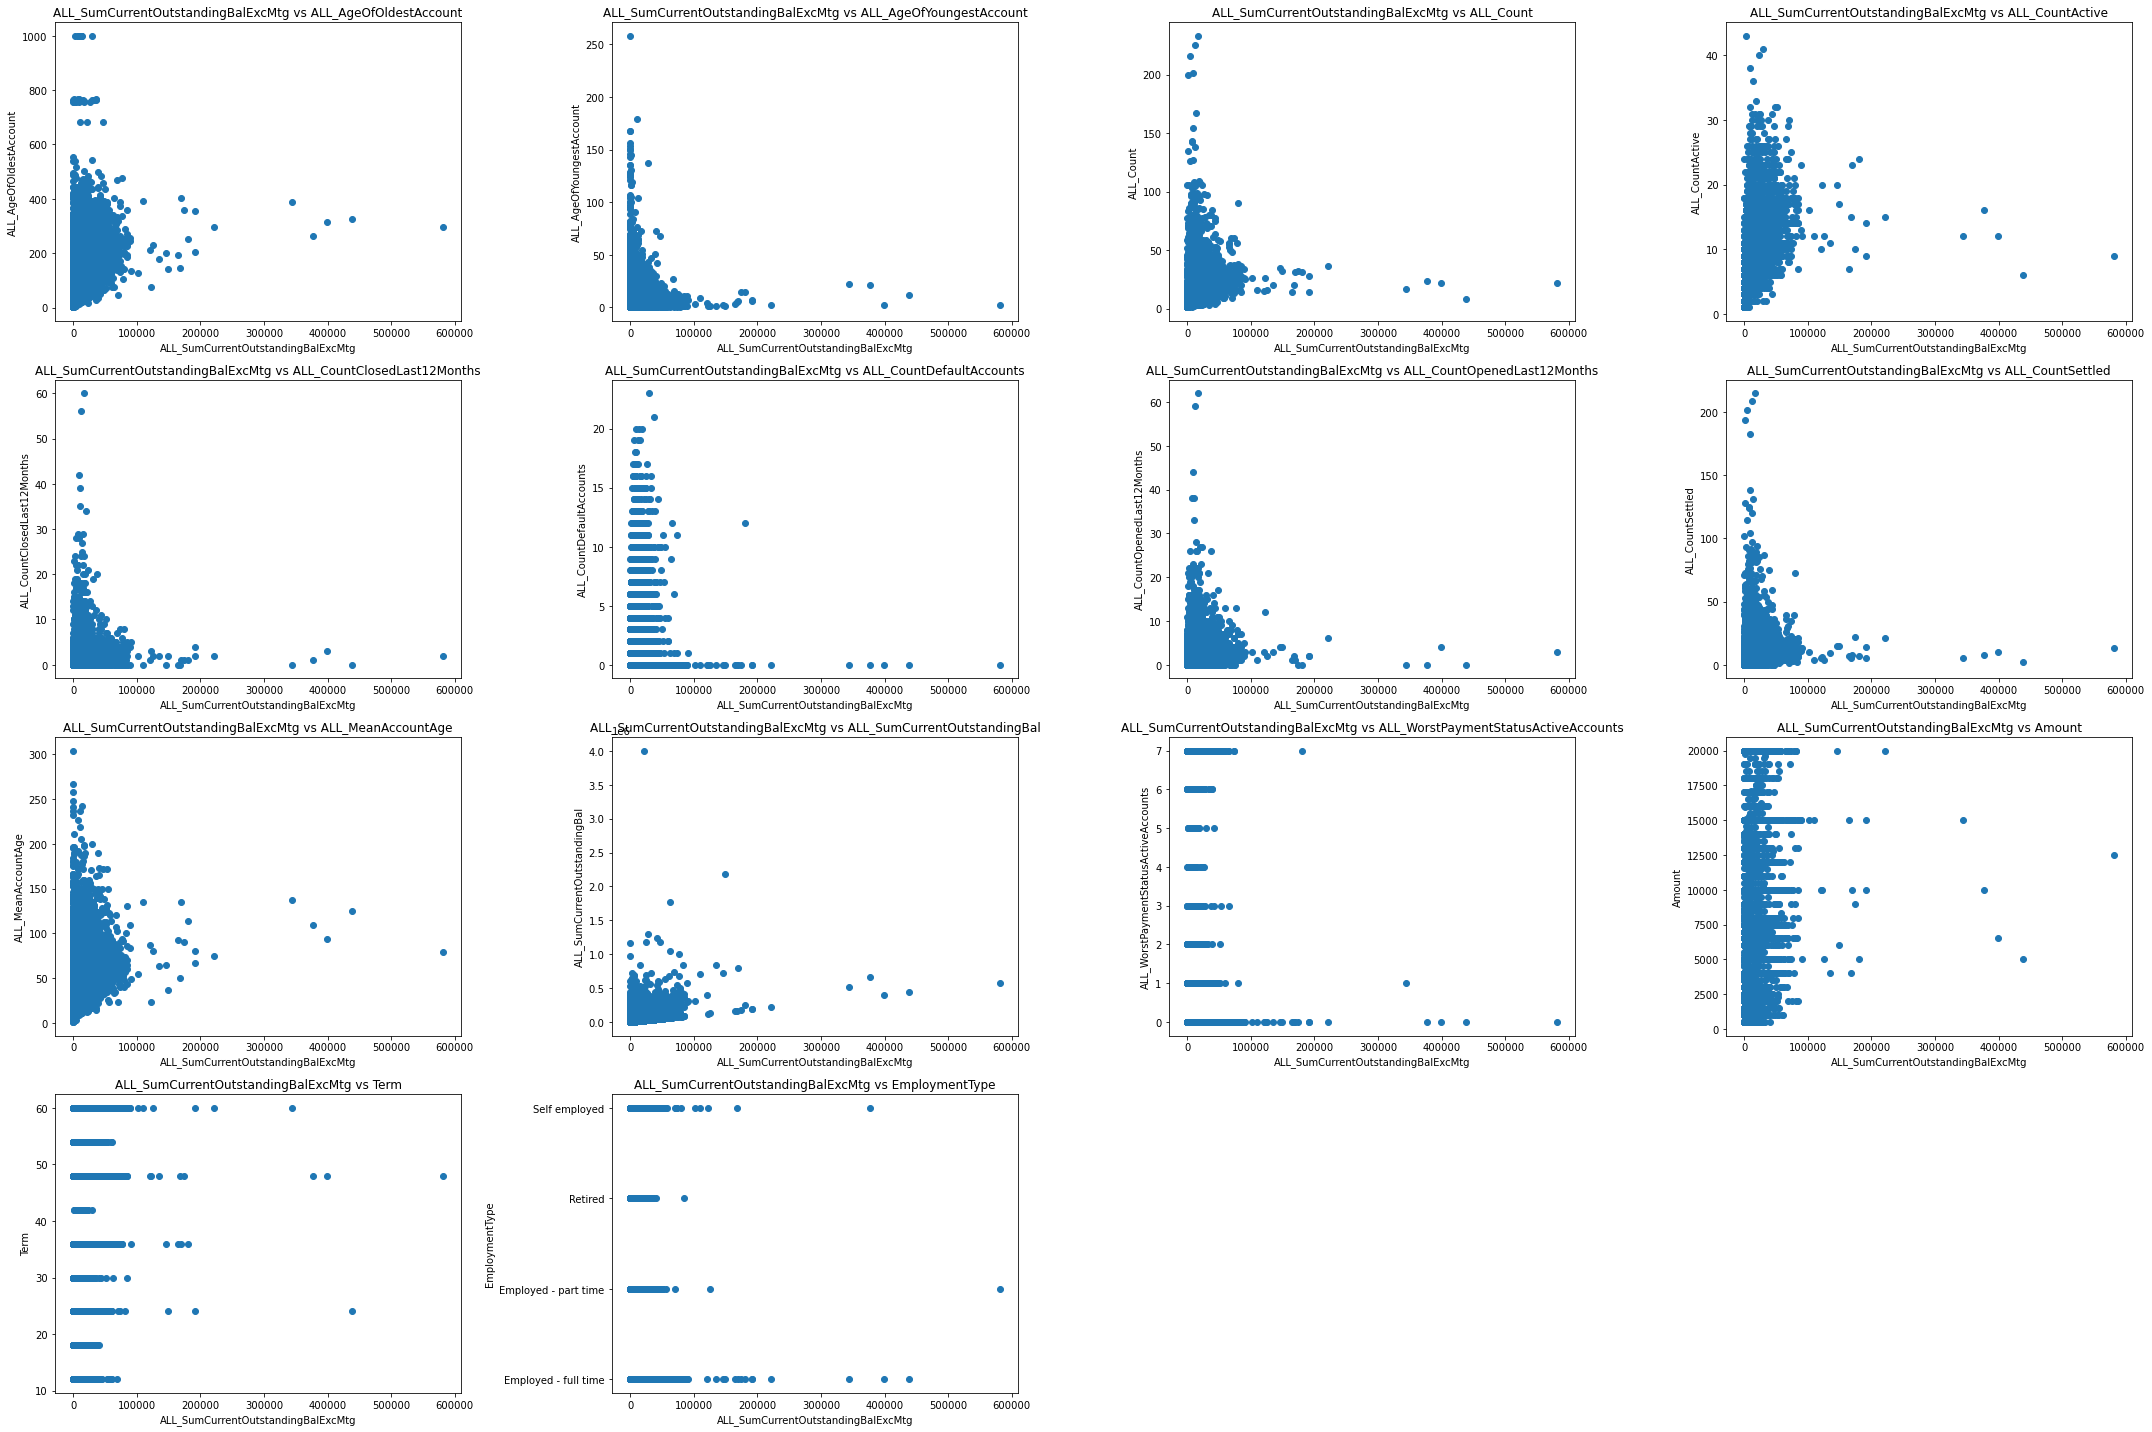

In [137]:
# Select the column 
column_select = 'ALL_SumCurrentOutstandingBalExcMtg'

# Get all columns except column_select and column 15
columns_to_plot = df.columns.drop([column_select, df.columns[15]])

# Plot scatter plots of column 0 against the other columns
plt.figure(figsize=(30, 20))  

for i, column in enumerate(columns_to_plot):
    plt.subplot(4, 4, i + 1)  # Create a grid of subplots
    plt.scatter(df[column_select], df[column])
    plt.xlabel(column_select)
    plt.ylabel(column)
    plt.title(f'{column_select} vs {column}')

plt.tight_layout()  
plt.show()

## ALL_WorstPaymentStatusActiveAccounts 

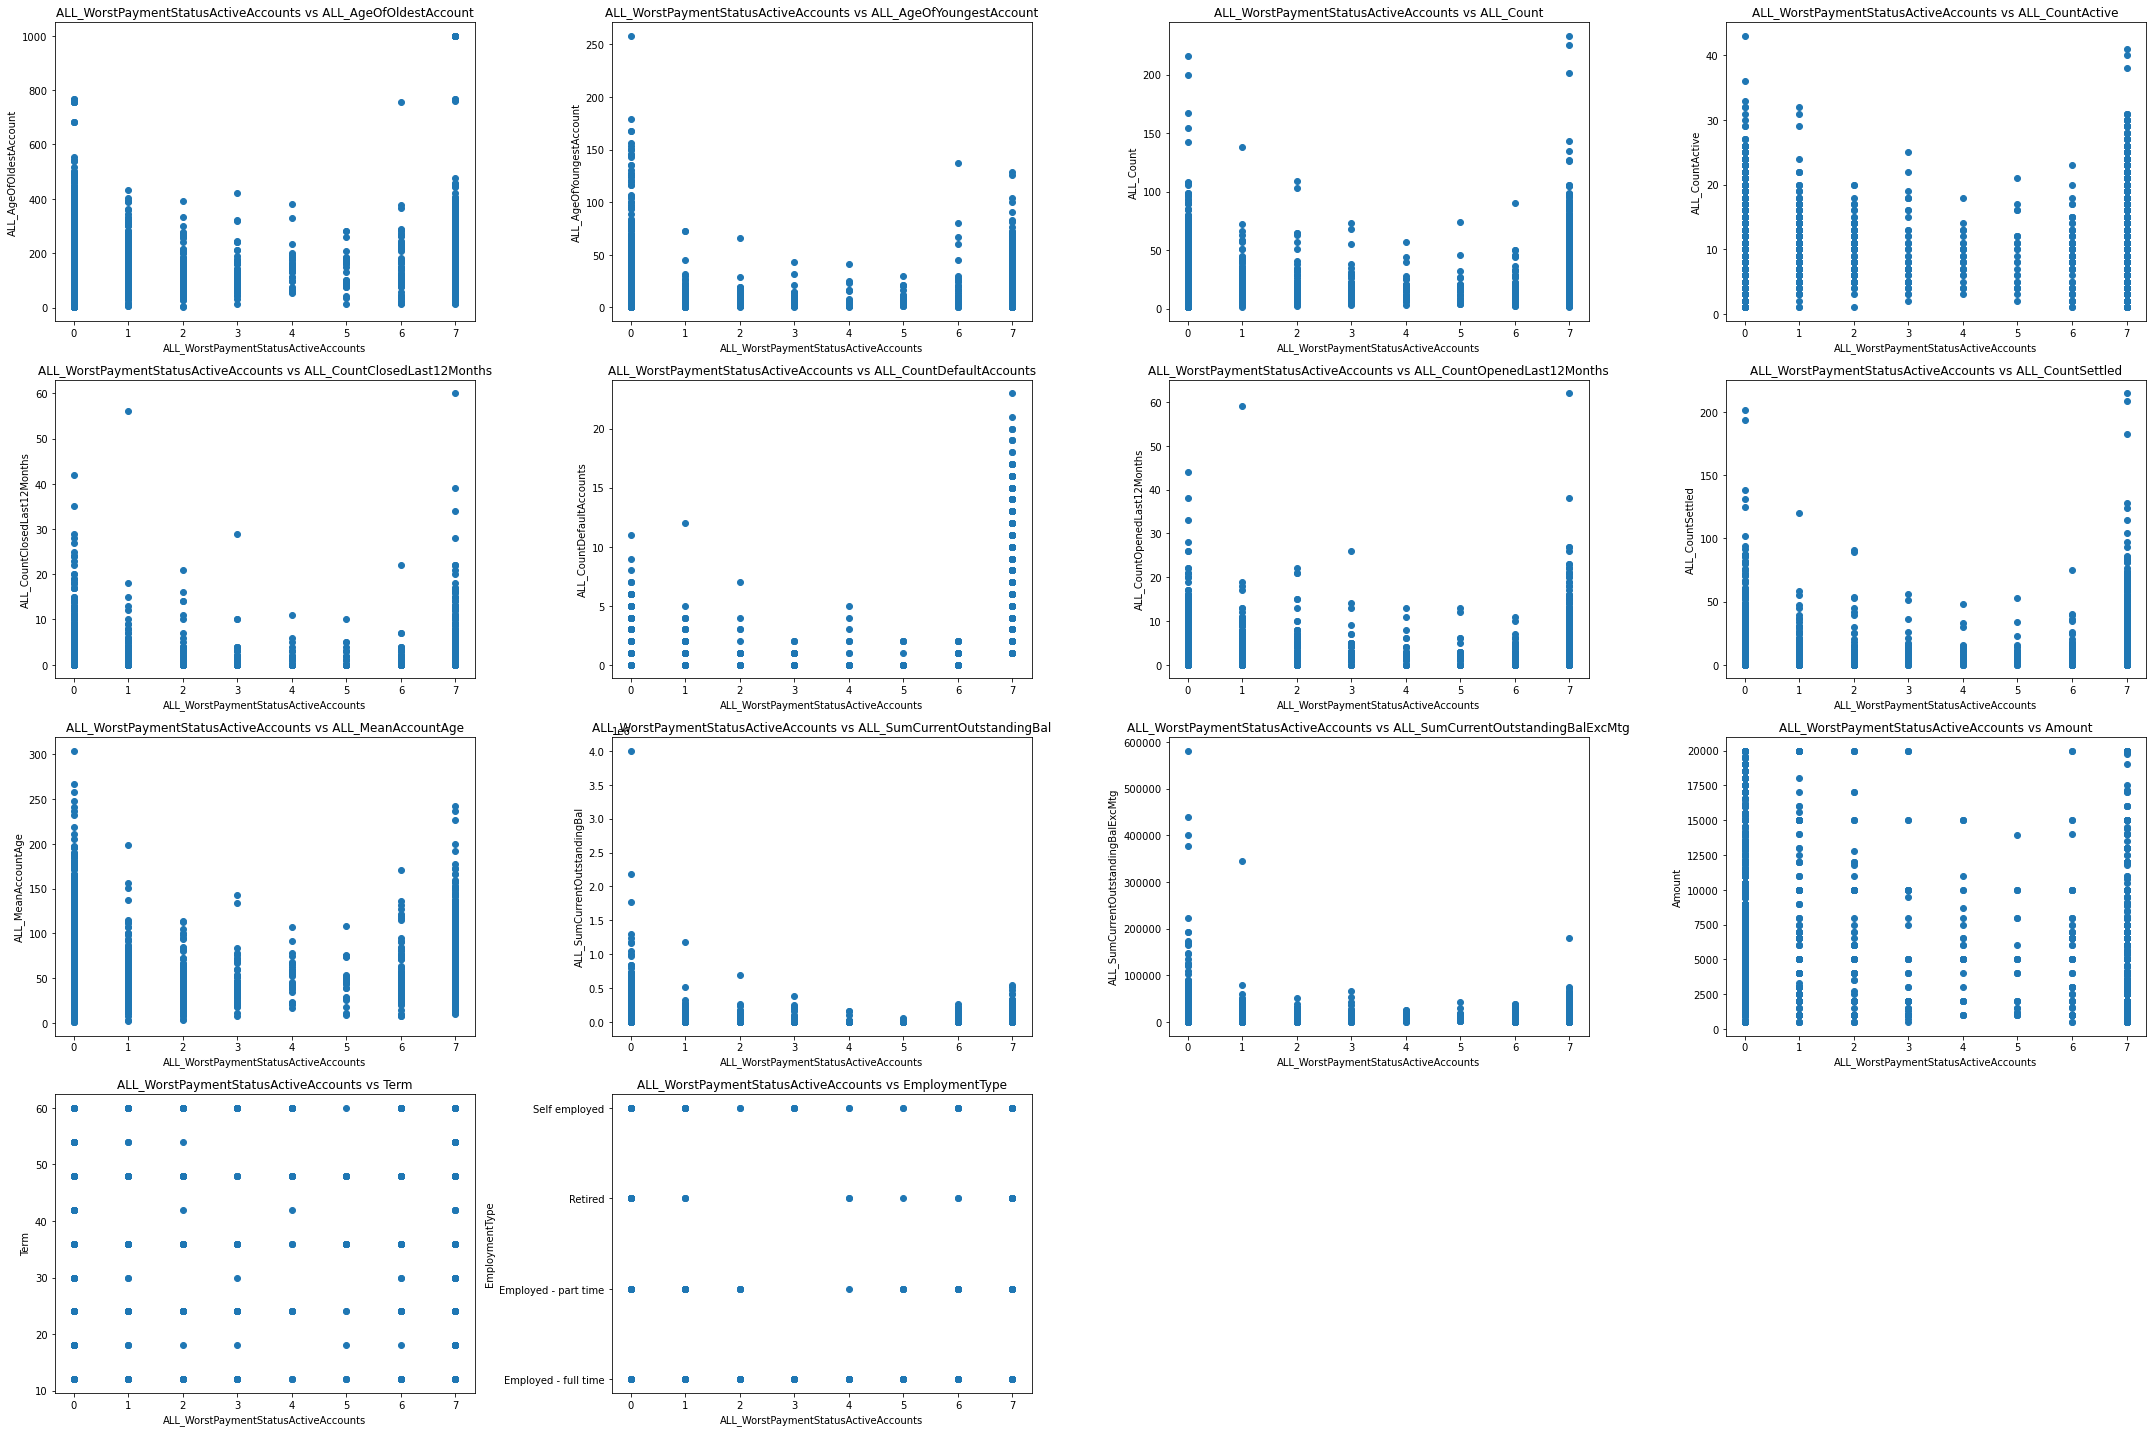

In [138]:
# Select the column 
column_select = 'ALL_WorstPaymentStatusActiveAccounts'

# Get all columns except column_select and column 15
columns_to_plot = df.columns.drop([column_select, df.columns[15]])

# Plot scatter plots of column 0 against the other columns
plt.figure(figsize=(30, 20))  

for i, column in enumerate(columns_to_plot):
    plt.subplot(4, 4, i + 1)  # Create a grid of subplots
    plt.scatter(df[column_select], df[column])
    plt.xlabel(column_select)
    plt.ylabel(column)
    plt.title(f'{column_select} vs {column}')

plt.tight_layout()  
plt.show()

## Amount 

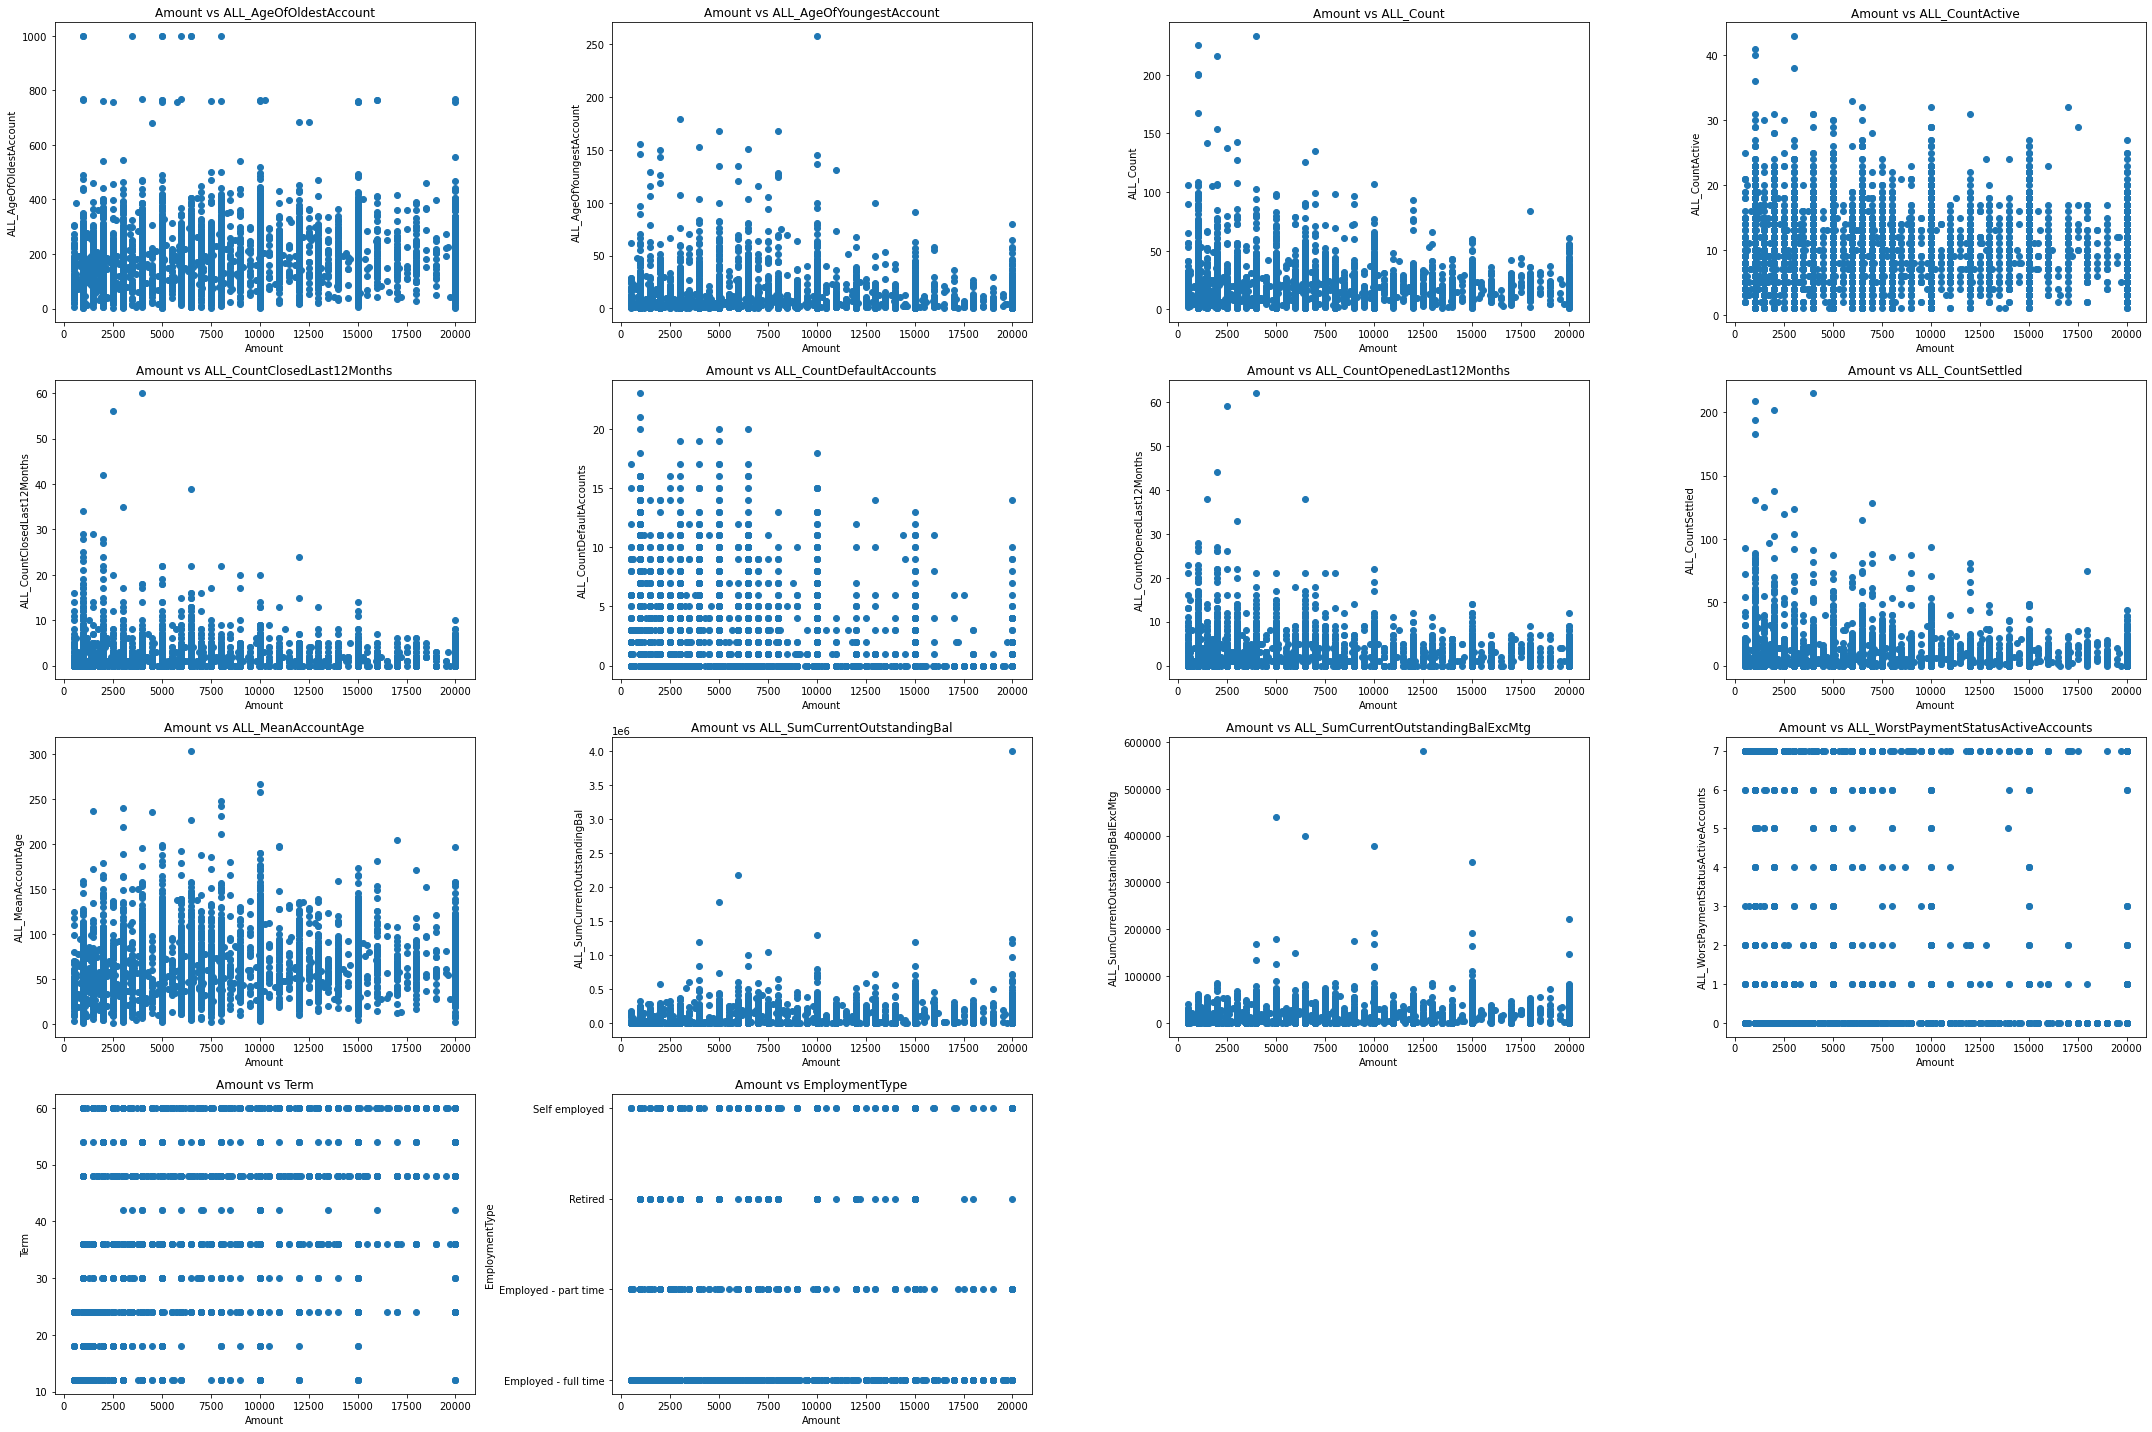

In [139]:
# Select the column 
column_select = 'Amount'

# Get all columns except column_select and column 15
columns_to_plot = df.columns.drop([column_select, df.columns[15]])

# Plot scatter plots of column 0 against the other columns
plt.figure(figsize=(30, 20))  

for i, column in enumerate(columns_to_plot):
    plt.subplot(4, 4, i + 1)  # Create a grid of subplots
    plt.scatter(df[column_select], df[column])
    plt.xlabel(column_select)
    plt.ylabel(column)
    plt.title(f'{column_select} vs {column}')

plt.tight_layout()  
plt.show()

## Term 

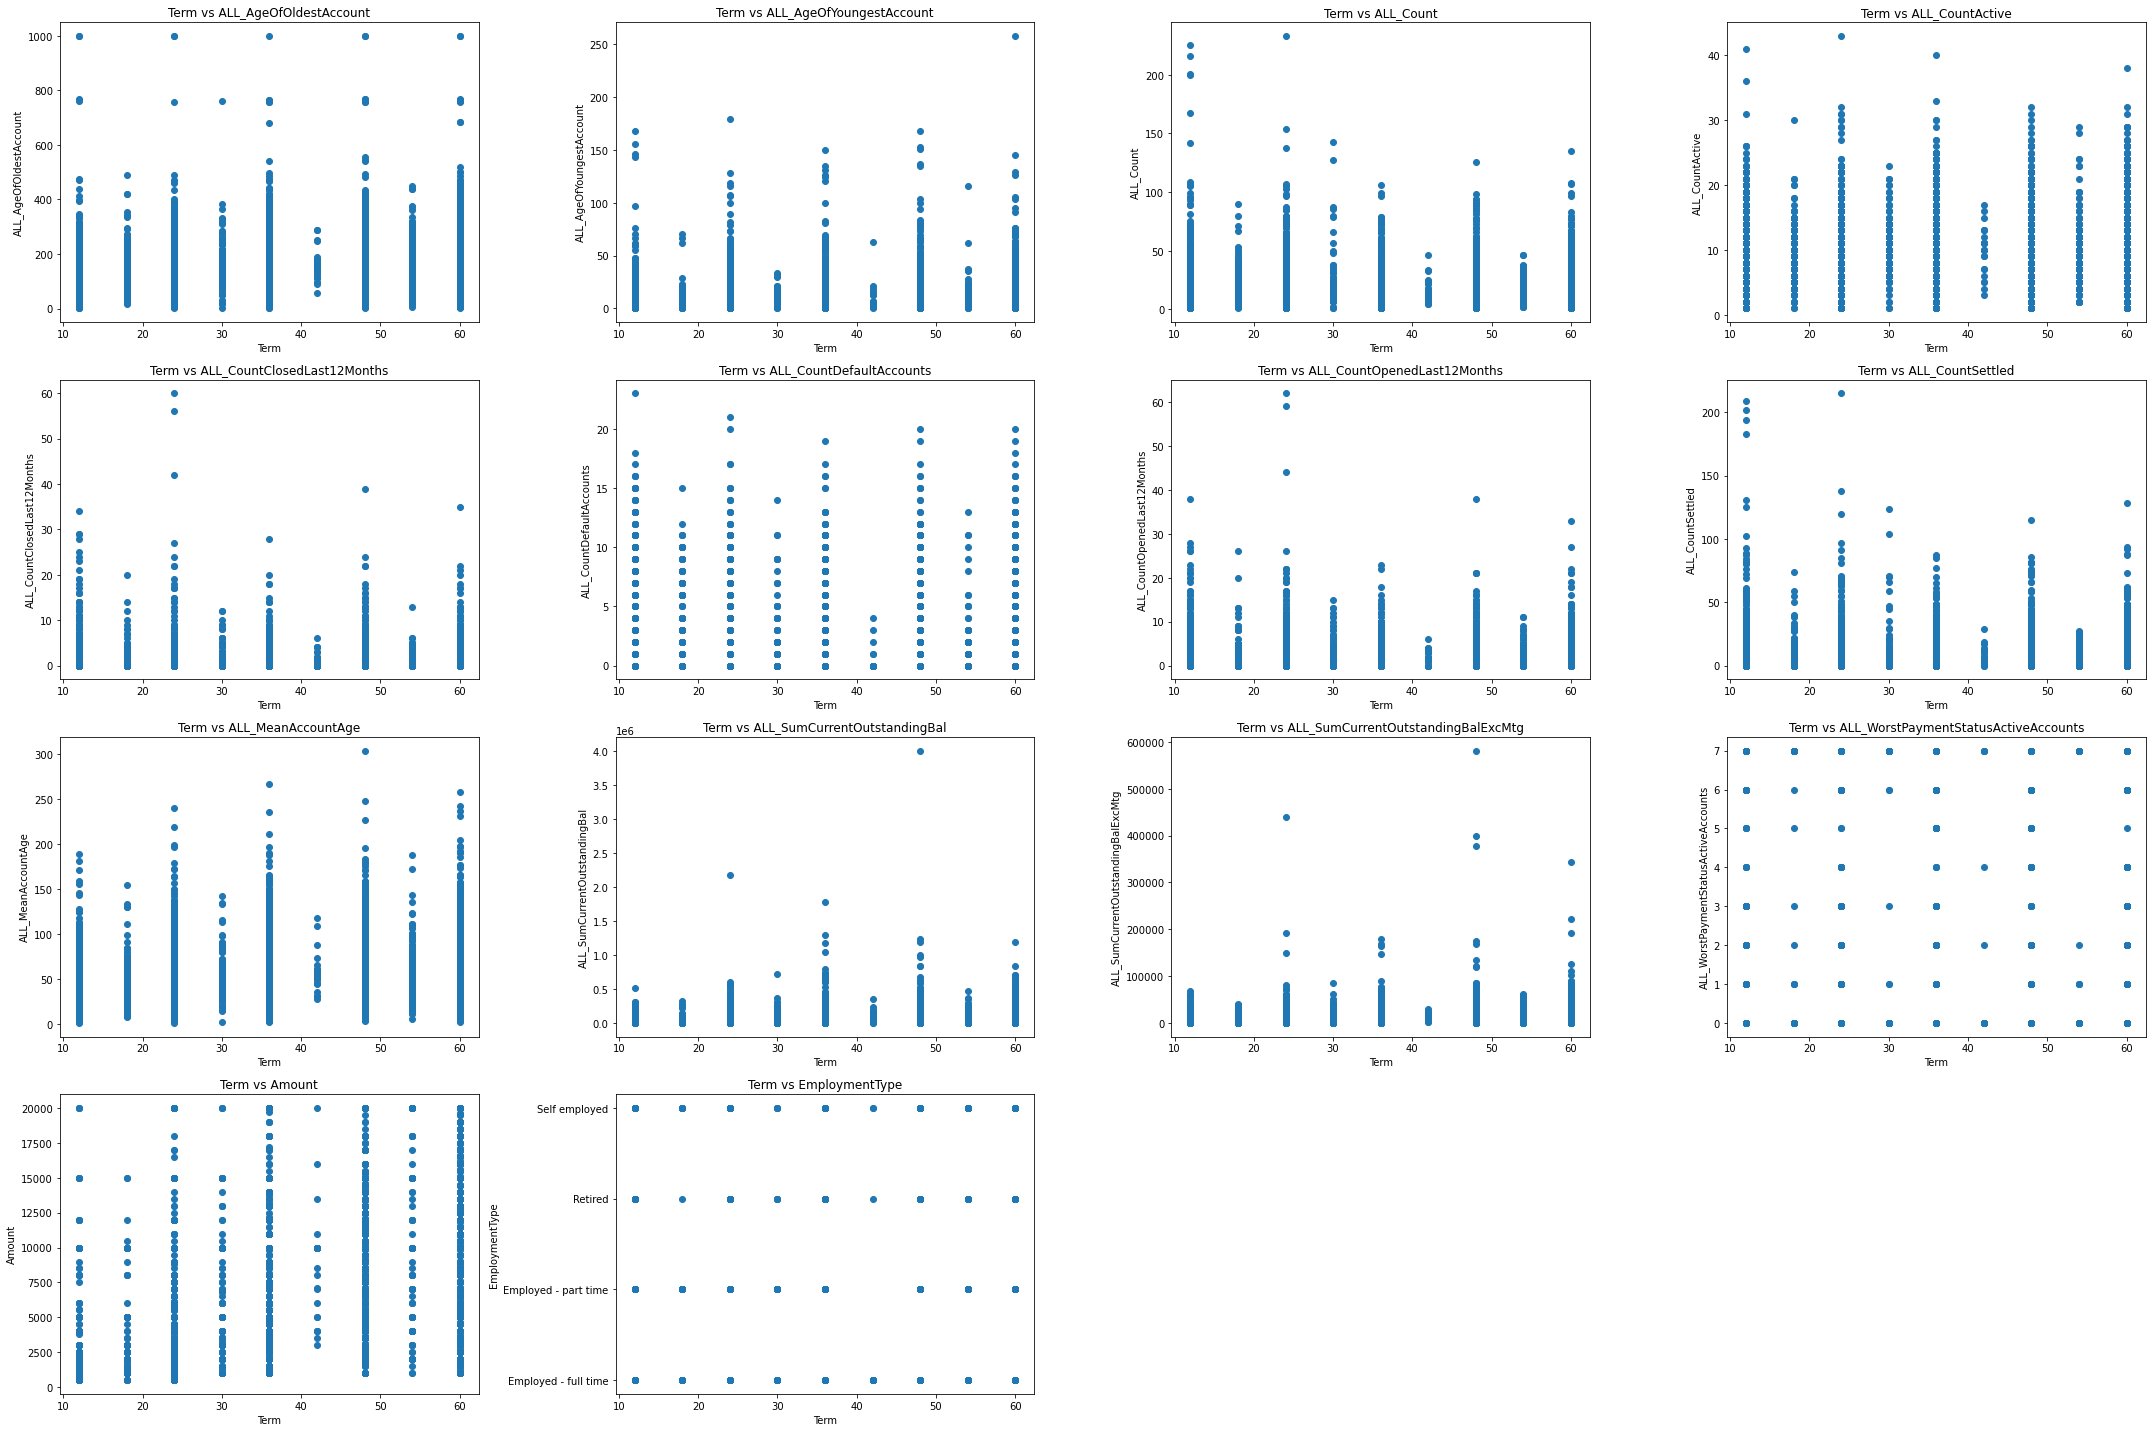

In [272]:
# Select the column 
column_select = 'Term'

# Get all columns except column_select and column 15
columns_to_plot = df.columns.drop([column_select, df.columns[15]])

# Plot scatter plots of column 0 against the other columns
plt.figure(figsize=(30, 20))  

for i, column in enumerate(columns_to_plot):
    plt.subplot(4, 4, i + 1)  # Create a grid of subplots
    plt.scatter(df[column_select], df[column])
    plt.xlabel(column_select)
    plt.ylabel(column)
    plt.title(f'{column_select} vs {column}')

plt.tight_layout()  
plt.show()

# Convert Categorical Feature to Numerical

In [150]:
from sklearn.preprocessing import OneHotEncoder

# Define the categorical columns
categorical_columns = ["EmploymentType"]

# Use OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the categorical columns
encoded_features = encoder.fit_transform(df[categorical_columns])

# Create a DataFrame for the one-hot encoded features
encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns, index=df.index)

# Drop the original categorical columns and concatenate the encoded features
df = df.drop(columns=categorical_columns)
df_encoded = pd.concat([df, encoded_df], axis=1)

print("One-hot encoding applied successfully!")
print(df_encoded.head())

One-hot encoding applied successfully!
   ALL_AgeOfOldestAccount  ALL_AgeOfYoungestAccount  ALL_Count  \
0                   227.0                      12.0         14   
1                    49.0                      10.0          7   
2                   134.0                       0.0         12   
3                   227.0                       2.0         39   
4                   132.0                       2.0         99   

   ALL_CountActive  ALL_CountClosedLast12Months  ALL_CountDefaultAccounts  \
0             11.0                          0.0                       3.0   
1              6.0                          1.0                       3.0   
2             11.0                          0.0                       3.0   
3             12.0                          0.0                       2.0   
4             11.0                          8.0                       0.0   

   ALL_CountOpenedLast12Months  ALL_CountSettled  ALL_MeanAccountAge  \
0                          0.

In [151]:
df_encoded

ALL_AgeOfOldestAccount  ALL_AgeOfYoungestAccount  ALL_Count  \
0                      227.0                      12.0         14   
1                       49.0                      10.0          7   
2                      134.0                       0.0         12   
3                      227.0                       2.0         39   
4                      132.0                       2.0         99   
...                      ...                       ...        ...   
8842                   399.0                      13.0         23   
8843                   217.0                      23.0          5   
8844                     3.0                       1.0          2   
8845                   178.0                      15.0         23   
8846                    81.0                       3.0         12   

      ALL_CountActive  ALL_CountClosedLast12Months  ALL_CountDefaultAccounts  \
0                11.0                          0.0                       3.0   
1                 6.0                          1.0                       3.0   
2                11.0                          0.0                       3.0   
3                12.0                          0.0                       2.0   
4                11.0                          8.0                       0.0   
...               ...                          ...                       ...   
8842             16.0                          0.0                       0.0   
8843              4.0                          0.0                       0.0   
8844              2.0                          0.0                       0.0   
8845             17.0                          0.0                       1.0   
8846             11.0                          1.0                       0.0   

      ALL_CountOpenedLast12Months  ALL_CountSettled  ALL_MeanAccountAge  \
0                             0.0               3.0               71.36   
1                             1.0               1.0               29.33   
2                             5.0               1.0               32.33   
3                             2.0              27.0               41.56   
4                             9.0              88.0               43.34   
...                           ...               ...                 ...   
8842                          0.0               7.0              118.09   
8843                          0.0               1.0               85.40   
8844                          2.0               0.0                2.00   
8845                          0.0               6.0               66.91   
8846                          5.0               1.0               20.50   

      ALL_SumCurrentOutstandingBal  ALL_SumCurrentOutstandingBalExcMtg  \
0                           9292.0                              9292.0   
1                           4592.0                              4592.0   
2                           2737.0                              2737.0   
3                           9229.0                              9229.0   
4                          15443.0                             15443.0   
...                            ...                                 ...   
8842                      187302.0                             23018.0   
8843                         264.0                               264.0   
8844                           0.0                                 0.0   
8845                       10071.0                             10071.0   
8846                       18862.0                             18862.0   

      ALL_WorstPaymentStatusActiveAccounts  Amount  Term  Success  \
0                                      7.0    7000    36        0   
1                                      7.0    1000    60        0   
2                                      7.0    2000    24        0   
3                                      7.0    4000    48        0   
4                                      0.0    7000    60        0   
...         

In [155]:
# Extract the 'Success' column
success_column = df_encoded.pop('Success')

# Append the 'Success' column to the most right
df_encoded['Success'] = success_column

# Display the updated DataFrame
df_encoded.head()

ALL_AgeOfOldestAccount  ALL_AgeOfYoungestAccount  ALL_Count  \
0                   227.0                      12.0         14   
1                    49.0                      10.0          7   
2                   134.0                       0.0         12   
3                   227.0                       2.0         39   
4                   132.0                       2.0         99   

   ALL_CountActive  ALL_CountClosedLast12Months  ALL_CountDefaultAccounts  \
0             11.0                          0.0                       3.0   
1              6.0                          1.0                       3.0   
2             11.0                          0.0                       3.0   
3             12.0                          0.0                       2.0   
4             11.0                          8.0                       0.0   

   ALL_CountOpenedLast12Months  ALL_CountSettled  ALL_MeanAccountAge  \
0                          0.0               3.0               71.36   
1                          1.0               1.0               29.33   
2                          5.0               1.0               32.33   
3                          2.0              27.0               41.56   
4                          9.0              88.0               43.34   

   ALL_SumCurrentOutstandingBal  ALL_SumCurrentOutstandingBalExcMtg  \
0                        9292.0                              9292.0   
1                        4592.0                              4592.0   
2                        2737.0                              2737.0   
3                        9229.0                              9229.0   
4                       15443.0                             15443.0   

   ALL_WorstPaymentStatusActiveAccounts  Amount  Term  \
0                                   7.0    7000    36   
1                                   7.0    1000    60   
2                                   7.0    2000    24   
3                                   7.0    4000    48   
4                                   0.0    7000    60   

   EmploymentType_Employed - full time  EmploymentType_Employed - part time  \
0                                  1.0                                  0.0   
1                                  1.0                                  0.0   
2                                  0.0                                  1.0   
3                                  1.0                                  0.0   
4                                  1.0                                  0.0   

   EmploymentType_Retired  EmploymentType_Self employed  Success  
0                     0.0                           0.0        0  
1                     0.0                           0.0        0  
2                     0.0                           0.0        0  
3                     0.0                           0.0        0  
4                     0.0                           0.0        0

In [278]:
df_encoded

ALL_AgeOfOldestAccount  ALL_AgeOfYoungestAccount  ALL_Count  \
0                      227.0                      12.0         14   
1                       49.0                      10.0          7   
2                      134.0                       0.0         12   
3                      227.0                       2.0         39   
4                      132.0                       2.0         99   
...                      ...                       ...        ...   
8842                   399.0                      13.0         23   
8843                   217.0                      23.0          5   
8844                     3.0                       1.0          2   
8845                   178.0                      15.0         23   
8846                    81.0                       3.0         12   

      ALL_CountActive  ALL_CountClosedLast12Months  ALL_CountDefaultAccounts  \
0                11.0                          0.0                       3.0   
1                 6.0                          1.0                       3.0   
2                11.0                          0.0                       3.0   
3                12.0                          0.0                       2.0   
4                11.0                          8.0                       0.0   
...               ...                          ...                       ...   
8842             16.0                          0.0                       0.0   
8843              4.0                          0.0                       0.0   
8844              2.0                          0.0                       0.0   
8845             17.0                          0.0                       1.0   
8846             11.0                          1.0                       0.0   

      ALL_CountOpenedLast12Months  ALL_CountSettled  ALL_MeanAccountAge  \
0                             0.0               3.0               71.36   
1                             1.0               1.0               29.33   
2                             5.0               1.0               32.33   
3                             2.0              27.0               41.56   
4                             9.0              88.0               43.34   
...                           ...               ...                 ...   
8842                          0.0               7.0              118.09   
8843                          0.0               1.0               85.40   
8844                          2.0               0.0                2.00   
8845                          0.0               6.0               66.91   
8846                          5.0               1.0               20.50   

      ALL_SumCurrentOutstandingBal  ALL_SumCurrentOutstandingBalExcMtg  \
0                           9292.0                              9292.0   
1                           4592.0                              4592.0   
2                           2737.0                              2737.0   
3                           9229.0                              9229.0   
4                          15443.0                             15443.0   
...                            ...                                 ...   
8842                      187302.0                             23018.0   
8843                         264.0                               264.0   
8844                           0.0                                 0.0   
8845                       10071.0                             10071.0   
8846                       18862.0                             18862.0   

      ALL_WorstPaymentStatusActiveAccounts  Amount  Term  \
0                                      7.0    7000    36   
1                                      7.0    1000    60   
2                                      7.0    2000    24   
3                                      7.0    4000    48   
4                                      0.0    7000    60   
...                                    ...     ...   ...   
8842  

# Feature Importance

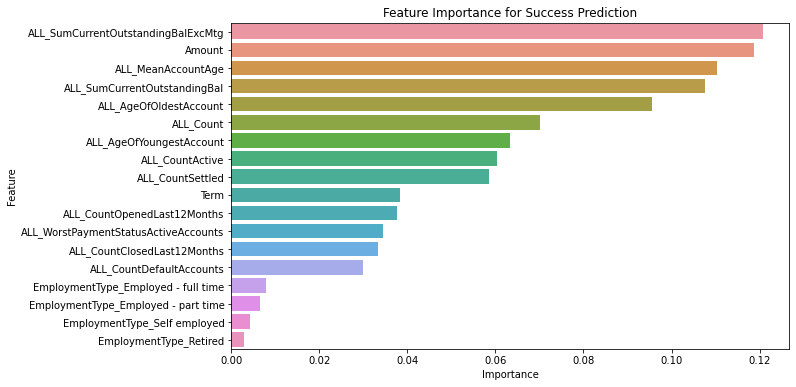

In [279]:
from sklearn.ensemble import RandomForestClassifier

# Prepare data
X = df_encoded.drop(columns=['Success'])
y = df_encoded['Success']

# Train a Random Forest model
rf = RandomForestClassifier()
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance for Success Prediction')
plt.show()

# Checking Data Imbalance

In [200]:
class_dist = df_encoded.groupby('Success').size()
print(class_dist)
print()
print("Class 0 = Loan Rejected")
print("Class 1 = Loan Approved")

Success
0    7805
1     922
dtype: int64

Class 0 = Loan Rejected
Class 1 = Loan Approved


# Data Transformation

## Standardization

In [160]:
## Standardize data (0 mean, 1 stdev)
array = df_encoded.values
# separate array into input and output components
X = array[:,0:18]
Y = array[:,18]
scaler = StandardScaler().fit(X)
standardizedX = scaler.transform(X)
print(standardizedX[0:5,:])

[[ 0.66605463  0.26331488 -0.27113814  0.33494866 -0.62127913  0.57659054
  -0.84491634 -0.46776023  0.4693166  -0.42190801 -0.21015769  1.56027056
  -0.10685571 -0.37469828  0.38370928 -0.26285404 -0.12906936 -0.22287944]
 [-1.24077476  0.10693331 -0.77677213 -0.71088209 -0.23859259  0.57659054
  -0.50689558 -0.64246092 -1.0054594  -0.46544809 -0.47401537  1.56027056
  -1.23679603  1.11419956  0.38370928 -0.26285404 -0.12906936 -0.22287944]
 [-0.33021017 -0.67497453 -0.415605    0.33494866 -0.62127913  0.57659054
   0.84518747 -0.64246092 -0.90019345 -0.48263253 -0.57815495  1.56027056
  -1.04847264 -1.1191472  -2.60613973  3.80439276 -0.12906936 -0.22287944]
 [ 0.66605463 -0.51859297  1.53469752  0.54411481 -0.62127913  0.21359057
  -0.16887482  1.62864798 -0.5763252  -0.42249164 -0.2136945   1.56027056
  -0.67182587  0.36975064  0.38370928 -0.26285404 -0.12906936 -0.22287944]
 [-0.35163522 -0.51859297  5.86870312  0.33494866  2.44021323 -0.51240939
   2.19727051  6.95701885 -0.51386

In [199]:
standardizedX

array([[ 0.66605463,  0.26331488, -0.27113814, ..., -0.26285404,
        -0.12906936, -0.22287944],
       [-1.24077476,  0.10693331, -0.77677213, ..., -0.26285404,
        -0.12906936, -0.22287944],
       [-0.33021017, -0.67497453, -0.415605  , ...,  3.80439276,
        -0.12906936, -0.22287944],
       ...,
       [-1.73355089, -0.59678375, -1.13793926, ..., -0.26285404,
        -0.12906936, -0.22287944],
       [ 0.14114092,  0.49788724,  0.37896269, ..., -0.26285404,
        -0.12906936, -0.22287944],
       [-0.89797397, -0.44040218, -0.415605  , ..., -0.26285404,
        -0.12906936, -0.22287944]])

## Normalization

In [202]:
array = df_encoded.values
# separate array into input and output components
X = array[:,0:18]
Y = array[:,18]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
print(normalizedX[0:5,:])

[[1.52441383e-02 8.05857534e-04 9.40167123e-04 7.38702739e-04
  0.00000000e+00 2.01464383e-04 0.00000000e+00 2.01464383e-04
  4.79216613e-03 6.24002350e-01 6.24002350e-01 4.70083561e-04
  4.70083561e-01 2.41757260e-03 6.71547945e-05 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.45683578e-03 1.52180322e-03 1.06526225e-03 9.13081932e-04
  1.52180322e-04 4.56540966e-04 1.52180322e-04 1.52180322e-04
  4.46344884e-03 6.98812039e-01 6.98812039e-01 1.06526225e-03
  1.52180322e-01 9.13081932e-03 1.52180322e-04 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.07398759e-02 0.00000000e+00 2.75282471e-03 2.52342265e-03
  0.00000000e+00 6.88206178e-04 1.14701030e-03 2.29402059e-04
  7.41656858e-03 6.27873436e-01 6.27873436e-01 1.60581442e-03
  4.58804119e-01 5.50564942e-03 0.00000000e+00 2.29402059e-04
  0.00000000e+00 0.00000000e+00]
 [1.66262715e-02 1.46486973e-04 2.85649598e-03 8.78921840e-04
  0.00000000e+00 1.46486973e-04 1.46486973e-04 1.97757414e-03
  3.04399930e-03 6.75964138e-01 6

In [204]:
normalizedX

array([[1.52441383e-02, 8.05857534e-04, 9.40167123e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.45683578e-03, 1.52180322e-03, 1.06526225e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.07398759e-02, 0.00000000e+00, 2.75282471e-03, ...,
        2.29402059e-04, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.49999752e-04, 4.99999173e-05, 9.99998346e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.23084561e-02, 1.03722944e-03, 1.59041848e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.02804793e-03, 1.12149923e-04, 4.48599693e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

## Min Max Scaler

In [206]:
array = df_encoded.values
# separate array into input and output components
X = array[:,0:18]
Y = array[:,18]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
#print(X[0:5,:])
print(rescaledX[0:5,:])

[[2.26452906e-01 4.65116279e-02 5.60344828e-02 2.38095238e-01
  0.00000000e+00 1.30434783e-01 0.00000000e+00 1.39534884e-02
  2.32211221e-01 2.32021111e-03 1.59816998e-02 1.00000000e+00
  3.33333333e-01 5.00000000e-01 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.80961924e-02 3.87596899e-02 2.58620690e-02 1.19047619e-01
  1.66666667e-02 1.30434783e-01 1.61290323e-02 4.65116279e-03
  9.34983498e-02 1.14662176e-03 7.89797305e-03 1.00000000e+00
  2.56410256e-02 1.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.33266533e-01 0.00000000e+00 4.74137931e-02 2.38095238e-01
  0.00000000e+00 1.30434783e-01 8.06451613e-02 4.65116279e-03
  1.03399340e-01 6.83428519e-04 4.70748089e-03 1.00000000e+00
  7.69230769e-02 2.50000000e-01 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.26452906e-01 7.75193798e-03 1.63793103e-01 2.61904762e-01
  0.00000000e+00 8.69565217e-02 3.22580645e-02 1.25581395e-01
  1.33861386e-01 2.30448002e-03 1

In [208]:
rescaledX

array([[0.22645291, 0.04651163, 0.05603448, ..., 0.        , 0.        ,
        0.        ],
       [0.04809619, 0.03875969, 0.02586207, ..., 0.        , 0.        ,
        0.        ],
       [0.13326653, 0.        , 0.04741379, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.00200401, 0.00387597, 0.00431034, ..., 0.        , 0.        ,
        0.        ],
       [0.17735471, 0.05813953, 0.09482759, ..., 0.        , 0.        ,
        0.        ],
       [0.08016032, 0.01162791, 0.04741379, ..., 0.        , 0.        ,
        0.        ]])

## Log Scaling

In [213]:
array = df_encoded.values

# Separate array into input and output 
X = array[:, 0:18]
Y = array[:, 18]

# Apply log scaling (log1p transformation)
log_scaled_X = np.log1p(X)

# Summarize transformed data
print(log_scaled_X[0:5, :])

[[5.42934563 2.56494936 2.7080502  2.48490665 0.         1.38629436
  0.         1.38629436 4.28165366 9.13701671 9.13701671 2.07944154
  8.85380827 3.61091791 0.69314718 0.         0.         0.        ]
 [3.91202301 2.39789527 2.07944154 1.94591015 0.69314718 1.38629436
  0.69314718 0.69314718 3.41213732 8.43228868 8.43228868 2.07944154
  6.90875478 4.11087386 0.69314718 0.         0.         0.        ]
 [4.90527478 0.         2.56494936 2.48490665 0.         1.38629436
  1.79175947 0.69314718 3.50645789 7.91498301 7.91498301 2.07944154
  7.60140233 3.21887582 0.         0.69314718 0.         0.        ]
 [5.42934563 1.09861229 3.68887945 2.56494936 0.         1.09861229
  1.09861229 3.33220451 3.75091485 9.13021433 9.13021433 2.07944154
  8.29429961 3.8918203  0.69314718 0.         0.         0.        ]
 [4.89034913 1.09861229 4.60517019 2.48490665 2.19722458 0.
  2.30258509 4.48863637 3.7918872  9.64497586 9.64497586 0.
  8.85380827 4.11087386 0.69314718 0.         0.         0. 

In [214]:
log_scaled_X

array([[5.42934563, 2.56494936, 2.7080502 , ..., 0.        , 0.        ,
        0.        ],
       [3.91202301, 2.39789527, 2.07944154, ..., 0.        , 0.        ,
        0.        ],
       [4.90527478, 0.        , 2.56494936, ..., 0.69314718, 0.        ,
        0.        ],
       ...,
       [1.38629436, 0.69314718, 1.09861229, ..., 0.        , 0.        ,
        0.        ],
       [5.18738581, 2.77258872, 3.17805383, ..., 0.        , 0.        ,
        0.        ],
       [4.40671925, 1.38629436, 2.56494936, ..., 0.        , 0.        ,
        0.        ]])

# Splitting to Train and Test Data 

### Use Standardized Data for Training and Test

In [280]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

array = df_encoded.values

# Extract X (features) and y (target)
X = standardizedX 
y = array[:, 18]  

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Total Train and Test Data after Splitting

In [281]:
print("Total training data of X:", len(X_train))
print("Total test data of X:", len(X_test))
print()
print("Total training data of Y:", len(y_train))
print("Total test data of Y:", len(y_test))

Total training data of X: 6108
Total test data of X: 2619

Total training data of Y: 6108
Total test data of Y: 2619


# SMOTE Oversampling for Minority Class

In [282]:
# Convert y_train to a pandas Series for easier manipulation
y_train = pd.Series(y_train)

print('Before Oversampling:')
print(y_train.value_counts())

# Apply SMOTE for oversampling only on the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Convert y_train_smote back to a pandas Series to use value_counts()
y_train_smote = pd.Series(y_train_smote)

print('After Oversampling:')
print(y_train_smote.value_counts())

Before Oversampling:
0.0    5463
1.0     645
dtype: int64
After Oversampling:
0.0    5463
1.0    5463
dtype: int64


In [283]:
X_train_smote

array([[-1.42288768, -0.44040218, -1.06570584, ..., -0.26285404,
        -0.12906936, -0.22287944],
       [-0.52303561, -0.67497453, -1.13793926, ..., -0.26285404,
        -0.12906936, -0.22287944],
       [-0.66229843, -0.44040218, -0.48783842, ..., -0.26285404,
        -0.12906936, -0.22287944],
       ...,
       [-0.9906683 ,  0.23086107, -0.95858281, ..., -0.26285404,
        -0.12906936, -0.22287944],
       [ 0.36646367, -0.56441409,  0.14731071, ..., -0.26285404,
        -0.12906936, -0.22287944],
       [-0.24279129, -0.20718409, -0.41310284, ..., -0.26285404,
        -0.12906936, -0.22287944]])

In [284]:
y_train_smote

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10921    1.0
10922    1.0
10923    1.0
10924    1.0
10925    1.0
Length: 10926, dtype: float64

In [285]:
# Check class distribution in the original data
class_dist_original = pd.Series(y).value_counts()
print("Original Class Distribution:")
print(class_dist_original)
print()
print("Class 0 = Loan Rejected")
print("Class 1 = Loan Approved")
print()

# Check class distribution in the training data before SMOTE
class_dist_train_before_smote = pd.Series(y_train).value_counts()
print("Class Distribution in Training Data (Before SMOTE):")
print(class_dist_train_before_smote)
print()
print("Class 0 = Loan Rejected")
print("Class 1 = Loan Approved")
print()

# Check class distribution after applying SMOTE on training data
class_dist_oversampled = y_train_smote.value_counts()
print("Oversampled Class Distribution (Training Data):")
print(class_dist_oversampled)
print()
print("Class 0 = Loan Rejected")
print("Class 1 = Loan Approved")
print()

# Check class distribution in the test data
class_dist_test = pd.Series(y_test).value_counts()
print("Class Distribution in Test Data:")
print(class_dist_test)
print()
print("Class 0 = Loan Rejected")
print("Class 1 = Loan Approved")


Original Class Distribution:
0.0    7805
1.0     922
dtype: int64

Class 0 = Loan Rejected
Class 1 = Loan Approved

Class Distribution in Training Data (Before SMOTE):
0.0    5463
1.0     645
dtype: int64

Class 0 = Loan Rejected
Class 1 = Loan Approved

Oversampled Class Distribution (Training Data):
0.0    5463
1.0    5463
dtype: int64

Class 0 = Loan Rejected
Class 1 = Loan Approved

Class Distribution in Test Data:
0.0    2342
1.0     277
dtype: int64

Class 0 = Loan Rejected
Class 1 = Loan Approved


# Train, Test and Evaluate Models

## Logistic Regression

Accuracy: 70.065%

[[1626  716]
 [  68  209]]
              precision    recall  f1-score   support

         0.0       0.96      0.69      0.81      2342
         1.0       0.23      0.75      0.35       277

    accuracy                           0.70      2619
   macro avg       0.59      0.72      0.58      2619
weighted avg       0.88      0.70      0.76      2619



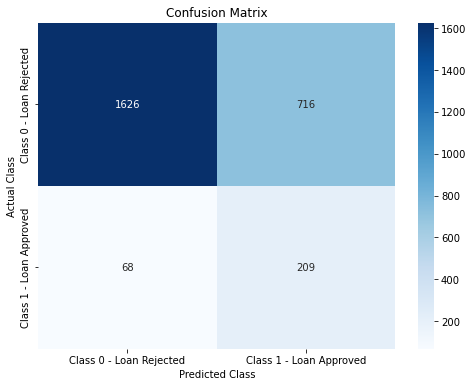

In [286]:
import seaborn as sns

# Model Training
model = LogisticRegression(solver='liblinear')
model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
predicted = model.predict(X_test)
result = model.score(X_test, y_test)

print(f"Accuracy: {result * 100:.3f}%")
print()

# Confusion Matrix
matrix = confusion_matrix(y_test, predicted)
print(matrix)

# Classification Report
report = classification_report(y_test, predicted)
print(report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0 - Loan Rejected', 'Class 1 - Loan Approved'],
            yticklabels=['Class 0 - Loan Rejected', 'Class 1 - Loan Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

## KNN

Accuracy: 82.436%

[[2046  296]
 [ 164  113]]
              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90      2342
         1.0       0.28      0.41      0.33       277

    accuracy                           0.82      2619
   macro avg       0.60      0.64      0.61      2619
weighted avg       0.86      0.82      0.84      2619



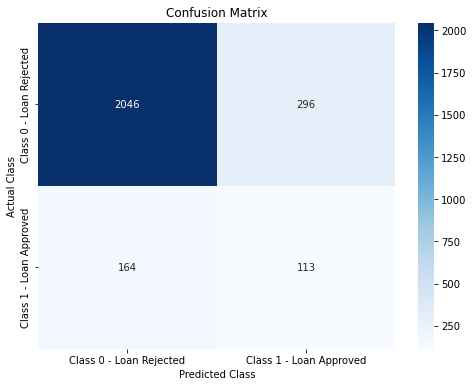

In [287]:
import seaborn as sns

# Model Training
model = KNeighborsClassifier(n_neighbors=2, metric='minkowski')
model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
predicted = model.predict(X_test)
result = model.score(X_test, y_test)

print(f"Accuracy: {result * 100:.3f}%")
print()

# Confusion Matrix
matrix = confusion_matrix(y_test, predicted)
print(matrix)

# Classification Report
report = classification_report(y_test, predicted)
print(report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0 - Loan Rejected', 'Class 1 - Loan Approved'],
            yticklabels=['Class 0 - Loan Rejected', 'Class 1 - Loan Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

## Naive Bayes

Accuracy: 57.006%

[[1270 1072]
 [  54  223]]
              precision    recall  f1-score   support

         0.0       0.96      0.54      0.69      2342
         1.0       0.17      0.81      0.28       277

    accuracy                           0.57      2619
   macro avg       0.57      0.67      0.49      2619
weighted avg       0.88      0.57      0.65      2619



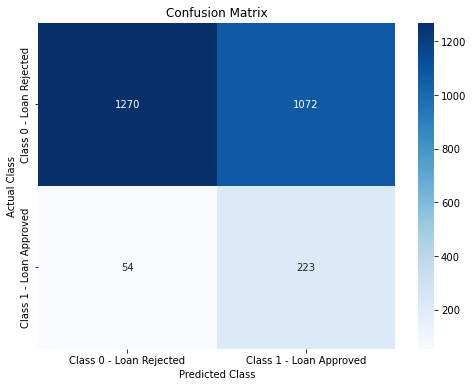

In [288]:
import seaborn as sns

# Model Training
model = GaussianNB()
model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
predicted = model.predict(X_test)
result = model.score(X_test, y_test)

print(f"Accuracy: {result * 100:.3f}%")
print()

# Confusion Matrix
matrix = confusion_matrix(y_test, predicted)
print(matrix)

# Classification Report
report = classification_report(y_test, predicted)
print(report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0 - Loan Rejected', 'Class 1 - Loan Approved'],
            yticklabels=['Class 0 - Loan Rejected', 'Class 1 - Loan Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

## Decision Trees 

Accuracy: 82.780%

[[2054  288]
 [ 163  114]]
              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90      2342
         1.0       0.28      0.41      0.34       277

    accuracy                           0.83      2619
   macro avg       0.61      0.64      0.62      2619
weighted avg       0.86      0.83      0.84      2619



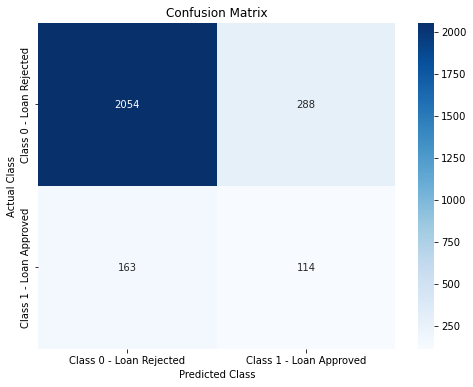

In [289]:
import seaborn as sns

# Model Training
model = DecisionTreeClassifier()
model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
predicted = model.predict(X_test)
result = model.score(X_test, y_test)

print(f"Accuracy: {result * 100:.3f}%")
print()

# Confusion Matrix
matrix = confusion_matrix(y_test, predicted)
print(matrix)

# Classification Report
report = classification_report(y_test, predicted)
print(report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0 - Loan Rejected', 'Class 1 - Loan Approved'],
            yticklabels=['Class 0 - Loan Rejected', 'Class 1 - Loan Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

## Support Vector Machines

Accuracy: 76.938%

[[1813  529]
 [  75  202]]
              precision    recall  f1-score   support

         0.0       0.96      0.77      0.86      2342
         1.0       0.28      0.73      0.40       277

    accuracy                           0.77      2619
   macro avg       0.62      0.75      0.63      2619
weighted avg       0.89      0.77      0.81      2619



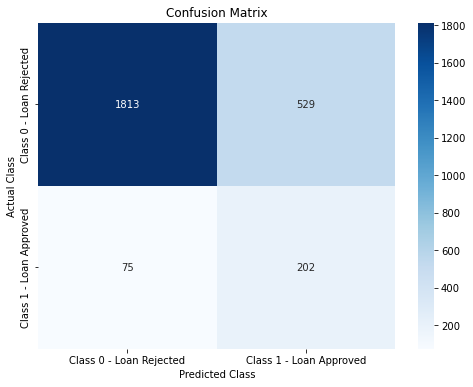

In [290]:
import seaborn as sns

# Model Training
model = SVC()
model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
predicted = model.predict(X_test)
result = model.score(X_test, y_test)

print(f"Accuracy: {result * 100:.3f}%")
print()

# Confusion Matrix
matrix = confusion_matrix(y_test, predicted)
print(matrix)

# Classification Report
report = classification_report(y_test, predicted)
print(report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0 - Loan Rejected', 'Class 1 - Loan Approved'],
            yticklabels=['Class 0 - Loan Rejected', 'Class 1 - Loan Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

# Compare Machine Learning Algorithms 

LR: Accuracy: 0.701
KNN: Accuracy: 0.733
CART: Accuracy: 0.823
NB: Accuracy: 0.570
SVM: Accuracy: 0.769


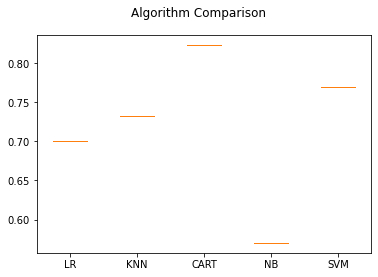

In [291]:
# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    # Train the model
    model.fit(X_train_smote, y_train_smote)
    # Test accuracy
    result = model.score(X_test, y_test)
    results.append([result]) 
    names.append(name)
    print(f"{name}: Accuracy: {result:.3f}")
    

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()